## *Bankruptcy: Machine Learning Project*
#### Winter Sem: 2021-22,
| Submitted By: | Matriculation Number |
| --- | --- |
| Ajit Kumar Gupta | 429395 |
| Karthik Ananthakrishnan | 428859 |
| Cristian Castro | 42732 |
| Tejas Choudekar | 428841 |
| Ana Aragones| 433641 |
| Bo Hu | 415101 |


In this project we,
1. Perform data exploration, cleaning, imputation.
2. Use data visualisation techniques to explore the data set.
3. Come up with (binary) classification models to predict whether a company will be bankrupt.
4. Perform model selection among these models, with a rigorous methodology.


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## *1. Importing the Dataset and explore the features, missing values and outliers*

In [9]:
pd.set_option('display.max_rows',65)
pd.set_option('display.max_columns',65)
data = pd.read_csv("bankruptcy.csv")
data.head()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,Attr11,Attr12,Attr13,Attr14,Attr15,Attr16,Attr17,Attr18,Attr19,Attr20,Attr21,Attr22,Attr23,Attr24,Attr25,Attr26,Attr27,Attr28,Attr29,Attr30,Attr31,Attr32,Attr33,Attr34,Attr35,Attr36,Attr37,Attr38,Attr39,Attr40,Attr41,Attr42,Attr43,Attr44,Attr45,Attr46,Attr47,Attr48,Attr49,Attr50,Attr51,Attr52,Attr53,Attr54,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.174190,0.41299,0.14371,1.3480,-28.9820,0.60383,0.219460,1.1225,1.1961,0.46359,0.219460,0.531390,0.142330,0.219460,592.24,0.61630,2.4213,0.219460,0.122720,37.573,0.99690,0.295100,0.097402,0.75641,0.46359,0.50669,1.97370,0.32417,5.9473,0.224930,0.122720,100.820,3.6203,0.71453,0.295100,1.8079,123140.0000,0.46359,0.165010,0.212820,0.041124,0.165010,95.682,58.109,0.946210,0.90221,44.941,0.260030,0.145400,1.3480,0.41299,0.27622,1.0457,1.0458,127280.0,0.163960,0.375740,0.83604,0.000007,9.7145,6.2813,84.291,4.3303,4.0341,b'0'
1,0.146240,0.46038,0.28230,1.6294,2.5952,0.00000,0.171850,1.1721,1.6018,0.53962,0.175790,0.383170,0.126470,0.171850,829.46,0.44004,2.1721,0.171850,0.107280,60.954,5.08890,0.175710,0.091295,NaN,0.17523,0.38442,44.59300,1.04860,4.0792,0.243840,0.109740,105.090,3.4733,3.38360,0.044076,1.6018,NaN,0.53962,0.027516,0.164060,0.074333,0.109690,149.750,88.801,0.546690,1.03300,62.678,0.144970,0.090503,1.5874,0.44849,0.28791,2.0044,2.0044,3387.8,0.027516,0.271000,0.90108,0.000000,5.9882,4.1103,102.190,3.5716,5.9500,b'0'
2,0.000595,0.22612,0.48839,3.1599,84.8740,0.19114,0.004572,2.9881,1.0077,0.67566,0.004572,0.020219,0.030966,0.004572,2094.10,0.17430,4.4225,0.004572,0.003592,53.881,0.67451,0.040610,0.000468,0.23470,0.67566,0.15672,0.32153,1.71070,4.6220,0.036196,0.003592,65.345,5.5857,0.17960,0.040610,1.3425,NaN,0.67566,0.031907,0.844690,0.098528,0.031907,150.130,96.251,0.003168,2.32900,54.296,0.005769,0.004533,3.1599,0.22612,0.17903,2.3667,2.3667,20453.0,0.007639,0.000881,0.99236,0.000000,6.7742,3.7922,64.846,5.6287,4.4581,b'0'
3,0.024526,0.43236,0.27546,1.7833,-10.1050,0.56944,0.024526,1.3057,1.0509,0.56453,0.024526,0.069747,0.036812,0.024526,3299.40,0.11063,2.3129,0.024526,0.018876,86.317,0.62795,0.055446,0.018876,0.56944,0.56453,0.11063,0.44844,0.73869,4.2600,0.286240,0.018876,103.810,3.5161,0.12824,0.055446,1.3068,3.9624,0.64524,0.042673,0.178260,0.180500,0.042673,158.550,72.237,0.079819,0.90954,90.707,0.032141,0.024737,1.4504,0.35164,0.28440,1.5139,1.7303,5012.6,0.048398,0.043445,0.95160,0.142980,4.2286,5.0528,98.783,3.6950,3.4844,b'0'
4,0.188290,0.41504,0.34231,1.9279,-58.2740,0.00000,0.233580,1.4094,1.3393,0.58496,0.238810,0.633170,0.187800,0.233580,602.31,0.60600,2.4094,0.233580,0.174410,140.860,1.20390,0.234930,0.140590,0.00000,0.57250,0.49687,44.94700,1.18530,4.6033,0.306910,0.177840,122.090,2.9897,2.65740,0.236350,1.3393,4.5490,0.62769,0.176480,0.013769,0.054712,0.175420,192.450,51.585,0.364290,0.52685,171.050,0.216990,0.162030,1.7136,0.36891,0.33449,2.0256,2.1735,13730.0,0.176480,0.321880,0.82635,0.073039,2.5912,7.0756,100.540,3.6303,4.6375,b'0'


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10503 entries, 0 to 10502
Data columns (total 65 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Attr1   10503 non-null  float64
 1   Attr2   10503 non-null  float64
 2   Attr3   10503 non-null  float64
 3   Attr4   10485 non-null  float64
 4   Attr5   10478 non-null  float64
 5   Attr6   10503 non-null  float64
 6   Attr7   10503 non-null  float64
 7   Attr8   10489 non-null  float64
 8   Attr9   10500 non-null  float64
 9   Attr10  10503 non-null  float64
 10  Attr11  10503 non-null  float64
 11  Attr12  10485 non-null  float64
 12  Attr13  10460 non-null  float64
 13  Attr14  10503 non-null  float64
 14  Attr15  10495 non-null  float64
 15  Attr16  10489 non-null  float64
 16  Attr17  10489 non-null  float64
 17  Attr18  10503 non-null  float64
 18  Attr19  10460 non-null  float64
 19  Attr20  10460 non-null  float64
 20  Attr21  9696 non-null   float64
 21  Attr22  10503 non-null  float64
 22

$\color{red}{\textit{All our features are numerical and the label is Categorical, b'0': Non-Bankrupt companies, b'1':Bankrupt companies}}$


In [4]:
data.describe()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,Attr11,Attr12,Attr13,Attr14,Attr15,Attr16,Attr17,Attr18,Attr19,Attr20,Attr21,Attr22,Attr23,Attr24,Attr25,Attr26,Attr27,Attr28,Attr29,Attr30,Attr31,Attr32,Attr33,Attr34,Attr35,Attr36,Attr37,Attr38,Attr39,Attr40,Attr41,Attr42,Attr43,Attr44,Attr45,Attr46,Attr47,Attr48,Attr49,Attr50,Attr51,Attr52,Attr53,Attr54,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64
count,10503.000000,10503.000000,10503.000000,10485.000000,1.047800e+04,10503.000000,10503.000000,10489.000000,10500.000000,10503.000000,10503.000000,10485.000000,10460.000000,10503.000000,1.049500e+04,10489.000000,10489.000000,10503.000000,10460.000000,10460.000000,9696.000000,10503.000000,10460.000000,10276.000000,10503.000000,10489.000000,9.788000e+03,10275.000000,10503.000000,10460.000000,10460.000000,1.040200e+04,10485.000000,10489.000000,10503.000000,10503.000000,5767.000000,10503.000000,10460.000000,10485.000000,10301.000000,10460.000000,10460.000000,10460.000000,9912.000000,10485.000000,1.041700e+04,10503.000000,10460.000000,10489.000000,10503.000000,10417.000000,10275.000000,10275.000000,1.050300e+04,10460.000000,10503.000000,10474.000000,10503.000000,9.911000e+03,10486.000000,1.046000e+04,10485.000000,10275.000000
mean,0.052844,0.619911,0.095490,9.980499,-1.347662e+03,-0.121159,0.065624,19.140113,1.819254,0.366093,0.086764,2.411266,0.376563,0.065634,3.004332e+03,2.729654,20.511539,0.070739,-0.170778,68.448531,4.670725,0.075676,-0.176466,0.211936,0.196153,2.580730,1.185945e+03,6.092884,3.921179,0.459346,-0.177084,1.171670e+03,8.419887,5.398356,0.071075,1.981250,102.697692,0.465510,-0.076355,2.381026,28.707178,-0.141671,195.389286,126.940260,17.451297,8.978029,5.424888e+02,0.004834,-0.217844,8.686024,0.497135,11.244158,5.725829,6.708568,6.638549e+03,-0.530082,-0.014817,3.848794,1.429319,5.713363e+02,13.935361,1.355370e+02,9.095149,35.766800
std,0.647797,6.427041,6.420056,523.691951,1.185806e+05,6.970625,0.651152,717.756745,7.581659,6.428603,0.655407,111.459642,49.675550,0.651151,1.091981e+05,110.233475,721.812766,0.835328,11.210201,1083.699904,305.897238,0.581734,11.149274,2.093845,6.742161,108.823993,3.469123e+04,94.713753,0.840528,71.755042,11.157003,6.841270e+04,37.696764,69.035263,0.572124,2.630705,2469.447679,6.425362,8.079334,37.819839,2845.290346,10.787555,3303.309554,2766.505503,1720.342176,523.565601,3.126416e+04,0.629770,11.910935,522.528325,6.420885,851.867915,89.708042,93.511530,5.989196e+04,55.978608,18.684047,190.201224,77.273270,3.715967e+04,83.704103,2.599116e+04,31.419096,428.298315
min,-17.692000,0.000000,-479.730000,0.002080,-1.190300e+07,-508.120000,-17.692000,-2.081800,-1.215700,-479.730000,-17.692000,-1543.800000,-631.710000,-17.692000,-2.321800e+06,-204.300000,-0.043411,-17.692000,-771.650000,-0.001439,-1.107500,-17.692000,-771.650000,-60.742000,-500.750000,-204.300000,-1.901300e+05,-690.400000,-0.358530,-6351.700000,-771.390000,-9.295600e+03,-1.921900,-1696.000000,-17.073000,-0.000084,-2.200900,-479.730000,-551.110000,-7.081900,-667.730000,-765.800000,-25113.000000,-25113.000000,-74385.000000,-6.469200,-1.730300e+01,-17.692000,-905.750000,0.002080,0.000000,-25.467000,-869.040000,-706.490000,-7.513800e+05,-5691.700000,-1667.300000,-198.690000,-172.070000,0.000000e+00,-6.590300,-2.336500e+06,-0.000156,-0.000102
25%,0.000686,0.253955,0.017461,1.040100,-5.207075e+01,0.000000,0.002118,0.431270,1.011275,0.297340,0.009809,0.006183,0.020740,0.002131,1.865950e+02,0.060302,1.449200,0.002131,0.001648,14.253750,0.796673,0.000000,0.000556,0.014938,0.135695,0.055067,0.000000e+00,0.027178,3.393200,0.073850,0.004012,4.471900e+01,2.785900,0.367460,0.001730,1.043500,1.038600,0.426810,0.001557,0.053666,0.022026,0.000000,65.627250,34.214750,0.006157,0.602830,1.494100e+01,-0.048988,-0.036186,0.749370,0.177200,0.122470,0.667285,0.950435,1.462100e+01,0.005137,0.006796,0.875560,0.000000,5.533150e+00,4.486075,4.073700e+01,3.062800,2.023350
50%,0.043034,0.464140,0.198560,1.605600,1.579300e+

$\color{red}{\textit{clearly this dataset contains outliers as seen my max values and 75% percentile values, and} \\ \textit{missing values indicated by count, we first explore the missing values and then move to outlier.}}$

b'0'    10008
b'1'      495
Name: class, dtype: int64


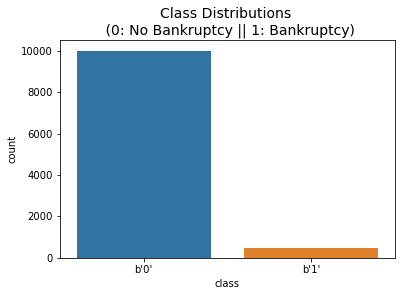

In [5]:
sns.countplot(data=data,x='class')
plt.title('Class Distributions \n (0: No Bankruptcy || 1: Bankruptcy)', fontsize=14);
print(data['class'].value_counts())

$\color{red}{\textit{Highly Imbalanced Data with around 20 times more data of non-bankrupt class}}$

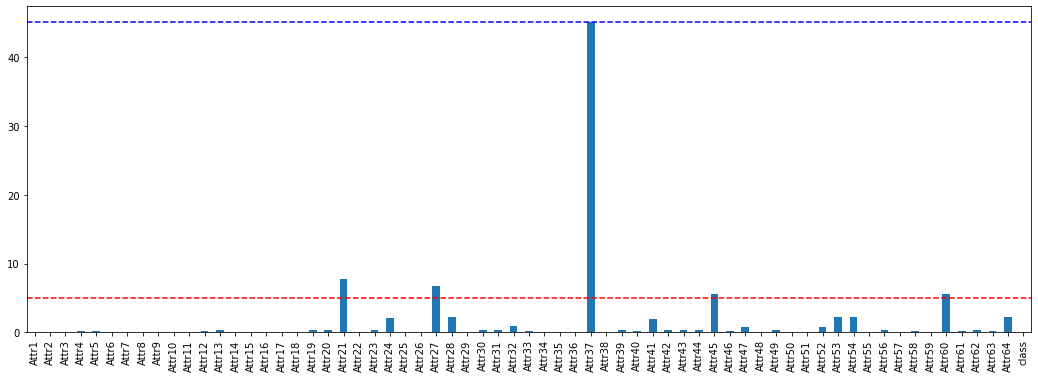

In [10]:
fig, ax = plt.subplots(1,1,figsize = (18,6))
miss_per = ((data.isnull().sum())*100/len(data["Attr1"]))

miss_per.plot(kind="bar")
                
ax = plt.axhline(y=5,color='r',linestyle = '--')
ax = plt.axhline(y=45,color='b',linestyle = '--')


$\color{red}{\textit{This bar graph shows that we have 5 Attributes with missing values more than 5% and for Attr37} \\ \textit{it is 45% which is very high, we should delete Attr37 and fill the missing values with median,} \\ \textit{this we will do based on the basis of class}}$



*$\color{red}{\text{Method}}$: Replace the missing values with median of class and then replace the outliers with lower and upper values of IQR range.*

In [11]:
df = data.copy(deep=True)
df = df.drop(columns=["Attr37"],axis=1)

In [12]:
df_class0 = df[df["class"] == "b'0'"]                    # Seperating the data on the basis of class
df_class1 = df[df["class"] == "b'1'"]

df_class0 = df_class0.drop('class', axis = 1)
df_class1 = df_class1.drop('class', axis = 1)

df_class0 = df_class0.fillna(df_class0.median())       # Filling the missing values with median of class = b'0' (Non-Bankruptcy)
df_class1 = df_class1.fillna(df_class1.median())       # Filling the missing values with median of class = b'1' (Bankruptcy)


In [13]:
df_class0_base = df_class0.copy(deep=True)
df_class1_base = df_class1.copy(deep=True)
df_class0_base["class"] = 0
df_class1_base["class"] = 1
data_base = pd.concat([df_class0_base,df_class1_base])

$\color{red}{\text{data_base:}}$*This dataset has no missing values but it contains all outliers intact*

   Attributes  Skew_Values
0       Attr1    51.971750
1       Attr2    71.596019
2       Attr3   -71.691576
3       Attr4   101.392697
4       Attr5   -96.973066
5       Attr6   -69.367311
6       Attr7    51.122493
7       Attr8    57.629129
8       Attr9    89.251692
9      Attr10   -71.532339
10     Attr11    50.325599
11     Attr12    63.855413
12     Attr13    95.595825
13     Attr14    51.122608
14     Attr15    78.046506
15     Attr16    66.222372
16     Attr17    56.901407
17     Attr18    49.391027
18     Attr19   -56.105443
19     Attr20    72.157172
20     Attr21   100.453767
21     Attr22    49.436071
22     Attr23   -56.870025
23     Attr24    59.385911
24     Attr25   -70.658843
25     Attr26    68.129584
26     Attr27    60.679954
27     Attr28    40.724742
28     Attr29    -0.030266
29     Attr30   -58.811629
30     Attr31   -57.022819
31     Attr32    91.538164
32     Attr33    50.013503
33     Attr34    75.125077
34     Attr35    52.688413
35     Attr36    31.606763
3

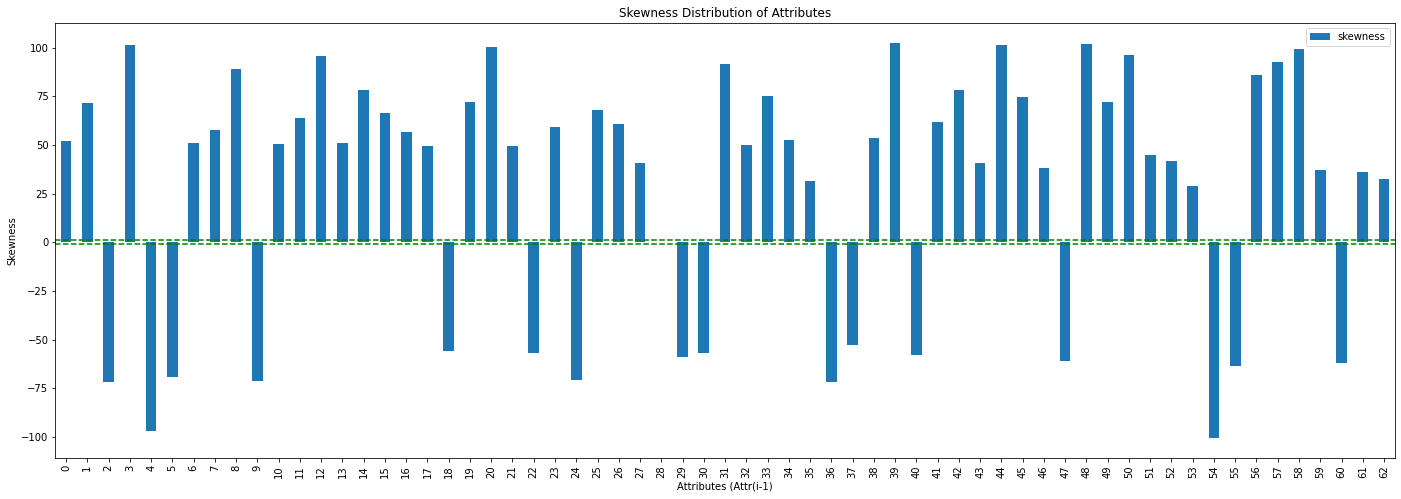

In [14]:
#Plotting skewness for data_base- dataFrame with outliers intact
variables = [c for c in data_base.columns if c!="class"]
skew = []

for variable in variables:
    skew.append([variable,data_base[variable].skew()])
print(pd.DataFrame(skew,columns=["Attributes","Skew_Values"]))

skew = pd.DataFrame(skew,columns=['Attributes','skewness'])

fig,ax  = plt.subplots(1,1,figsize=(24,8))
axes = skew.plot(kind = 'bar',figsize=(24,8),ax=ax,
                 xlabel = ("Attributes (Attr(i-1)"),
                 ylabel = ("Skewness"),
                 title = ("Skewness Distribution of Attributes"))
axes = plt.axhline(y=1,color='g',linestyle = '--')
axes = plt.axhline(y=-1,color='g',linestyle = '--')

$\color{red}{\textbf{As seen above, if the outliers are left intact, the skewness values are astronomically high, therefore treatment of outliers seem necessary}}$

## *Baseline: Feature Selection and Training for data with outliers intact*

* Logistic Regression Classifier 
* Random forest classifier with weights 

**2 methods used for outlier intact data**

In [15]:
data_base_fp = data_base.copy(deep=True)

In [19]:
x = data_base_fp.drop('class', axis=1)
y = data_base_fp['class']
trainX, testX, trainY, testY = train_test_split(x, y,stratify=y, test_size = 0.25)

In [23]:
scaler = StandardScaler()
scaler.fit(trainX)

logistic = LogisticRegression(C=0.1, penalty='l1', solver='liblinear')
logistic.fit(trainX,trainY)

sel_ = SelectFromModel(logistic,threshold=0.03)
sel_.fit(scaler.transform(trainX.fillna(0)), trainY)

selected_feature = trainX.columns[(sel_.get_support())]
print('total features: {}'.format((trainX.shape[1])))
print('selected features: {}'.format(len(selected_feature)))
print('features with coefficients shrank to zero: {}'.format(
      np.sum(sel_.estimator_.coef_ == 0)))

selected_features = trainX.columns[(sel_.estimator_.coef_ != 0).ravel().tolist()]
selected_feature

total features: 63
selected features: 10
features with coefficients shrank to zero: 47


Index(['Attr6', 'Attr10', 'Attr24', 'Attr29', 'Attr31', 'Attr33', 'Attr35',
       'Attr48', 'Attr55', 'Attr61'],
      dtype='object')

In [24]:
recall = recall_score(testY, logistic.predict(testX), average='macro')
recall


0.5032328975529254

In [25]:
#Features selected via logistic regression
features_o=['Attr6', 'Attr10', 'Attr24', 'Attr29', 'Attr31', 'Attr33', 'Attr35',
       'Attr48', 'Attr55', 'Attr61']

In [28]:
# Random Forest with class_weight to check if we can improve the recall metric
df_model = data_base.copy(deep=True)
print(df_model.shape)

y = df_model['class']
x = df_model.drop('class', axis=1)

X_train, X_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.25, random_state=42)

data_results = []

for weight in range(1,20):
    forest = RandomForestClassifier(n_estimators = 100, max_features = 40, max_depth = 40, class_weight={0:1,1:weight}, random_state = 42)
    forest.fit(X_train,y_train)
    model = SelectFromModel(forest, prefit=True)
    recall_ = recall_score(y_test, forest.predict(X_test), average='macro')
    names = model.get_support()
    data_results.append([weight, model.transform(X_train).shape[1], recall_.round(decimals=2), X_train.columns[names].values])

    
results = pd.DataFrame(data_results, columns=['weight','predictors','recall','predictor_names'])
results

(10503, 64)


C:\Users\karth\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
C:\Users\karth\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
C:\Users\karth\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
C:\Users\karth\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
C:\Users\karth\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
C:\Users\k

,weight,predictors,recall,predictor_names
0,1,17,0.64,"[Attr5, Attr15, Attr20, Attr21, Attr24, Attr26..."
1,2,15,0.64,"[Attr5, Attr15, Attr20, Attr21, Attr24, Attr26..."
2,3,14,0.65,"[Attr5, Attr15, Attr16, Attr21, Attr24, Attr26..."
3,4,12,0.63,"[Attr5, Attr15, Attr16, Attr21, Attr24, Attr26..."
4,5,13,0.65,"[Attr5, Attr15, Attr16, Attr21, Attr24, Attr26..."
5,6,11,0.64,"[Attr5, Attr16, Attr21, Attr24, Attr26, Attr27..."
6,7,13,0.64,"[Attr5, Attr13, Attr16, Attr21, Attr24, Attr25..."
7,8,13,0.64,"[Attr5, Attr13, Attr16, Attr21, Attr24, Attr26..."
8,9,12,0.64,"[Attr5, Attr13, Attr16, Attr21, Attr24, Attr26..."
9,10,13,0.64,"[Attr5, Attr13, Attr16, Attr21, Attr24, Attr26..."


In [29]:
data_results[2]

[3,
 14,
 0.65,
 array(['Attr5', 'Attr15', 'Attr16', 'Attr21', 'Attr24', 'Attr26',
        'Attr27', 'Attr29', 'Attr34', 'Attr40', 'Attr45', 'Attr46',
        'Attr55', 'Attr58'], dtype=object)]

In [30]:
#Features selected via Random forest method with weights for bankrupt class
feature_14= ['Attr5', 'Attr15', 'Attr16', 'Attr21', 'Attr24', 'Attr26',
        'Attr27', 'Attr29', 'Attr34', 'Attr40', 'Attr45', 'Attr46',
        'Attr55', 'Attr58']

In [41]:
pd.DataFrame(([0.5032,10],[0.65,14]),
             index=['Logistic','Random Forest'],
            columns=['Recall Scores','Optimal number of Features'])

,Recall Scores,Optimal number of Features
Logistic,0.5032,10
Random Forest,0.6500,14


### $\color{black}{\textbf{After feature selection, the base line model of Logistic Regression and Random Forest yield}} \\ \color{red}{\textbf{a meagre recall value of only 0.5032 and 0.65 respectively on the test data - which is poor}}$

$\color{red}{\textbf{Therefore, we look at an outlier treatment}}$

### $\color{green}{\textbf{Outlier Method used:}}$

$\color{green}{\text{Due to the nature of the data, which is characterised by high skewness presumably because of the} \\ \text{diversity of scale and financial status of many different kind of companies, we decided to preserve} \\ \text{this nature  when treating outliers. By clipping the magnitude of the outliers,(similar to winsorization)} \\ \text{rather than suppressing their existence(with a median),we tried to keep the ability of the different}\\ \text{predictors to describe the amount of diversity of companies within the dataset}}$

In [42]:
#function for treating outliers
def Remove_Outliers(data):
    variables = [c for c in data.columns if c!="class"]

    for variable in variables:
        Q1 = data[variable].quantile([0.25]).values[0]
        Q3 = data[variable].quantile([0.75]).values[0]
        IQR = [Q1 - 1.5*(Q3-Q1) ,Q3 + 1.5*(Q3-Q1) ]
        data.loc[data[variable] > IQR[1],variable] = IQR[1]
        data.loc[data[variable] < IQR[0],variable] = IQR[0]
    return data

df_class0 = Remove_Outliers(df_class0)
df_class1 = Remove_Outliers(df_class1)

df_class0["class"] = 0
df_class1["class"] = 1

Bdata = pd.concat([df_class0,df_class1])
Bdata.describe()


,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,Attr11,Attr12,Attr13,Attr14,Attr15,Attr16,Attr17,Attr18,Attr19,Attr20,Attr21,Attr22,Attr23,Attr24,Attr25,Attr26,Attr27,Attr28,Attr29,Attr30,Attr31,Attr32,Attr33,Attr34,Attr35,Attr36,Attr38,Attr39,Attr40,Attr41,Attr42,Attr43,Attr44,Attr45,Attr46,Attr47,Attr48,Attr49,Attr50,Attr51,Attr52,Attr53,Attr54,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
count,10503.000000,10503.000000,10503.000000,10503.000000,10503.000000,10503.000000,10503.000000,10503.000000,10503.000000,10503.000000,10503.000000,10503.000000,10503.000000,10503.000000,10503.000000,10503.000000,10503.000000,10503.000000,10503.000000,10503.000000,10503.000000,10503.000000,10503.000000,10503.000000,10503.000000,10503.000000,10503.000000,10503.000000,10503.000000,10503.000000,10503.000000,10503.000000,10503.000000,10503.000000,10503.000000,10503.000000,10503.000000,10503.000000,10503.000000,10503.000000,10503.000000,10503.000000,10503.000000,10503.000000,10503.000000,10503.000000,10503.000000,10503.000000,10503.000000,10503.000000,10503.000000,10503.000000,10503.000000,10503.000000,10503.000000,10503.000000,10503.000000,10503.000000,10503.000000,10503.000000,10503.000000,10503.000000,10503.000000,10503.000000
mean,0.054836,0.495590,0.206927,2.246172,3.083910,0.025464,0.065676,1.966763,1.585158,0.488566,0.082849,0.303448,0.076973,0.065687,1171.988787,0.406811,3.022580,0.065723,0.038695,44.700999,0.960843,0.072974,0.032047,0.197105,0.349001,0.366811,2.409113,0.927737,3.921690,0.271905,0.046640,96.725928,6.014081,3.229929,0.069816,1.820443,0.584505,0.041453,0.500759,0.110771,0.043253,109.915661,61.555221,0.453718,1.522215,48.800709,0.021863,0.006083,1.738154,0.377997,0.264325,1.607001,1.813917,2352.626313,0.067609,0.135237,0.936286,0.139355,14.788173,8.255668,88.530469,6.643785,6.875128,0.047129
std,0.124035,0.305665,0.315604,1.691635,108.764010,0.103196,0.138032,2.130949,0.904351,0.304761,0.143289,0.576819,0.107164,0.138026,2303.655004,0.564958,2.171162,0.138128,0.089005,38.941891,0.247942,0.135499,0.079836,0.314093,0.356322,0.517493,4.655792,1.414554,0.823715,0.313613,0.096145,69.594826,4.408581,3.516832,0.138672,1.073385,0.263969,0.090239,0.617760,0.186710,0.087917,61.560409,37.576546,0.934036,1.267419,43.166421,0.146514,0.096745,1.378942,0.256679,0.189497,1.471311,1.376843,4495.626082,0.123186,0.267061,0.118864,0.236138,12.472750,5.290916,64.313737,4.878691,6.643010,0.211926
min,-0.265142,0.000000,-0.692338,0.002080,-237.482175,-0.247522,-0.276917,-2.081800,-0.551863,-0.441923,-0.277992,-0.865834,-0.180534,-0.276917,-9555.250000,-0.830647,-0.043411,-0.276917,-0.222312,-0.001439,0.393562,-0.270436,-0.221955,-0.501190,-0.660439,-0.756730,-6.585156,-2.188093,1.723350,-0.488602,-0.202182,-77.861250,-1.921900,-6.294550,-0.346849,-0.000084,-0.358507,-0.264566,-1.013217,-0.705285,-0.208697,-46.392500,-34.540750,-1.424135,-1.571469,-17.303000,-0.326306,-0.292734,0.002080,0.000000,-0.214670,-1.627375,-1.188919,-6687.266875,-0.235931,-0.654993,0.693357,-0.485895,0.000000,-4.539188,-72.450000,-0.000156,-0.000102,0.000000
25%,0.000686,0.253955,0.017461,1.040900,-51.961500,0.000000,0.002118,0.431935,1.011350,0.297340,0.009809,0.006372,0.020868,0.002131,186.745000,0.060454,1.450350,0.002131,0.001742,14.400500,0.813550,0.000000,0.000639,0.017663,0.135695,0.055273,0.014490,0.035968,3.393200,0.074598,0.004132,45.112500,2.789700,0.370620,0.001730,1.043500,0.426810,0.001677,0.053836,0.022861,0.000000,65.740000,34.298000,0.014509,0.603425,15.148500,-0.048988,-0.035852,0.749810,0.177200,0.123250,0.680975,0.958225,14.621000,0.005336,0.006796,0.875700,0.000000,5.734300,4.490600,40.928500,3.064050,2.055600,0.000000
50%,0.043034,0.464140,0.198560,1.607500,1.713300,0.000000,0.050945,1.112800,1.199000,0.515500,0.068104,0.156130,0.066725,0.050953,804.410000,0.235440,2.154500,0.050953,0.032454,34.332000,0.955370,0.054633,0.027351,0.165840,0.377690,0.213560,1.071050,0.476710,3.932100,0.215670,0.040055,76.851

   Attributes  Skew_Values
0       Attr1     0.075197
1       Attr2     0.666919
2       Attr3    -0.195116
3       Attr4     1.120812
4       Attr5     0.036736
5       Attr6     0.403177
6       Attr7     0.101603
7       Attr8     1.174000
8       Attr9     0.969483
9      Attr10    -0.611343
10     Attr11     0.122629
11     Attr12     0.556014
12     Attr13     0.142680
13     Attr14     0.101453
14     Attr15     0.266095
15     Attr16     0.746581
16     Attr17     1.165084
17     Attr18     0.102367
18     Attr19    -0.030145
19     Attr20     1.041663
20     Attr21     0.170860
21     Attr22     0.187014
22     Attr23    -0.090656
23     Attr24     0.266716
24     Attr25    -0.634225
25     Attr26     0.717527
26     Attr27     0.558532
27     Attr28     0.778832
28     Attr29    -0.020789
29     Attr30     0.589074
30     Attr31     0.023525
31     Attr32     1.089246
32     Attr33     1.032238
33     Attr34     1.131481
34     Attr35     0.097064
35     Attr36     0.834269
3

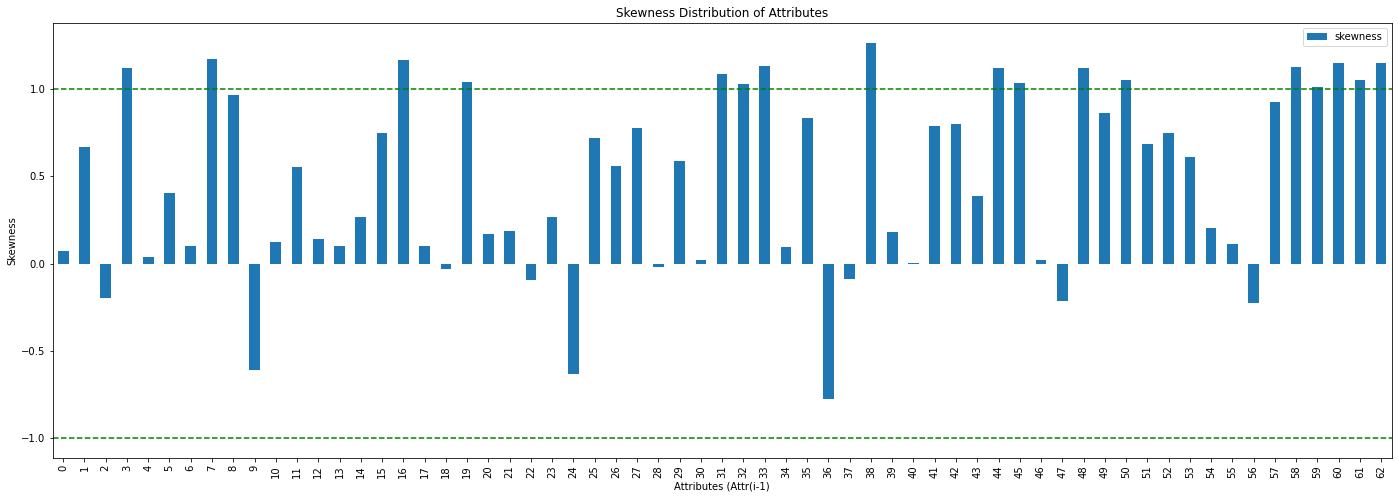

In [11]:
# Lets first find the skewness in dataset and plot the bar graph indicationg the distribution.

variables = [c for c in Bdata.columns if c!="class"]
skew = []

for variable in variables:
    skew.append([variable,Bdata[variable].skew()])
print(pd.DataFrame(skew,columns=["Attributes","Skew_Values"]))

skew = pd.DataFrame(skew,columns=['Attributes','skewness'])

fig,ax  = plt.subplots(1,1,figsize=(24,8))
axes = skew.plot(kind = 'bar',figsize=(24,8),ax=ax,
                 xlabel = ("Attributes (Attr(i-1)"),
                 ylabel = ("Skewness"),
                 title = ("Skewness Distribution of Attributes"))
axes = plt.axhline(y=1,color='g',linestyle = '--')
axes = plt.axhline(y=-1,color='g',linestyle = '--')


*$\color{red}{\textit{This Data contails skewness, which we need to treat beofre model building, we can accept skewness} \\ \textit{of -1.0 to +1.0 but there are 15 features for which skewness are greater than +1.0.}}$*

## *2. Data Visualization and Exploration*

In [12]:
# Creating a dict, which we will use to retrive the actual names of attributes.

names = {  "Attr1" : "net profit / total assets" ,
 "Attr2" : "total liabilities / total assets" ,
 "Attr3" : "working capital / total assets" ,
 "Attr4" : "current assets / short-term liabilities" ,
 "Attr5" : "[(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365" ,
 "Attr6" : "retained earnings / total assets" ,
 "Attr7" : "EBIT / total assets" ,
 "Attr8" : "book value of equity / total liabilities" ,
 "Attr9" : "sales / total assets" ,
 "Attr10" : "equity / total assets" ,
 "Attr11" : "(gross profit + extraordinary items + financial expenses) / total assets" ,
 "Attr12" : "gross profit / short-term liabilities" ,
 "Attr13" : "(gross profit + depreciation) / sales" ,
 "Attr14" : "(gross profit + interest) / total assets" ,
 "Attr15" : "(total liabilities * 365) / (gross profit + depreciation)" ,
 "Attr16" : "(gross profit + depreciation) / total liabilities" ,
 "Attr17" : "total assets / total liabilities" ,
 "Attr18" : "gross profit / total assets" ,
 "Attr19" : "gross profit / sales" ,
 "Attr20" : "(inventory * 365) / sales" ,
 "Attr21" : "sales (n) / sales (n-1)" ,
 "Attr22" : "profit on operating activities / total assets" ,
 "Attr23" : "net profit / sales" ,
 "Attr24" : "gross profit (in 3 years) / total assets" ,
 "Attr25" : "(equity - share capital) / total assets" ,
 "Attr26" : "(net profit + depreciation) / total liabilities" ,
 "Attr27" : "profit on operating activities / financial expenses" ,
 "Attr28" : "working capital / fixed assets" ,
 "Attr29" : "logarithm of total assets" ,
 "Attr30" : "(total liabilities - cash) / sales" ,
 "Attr31" : "(gross profit + interest) / sales" ,
 "Attr32" : "(current liabilities * 365) / cost of products sold" ,
 "Attr33" : "operating expenses / short-term liabilities" ,
 "Attr34" : "operating expenses / total liabilities" ,
 "Attr35" : "profit on sales / total assets" ,
 "Attr36" : "total sales / total assets" ,
 "Attr37" : "(current assets - inventories) / long-term liabilities" ,
 "Attr38" : "constant capital / total assets" ,
 "Attr39" : "profit on sales / sales" ,
 "Attr40" : "(current assets - inventory - receivables) / short-term liabilities" ,
 "Attr41" : "total liabilities / ((profit on operating activities + depreciation) * (12/365))" ,
 "Attr42" : "profit on operating activities / sales" ,
 "Attr43" : "rotation receivables + inventory turnover in days" ,
 "Attr44" : "(receivables * 365) / sales" ,
 "Attr45" : "net profit / inventory" ,
 "Attr46" : "(current assets - inventory) / short-term liabilities" ,
 "Attr47" : "(inventory * 365) / cost of products sold" ,
 "Attr48" : "EBITDA (profit on operating activities - depreciation) / total assets" ,
 "Attr49" : "EBITDA (profit on operating activities - depreciation) / sales" ,
 "Attr50" : "current assets / total liabilities" ,
 "Attr51" : "short-term liabilities / total assets" ,
 "Attr52" : "(short-term liabilities * 365) / cost of products sold)" ,
 "Attr53" : "equity / fixed assets" ,
 "Attr54" : "constant capital / fixed assets" ,
 "Attr55" : "working capital" ,
 "Attr56" : "(sales - cost of products sold) / sales" ,
 "Attr57" : "(current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation)" ,
 "Attr58" : "total costs /total sales" ,
 "Attr59" : "long-term liabilities / equity" ,
 "Attr60" : "sales / inventory" ,
 "Attr61" : "sales / receivables" ,
 "Attr62" : "(short-term liabilities *365) / sales" ,
 "Attr63" : "sales / short-term liabilities" ,
 "Attr64" : "sales / fixed assets" ,
 "class" : "class" }

### *Correlation Analysis,plotting highly correlated varibales to see the pattern and choose the attributes.*

In [13]:
cor = Bdata.corr()
cor_list = []
for i in cor.columns:
    cor_list.append(cor[(cor[i] > 0.95)|(cor[i]< -0.85)][i])
    
cor_list

[Attr1     1.000000
 Attr7     0.990845
 Attr11    0.960771
 Attr14    0.990818
 Attr18    0.990459
 Name: Attr1, dtype: float64,
 Attr2     1.000000
 Attr10   -0.985443
 Name: Attr2, dtype: float64,
 Attr3    1.0
 Name: Attr3, dtype: float64,
 Attr4    1.0
 Name: Attr4, dtype: float64,
 Attr5    1.0
 Name: Attr5, dtype: float64,
 Attr6    1.0
 Name: Attr6, dtype: float64,
 Attr1     0.990845
 Attr7     1.000000
 Attr11    0.970482
 Attr14    0.999973
 Attr18    0.999619
 Name: Attr7, dtype: float64,
 Attr8     1.000000
 Attr17    0.996676
 Name: Attr8, dtype: float64,
 Attr9    1.0
 Name: Attr9, dtype: float64,
 Attr2    -0.985443
 Attr10    1.000000
 Name: Attr10, dtype: float64,
 Attr1     0.960771
 Attr7     0.970482
 Attr11    1.000000
 Attr14    0.970447
 Attr18    0.970098
 Name: Attr11, dtype: float64,
 Attr12    1.0
 Name: Attr12, dtype: float64,
 Attr13    1.0
 Name: Attr13, dtype: float64,
 Attr1     0.990818
 Attr7     0.999973
 Attr11    0.970447
 Attr14    1.000000
 Attr1

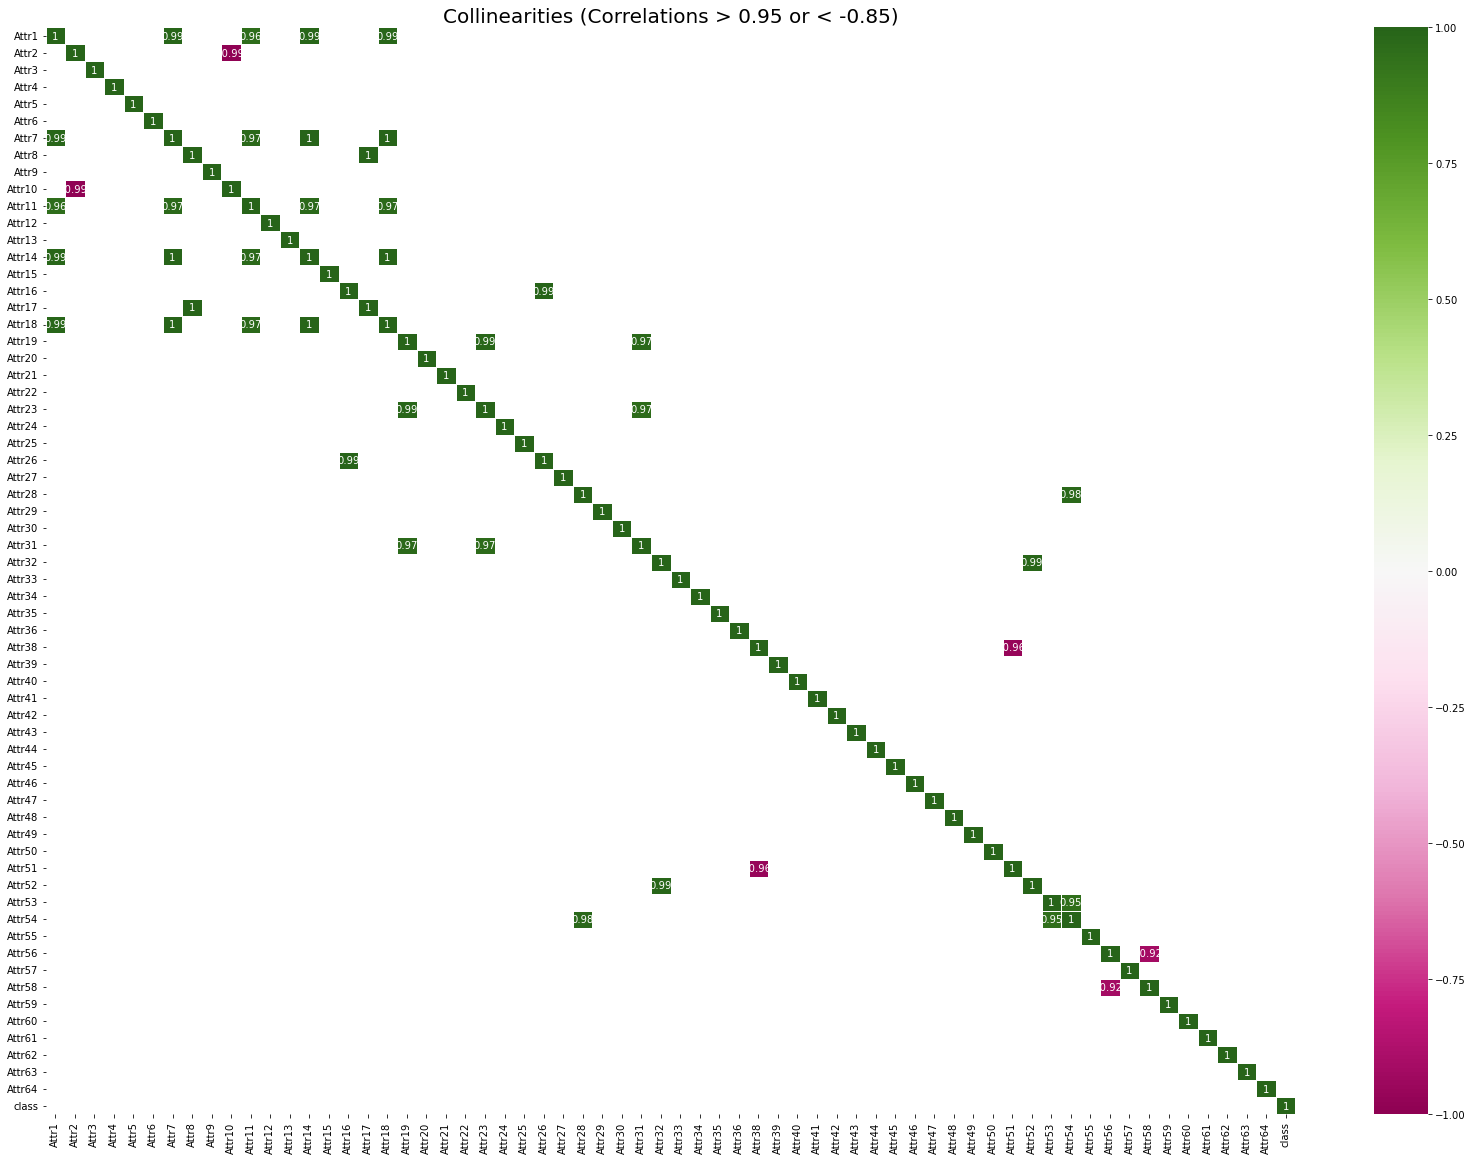

In [15]:
fig,ax  = plt.subplots(1,1,figsize = (28,20))
sns.heatmap(data= cor[(cor>0.95) | (cor<-.85)],vmin=-1,vmax=1,cmap="PiYG",linewidths=0.8,ax=ax,annot=True)
ax.set_title('Collinearities (Correlations > 0.95 or < -0.85)', fontsize=20)
plt.show();


$\color{red}{\textit{Heatmap shows that data contains features which are highly correlated, we plot boxplot, pairplot to decide which variables to take into consideration.}}$

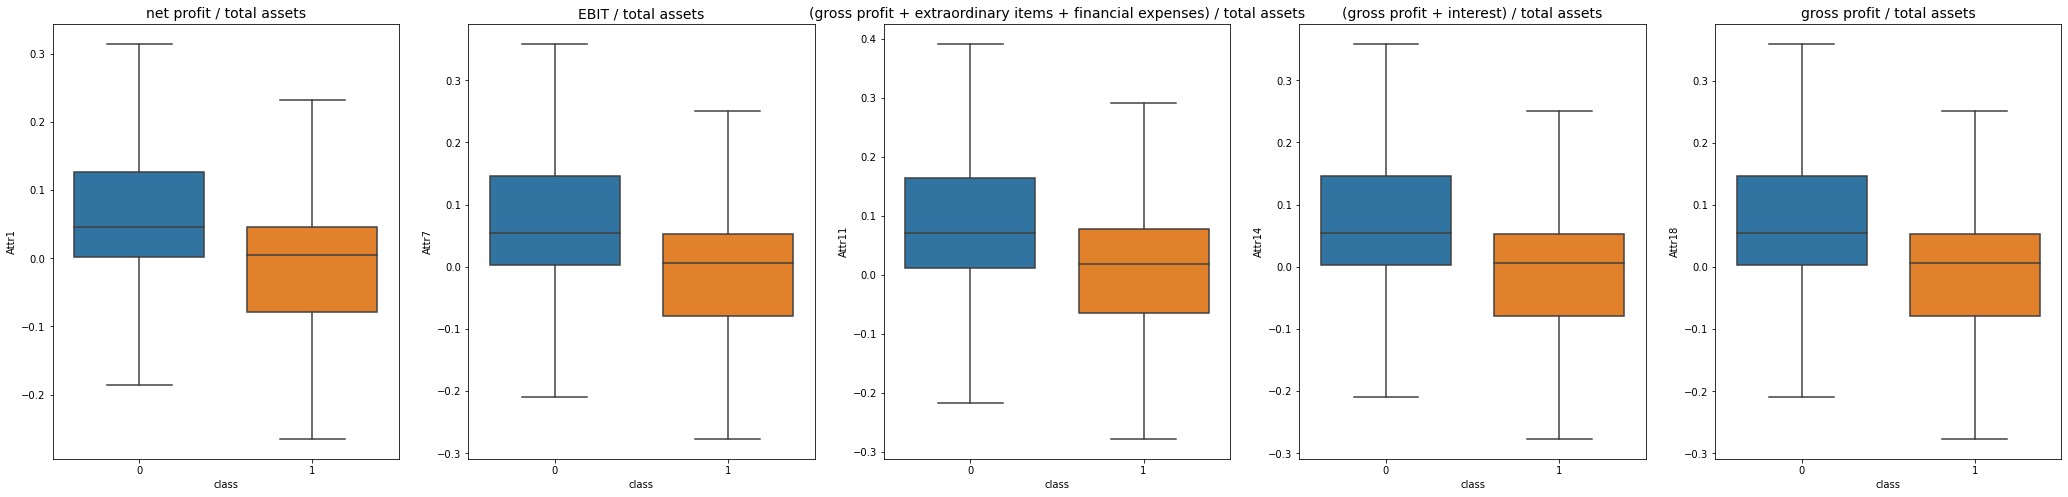

In [16]:
fig, axes = plt.subplots(1,5,figsize = (36,8))
set1 = ['Attr1','Attr7','Attr11','Attr14','Attr18',"class"]

for i in range(len(set1)-1):
    sns.boxplot(data=Bdata,y=set1[i],x= "class",width=0.75,ax=axes[i])
    axes[i].set_ylabel(set1[i])
    axes[i].set_xlabel("class")
    axes[i].set_title(names[set1[i]],fontsize=14)


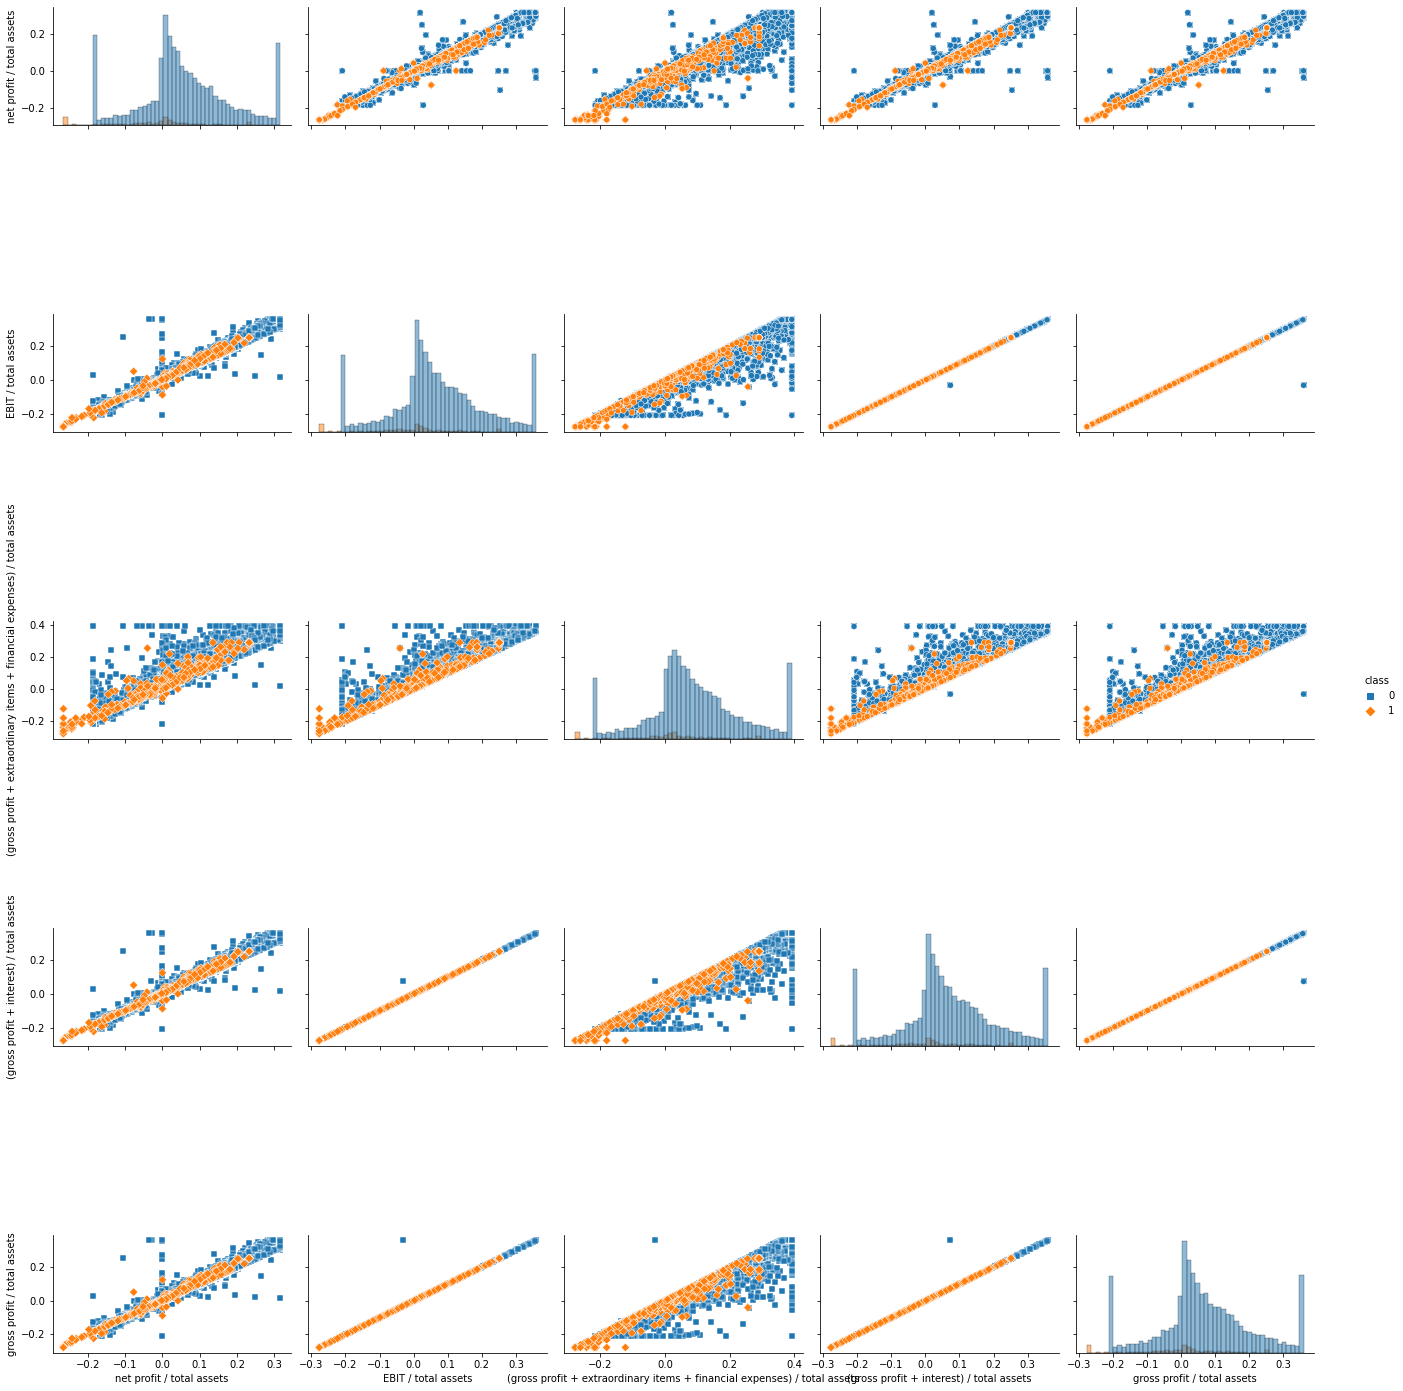

In [17]:
plt.rcParams['figure.figsize'] = (10,8)

col = dict(([i,names[i]] for i in set1))
ag = sns.pairplot(data=Bdata[set1].rename(columns=col),hue="class",markers=['s','D'],diag_kind='hist')
ag.map_upper(sns.scatterplot)
ag.fig.set_size_inches(20,20)


$\color{red}{\textit{These variables {'Attr1','Attr7','Attr11','Attr14','Attr18'} are highly correlated, we will take Attr11, which is more correlated with Attr1,Attr7 Attr14 and Attr18.}}$

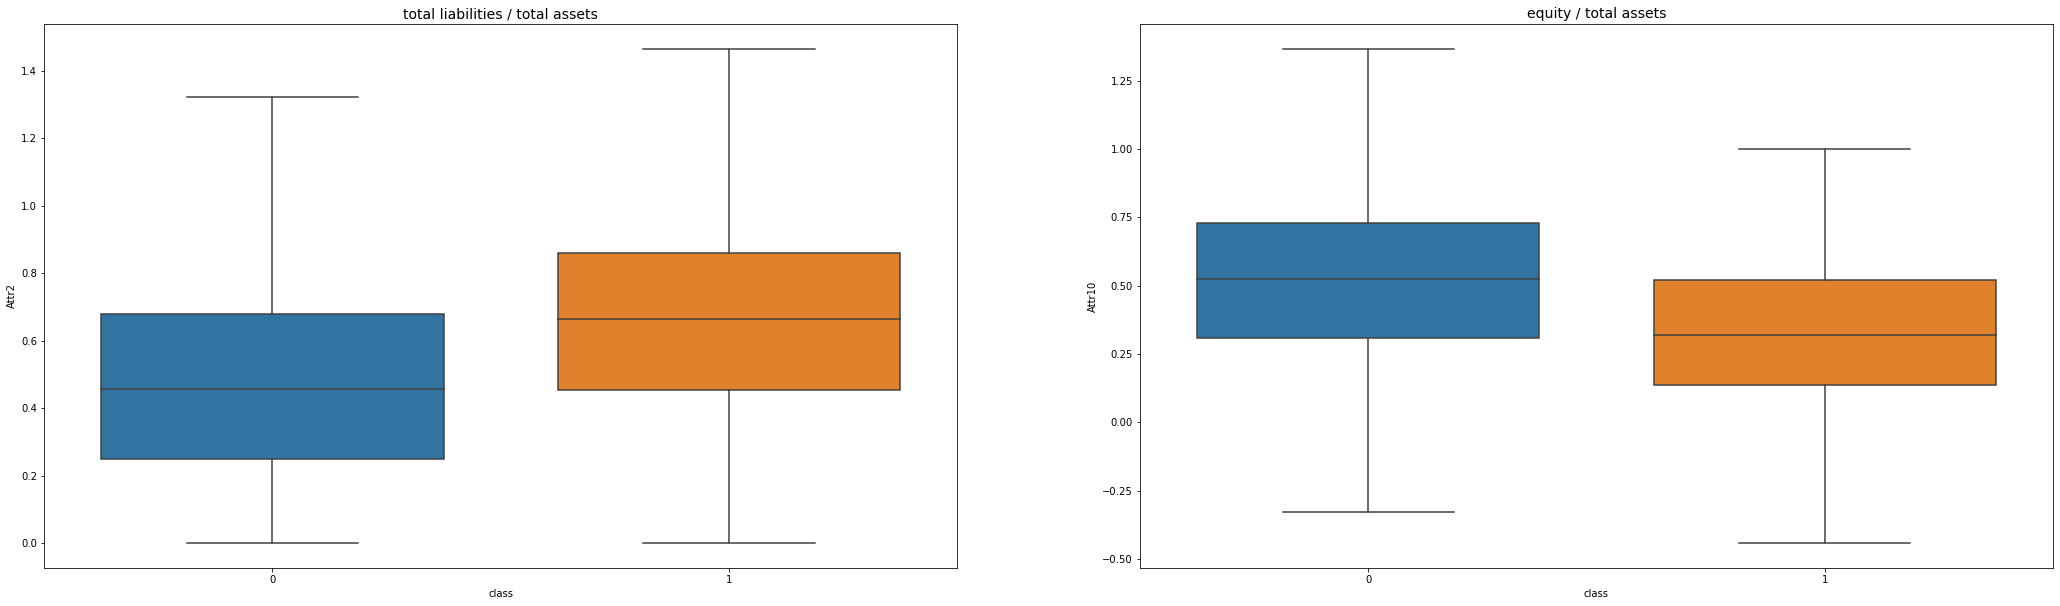

In [18]:
fig, axes = plt.subplots(1,2,figsize = (36,10))
set2 = ['Attr2','Attr10',"class"]

for i in range(len(set2)-1):
    sns.boxplot(data=Bdata,y=set2[i],x= "class",width=0.75,ax=axes[i])
    axes[i].set_ylabel(set2[i])
    axes[i].set_xlabel("class")
    axes[i].set_title(names[set2[i]],fontsize=14)

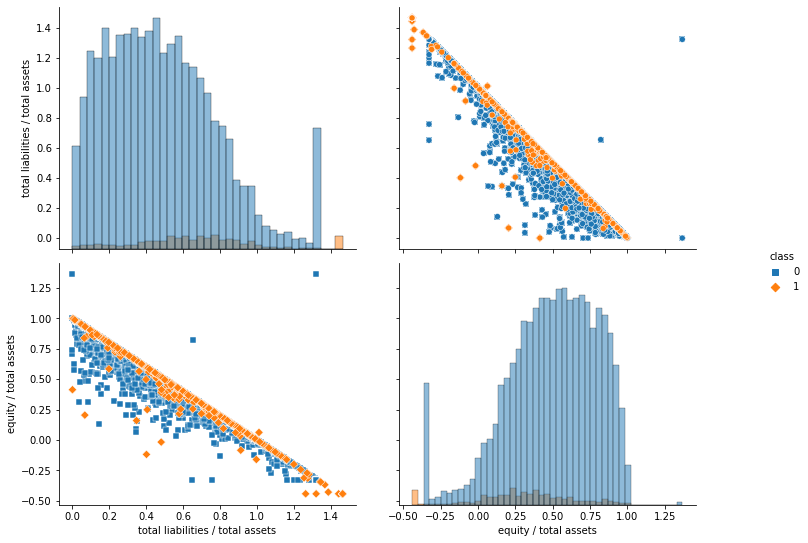

In [19]:
col = dict(([i,names[i]] for i in set2))
ag = sns.pairplot(data=Bdata[set2].rename(columns=col),hue="class",markers=['s','D'],diag_kind='hist')
ag.map_upper(sns.scatterplot)
ag.fig.set_size_inches(12,8)


$\color{red}{\textit{These variables {'Attr2','Attr10'} are nagative correlated, we will take Attr10}}$

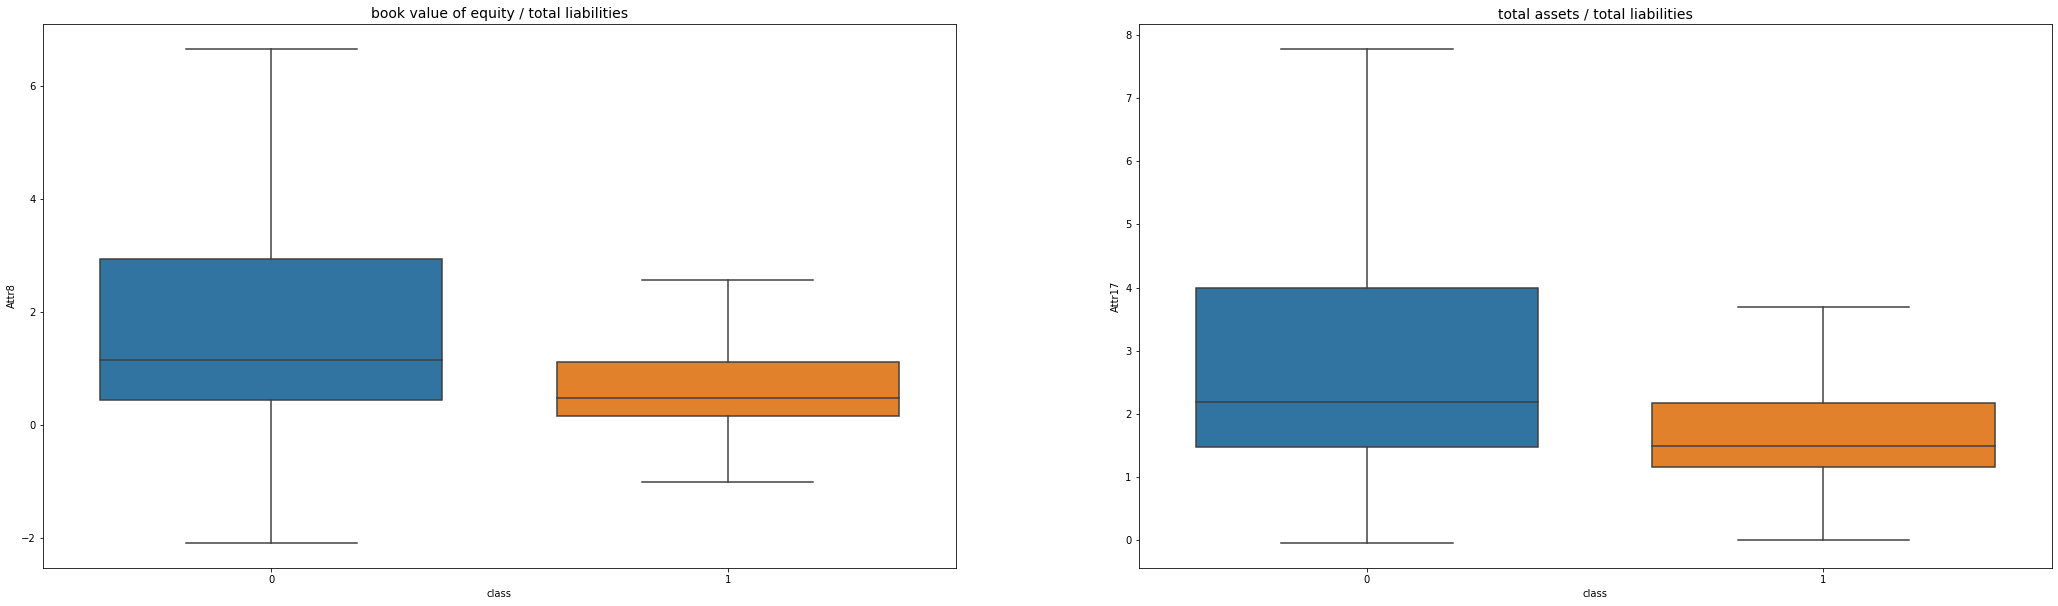

In [20]:
fig, axes = plt.subplots(1,2,figsize = (36,10))
set3 = ['Attr8','Attr17',"class"]

for i in range(len(set3)-1):
    sns.boxplot(data=Bdata,y=set3[i],x= "class",width=0.75,ax=axes[i])
    axes[i].set_ylabel(set3[i])
    axes[i].set_xlabel("class")
    axes[i].set_title(names[set3[i]],fontsize=14)

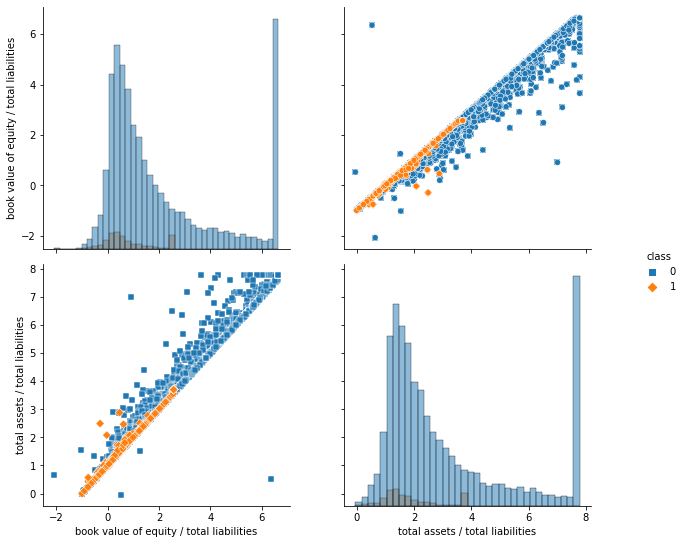

In [21]:
col = dict(([i,names[i]] for i in set3))
ag = sns.pairplot(data=Bdata[set3].rename(columns=col),hue="class",markers=['s','D'],diag_kind='hist')
ag.map_upper(sns.scatterplot)
ag.fig.set_size_inches(10,8)

$\color{red}{\textit{These variables {'Attr8','Attr17'} are correlated, we will take Attr17.}}$

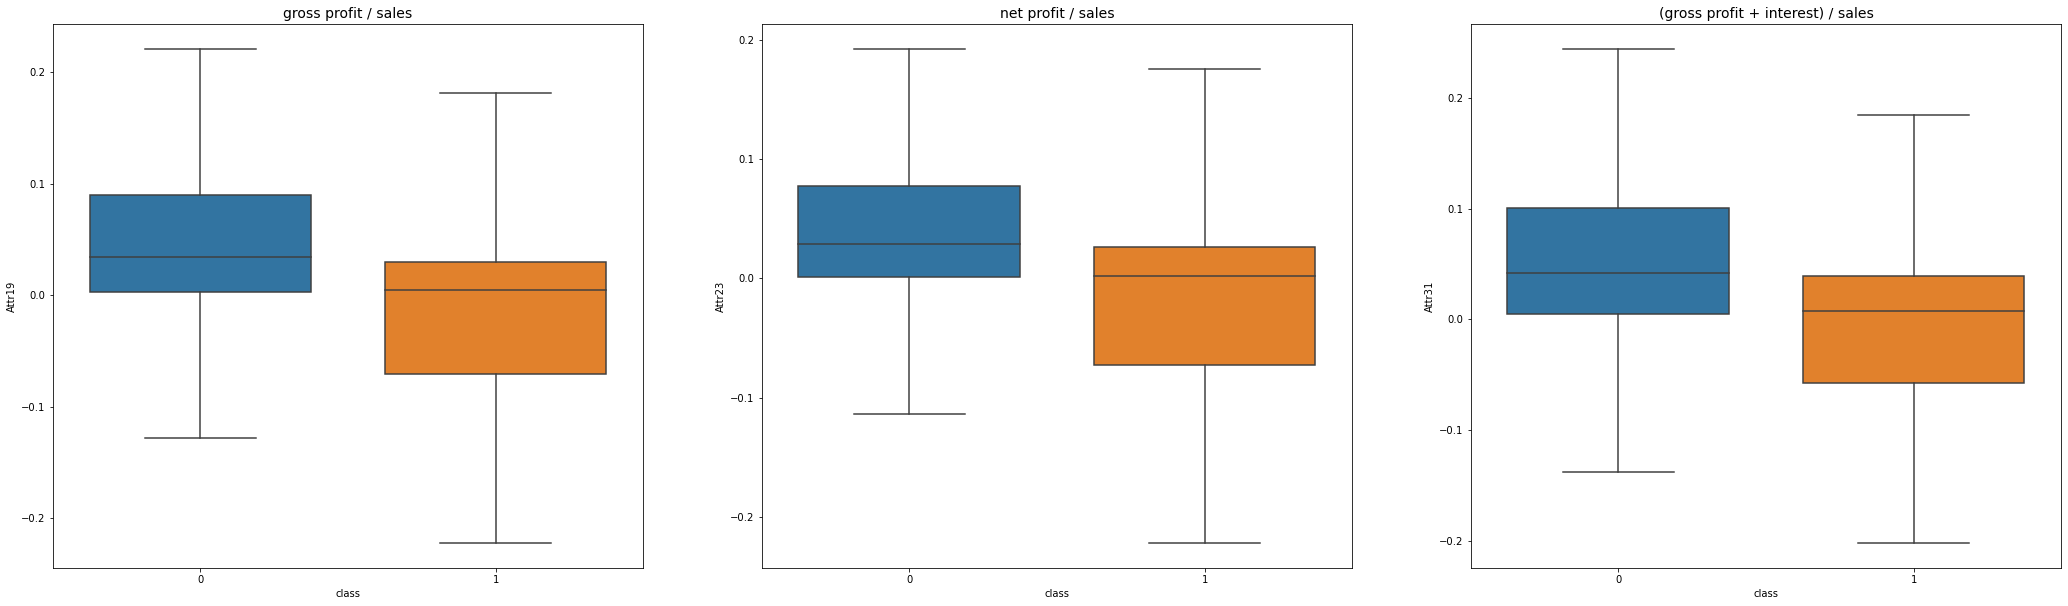

In [22]:
fig, axes = plt.subplots(1,3,figsize = (36,10))
set4 = ['Attr19','Attr23','Attr31',"class"]

for i in range(len(set4)-1):
    sns.boxplot(data=Bdata,y=set4[i],x= "class",width=0.75,ax=axes[i])
    axes[i].set_ylabel(set4[i])
    axes[i].set_xlabel("class")
    axes[i].set_title(names[set4[i]],fontsize=14)

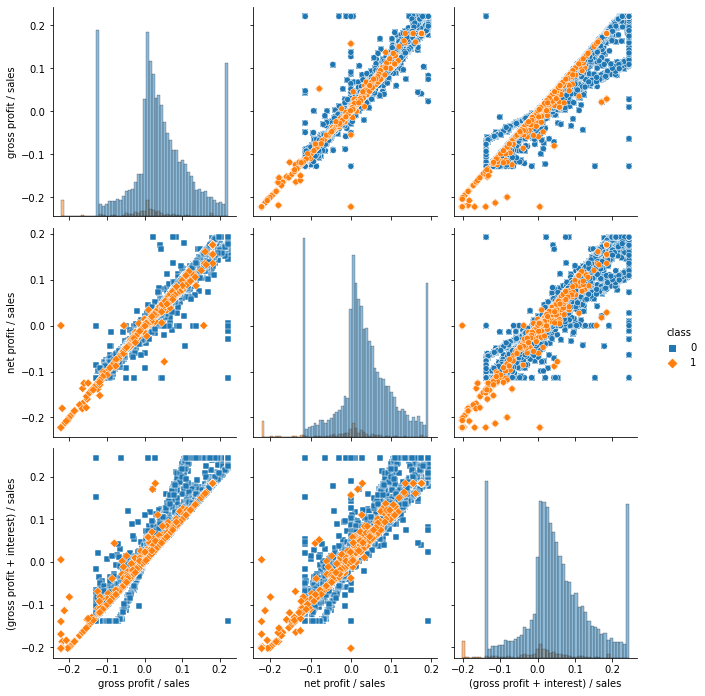

In [23]:
col = dict(([i,names[i]] for i in set4))
ag = sns.pairplot(data=Bdata[set4].rename(columns=col),hue="class",markers=['s','D'],diag_kind='hist')
ag.map_upper(sns.scatterplot)
ag.fig.set_size_inches(10,10)


$\color{red}{\textit{These variables {'Attr19','Attr23','Attr31'} are positive correlated, we will take Attr23.}}$

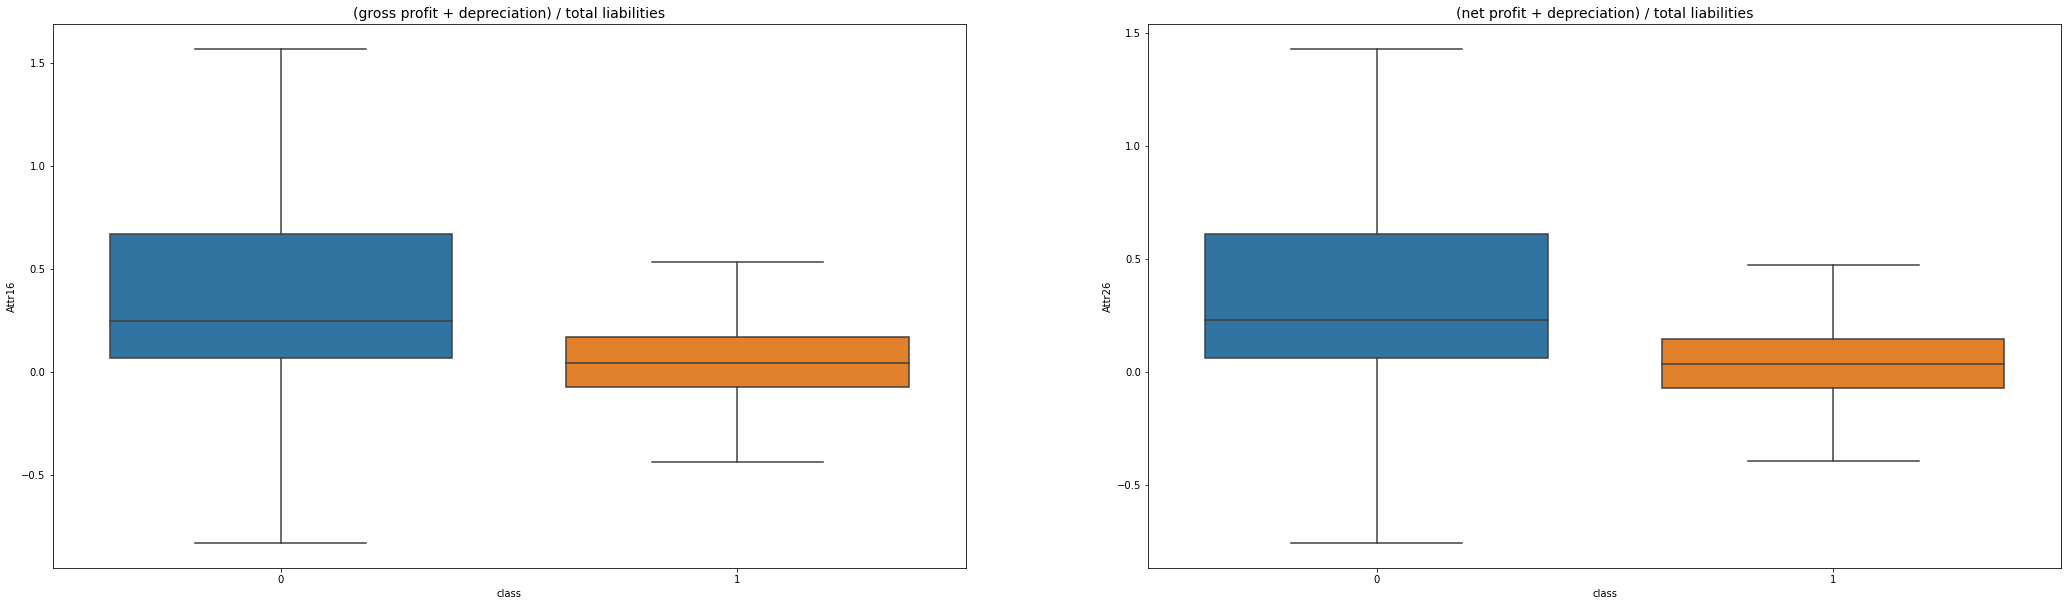

In [24]:
fig, axes = plt.subplots(1,2,figsize = (36,10))
set5 = ['Attr16','Attr26',"class"]

for i in range(len(set5)-1):
    sns.boxplot(data=Bdata,y=set5[i],x= "class",width=0.75,ax=axes[i])
    axes[i].set_ylabel(set5[i])
    axes[i].set_xlabel("class")
    axes[i].set_title(names[set5[i]],fontsize=14)

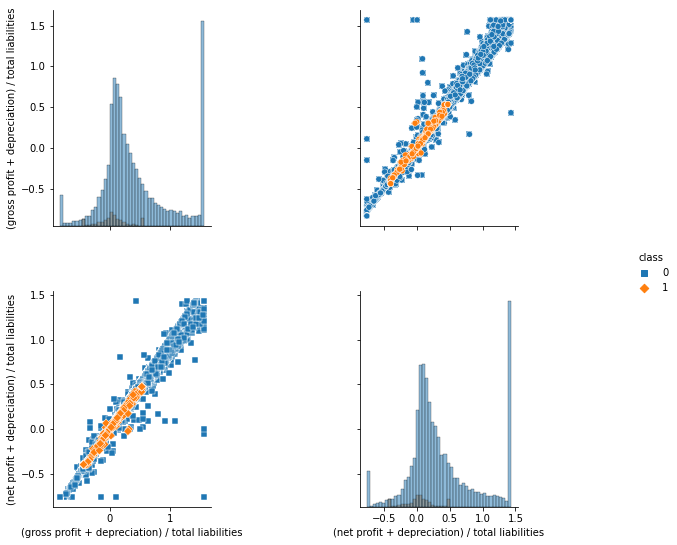

In [25]:
col = dict(([i,names[i]] for i in set5))
ag = sns.pairplot(data=Bdata[set5].rename(columns=col),hue="class",markers=['s','D'],diag_kind='hist')
ag.map_upper(sns.scatterplot)
ag.fig.set_size_inches(10,8)


$\color{red}{\textit{These variables {'Attr16','Attr26'} are positive correlated, we will take Attr16.}}$

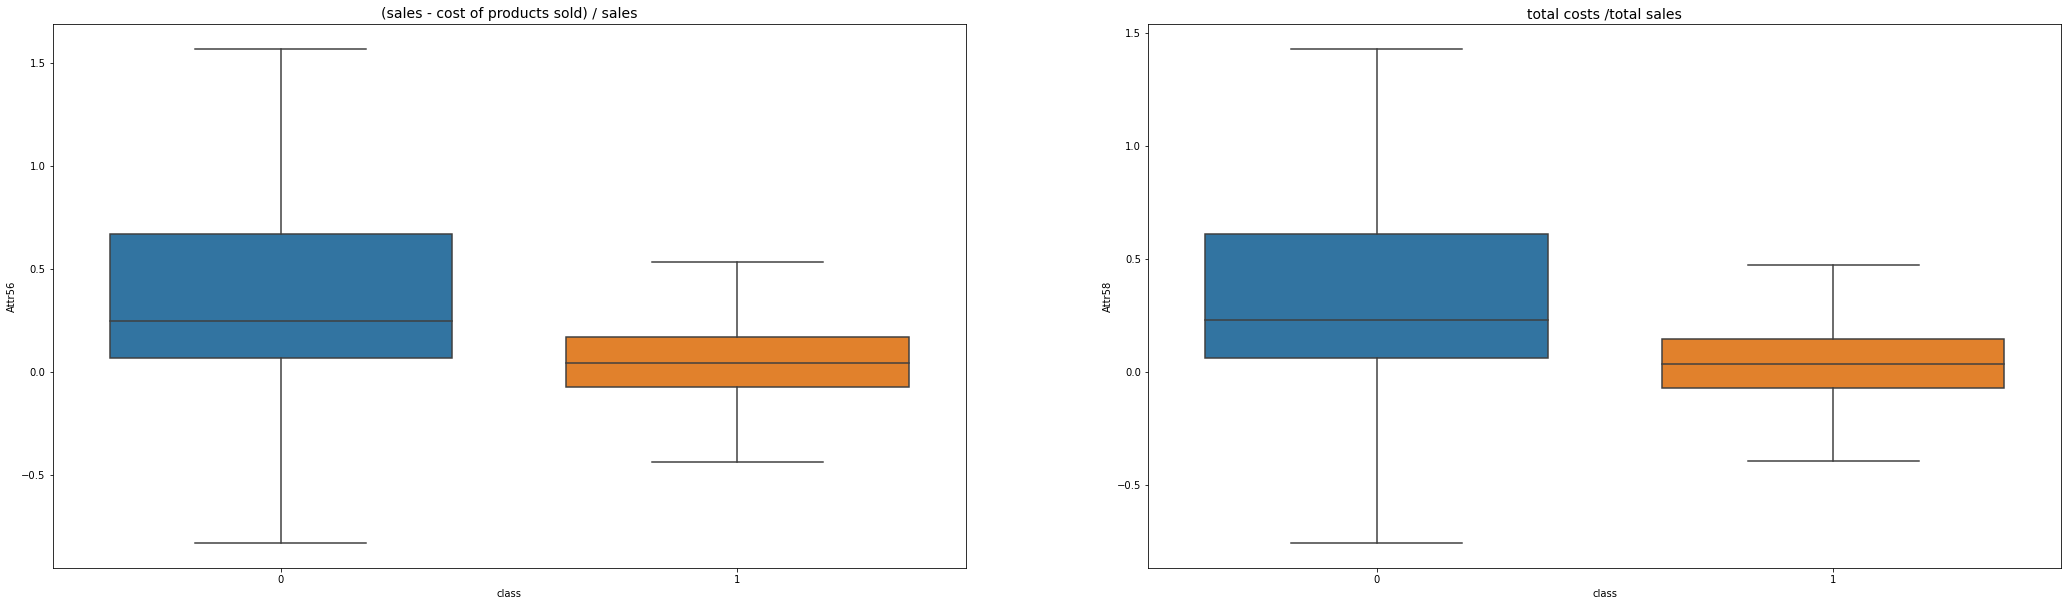

In [26]:
fig, axes = plt.subplots(1,2,figsize = (36,10))
set6 = ['Attr56','Attr58',"class"]

for i in range(len(set6)-1):
    sns.boxplot(data=Bdata,y=set5[i],x= "class",width=0.75,ax=axes[i])
    axes[i].set_ylabel(set6[i])
    axes[i].set_xlabel("class")
    axes[i].set_title(names[set6[i]],fontsize=14)

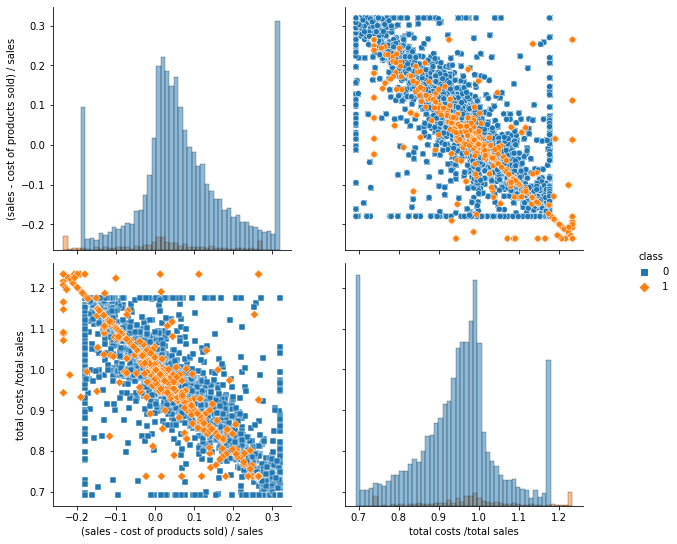

In [27]:
col = dict(([i,names[i]] for i in set6))
ag = sns.pairplot(data=Bdata[set6].rename(columns=col),hue="class",markers=['s','D'],diag_kind='hist')
ag.map_upper(sns.scatterplot)
ag.fig.set_size_inches(10,8)


$\color{red}{\textit{These variables {'Attr56','Attr58'} are negative correlated, we will take Attr58.}}$

### $\color{green}{\textit{Based on correlations of Attributes, we can choose 52 features on which we can do our analysis.} \\\textit {These are below:}}$

In [43]:
features_prob = ['Attr3', 'Attr4', 'Attr5', 'Attr6','Attr9', 'Attr10', 'Attr11', 'Attr12', 'Attr13', 'Attr15', 'Attr17', 
                 'Attr19', 'Attr20', 'Attr21', 'Attr22','Attr23', 'Attr24', 'Attr25', 'Attr26', 'Attr27', 'Attr28', 'Attr29',
                 'Attr30', 'Attr31','Attr33', 'Attr34', 'Attr35', 'Attr36','Attr38', 'Attr39', 'Attr40', 'Attr41', 'Attr42',
                 'Attr43', 'Attr44','Attr45', 'Attr46', 'Attr47', 'Attr48', 'Attr49', 'Attr50','Attr52', 'Attr53','Attr55',
                 'Attr57', 'Attr58','Attr59', 'Attr60', 'Attr61', 'Attr62', 'Attr63', 'Attr64', 'class'] 
len(features_prob)

53

In [29]:
from sklearn.model_selection import train_test_split, KFold,cross_val_score,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import recall_score,confusion_matrix




# *3. Feature Selection after Outlier Treatment*

For feature selection we will use 
1. LogisticRegression with Lasso.
2. RandomForestCLassifier with variable class weights

In [18]:
## Importing Libraries

from sklearn.model_selection import train_test_split

from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import recall_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline


In [44]:
Bdata_fp = Bdata[features_prob]

In [45]:
x = Bdata_fp.drop('class', axis=1)
y = Bdata_fp['class']
trainX, testX, trainY, testY = train_test_split(x, y,stratify=y, test_size = 0.25)

In [46]:
scaler = StandardScaler()
scaler.fit(trainX)

logistic = LogisticRegression(C=0.1, penalty='l1', solver='liblinear')
logistic.fit(trainX,trainY)

sel_ = SelectFromModel(logistic,threshold=0.2)
sel_.fit(scaler.transform(trainX.fillna(0)), trainY)

selected_feature = trainX.columns[(sel_.get_support())]
print('total features: {}'.format((trainX.shape[1])))
print('selected features: {}'.format(len(selected_feature)))
print('features with coefficients shrank to zero: {}'.format(
      np.sum(sel_.estimator_.coef_ == 0)))

selected_features = trainX.columns[(sel_.estimator_.coef_ != 0).ravel().tolist()]
selected_feature

total features: 52
selected features: 16
features with coefficients shrank to zero: 18


Index(['Attr3', 'Attr6', 'Attr10', 'Attr17', 'Attr23', 'Attr28', 'Attr33',
       'Attr38', 'Attr39', 'Attr40', 'Attr46', 'Attr47', 'Attr48', 'Attr58',
       'Attr61', 'Attr62'],
      dtype='object')

In [50]:
recall = recall_score(testY, logistic.predict(testX), average='macro')
recall


0.5159291921301669

In [51]:
features_log = ['Attr3', 'Attr6', 'Attr10', 'Attr17', 'Attr23', 'Attr33', 'Attr35',
       'Attr38', 'Attr39', 'Attr46', 'Attr48', 'Attr52', 'Attr58', 'Attr59',
       'Attr61', 'Attr62','class']

### $\color{green}{\textit{Using RandomForestClassifiers Feature Importance to select the features:}}$

15 most important features: [('Attr15', 0.16625893223412405), ('Attr6', 0.1396436542827959), ('Attr59', 0.10083344557831636), ('Attr23', 0.10038869917482338), ('Attr41', 0.09156170144057599), ('Attr64', 0.0857484254331899), ('Attr27', 0.06125246818446145), ('Attr61', 0.049641901745352345), ('Attr39', 0.03301146818690454), ('Attr20', 0.02613193011367272), ('Attr9', 0.023506899602536536), ('Attr44', 0.01508519204316384), ('Attr55', 0.010485959143717789), ('Attr35', 0.010391558734644056), ('Attr49', 0.01032194309264299)]


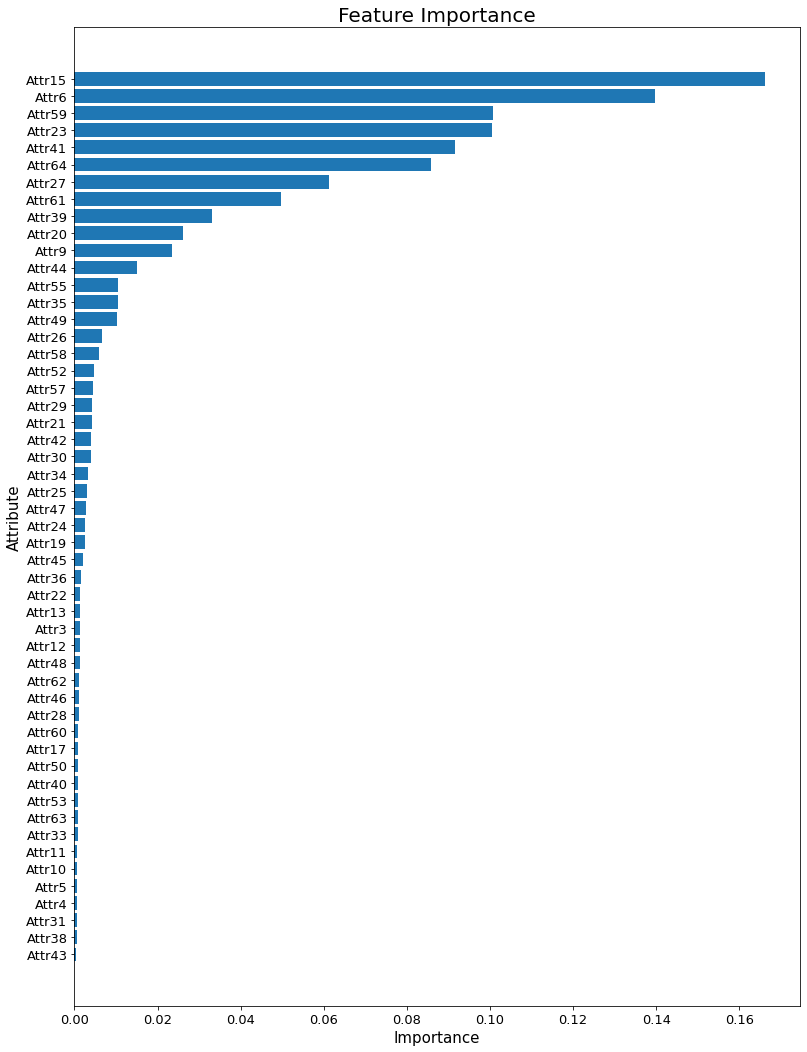

In [47]:
forest = RandomForestClassifier(n_estimators = 100, max_features = 40, max_depth = 40, random_state = 42)
forest.fit(trainX,trainY)

labels_ = features_prob[:-1]
import_     = forest.feature_importances_

important_features_dict = {}
for idx, val in zip(labels_,import_):
    important_features_dict[idx] = val

important_features_dict
lists = sorted(important_features_dict.items(), key=lambda item: item[1],reverse=False)
x,y = zip(*lists)


print(f'15 most important features: {lists[::-1][0:15]}')

# Graphically
plt.figure(figsize=(13,18))
plt.barh(x,y)
plt.title('Feature Importance', fontsize=20)
plt.ylabel('Attribute', fontsize=15)
plt.xlabel('Importance', fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()



### $\color{green}{\textit{Using RandomForestClassifiers with class weights to select the features:}}$

In [48]:
# Another try but with class_weight to check if we can improve the recall metric
df_model = Bdata[features_prob].copy(deep=True)
print(df_model.shape)

y = df_model["class"]
x = df_model.loc[:,df_model.columns != "class"]

X_train, X_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.25, random_state=42)

data_results = []

for weight in range(1,20):
    forest = RandomForestClassifier(n_estimators = 100, max_features = 40, max_depth = 40, class_weight={0:1,1:weight}, random_state = 42)
    forest.fit(X_train,y_train)
    model = SelectFromModel(forest, prefit=True)
    recall_ = recall_score(y_test, forest.predict(X_test), average='macro')
    names = model.get_support()
    data_results.append([weight, model.transform(X_train).shape[1], recall_.round(decimals=2), X_train.columns[names].values])

    
results = pd.DataFrame(data_results, columns=['weight','predictors','recall','predictor_names'])
results

(10503, 53)


C:\Users\karth\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
C:\Users\karth\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
C:\Users\karth\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
C:\Users\karth\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
C:\Users\karth\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
C:\Users\k

,weight,predictors,recall,predictor_names
0,1,10,0.96,"[Attr6, Attr15, Attr20, Attr23, Attr27, Attr39..."
1,2,10,0.96,"[Attr6, Attr15, Attr20, Attr23, Attr27, Attr39..."
2,3,10,0.96,"[Attr6, Attr15, Attr20, Attr23, Attr27, Attr39..."
3,4,11,0.96,"[Attr6, Attr9, Attr15, Attr20, Attr23, Attr27,..."
4,5,11,0.96,"[Attr6, Attr9, Attr15, Attr20, Attr23, Attr27,..."
5,6,11,0.96,"[Attr6, Attr9, Attr15, Attr20, Attr23, Attr27,..."
6,7,11,0.96,"[Attr6, Attr9, Attr15, Attr20, Attr23, Attr27,..."
7,8,11,0.96,"[Attr6, Attr9, Attr15, Attr20, Attr23, Attr27,..."
8,9,11,0.96,"[Attr6, Attr9, Attr15, Attr20, Attr23, Attr27,..."
9,10,12,0.96,"[Attr6, Attr9, Attr15, Attr20, Attr23, Attr26,..."


In [54]:
data_results[0]

[1,
 10,
 0.96,
 array(['Attr6', 'Attr15', 'Attr20', 'Attr23', 'Attr27', 'Attr39',
        'Attr41', 'Attr59', 'Attr61', 'Attr64'], dtype=object)]

$\color{red}{\textit{ A set of 10 features give a recall of 0.96 with Random Forest Classifier using a weight of 2}}$

In [60]:
features_10 = ['Attr6', 'Attr15', 'Attr20', 'Attr23', 'Attr27', 'Attr39',
        'Attr41', 'Attr59', 'Attr61', 'Attr64','class']

### $\color{red}{\textit{From RandomForest we are getting 10 best featrues 'Attr6', 'Attr15', 'Attr20', 'Attr23', 'Attr27',} \\
\textit{'Attr39','Attr41', 'Attr59', 'Attr61', 'Attr64', our further analysis will involve these features. We will use} \\ \textit{hyperparameter tuning to see if we can improve the recall of our model.}}$

## *4. Rigorous Evaluation of short-listed models*
### $\color{green}{\textit{In this section we will try different Classifiers to observe which perform best and} \\ \textit{then will do Hyperparamter tuning:}}$

In [108]:
df_model = Bdata[features_10].copy(deep=True)
print(df_model.shape)

y = df_model["class"]
x = df_model.loc[:,df_model.columns != "class"]

X_train, X_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.25, random_state=42)

(10503, 11)


### $\color{blue}{\textit{Short Note on using Class Weights:}}$

$\color{blue}{\textit{The data shows has heavily imbalanced classes, in which only 4% represents bankrupt against a 96% non-} bankrupt.\\ \textit{In order to overcome the observed imbalance, weights were used in the classifier as a proxy for prioritise  good} \\ \textit{predictions for the bankruptcy class. This approach allowed to positively turn the sensitivity of the classifier } \\ \textit{towards the prediction of bankruptcy.}}$

In [57]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)

classifiers = {
    "LogisiticRegression": LogisticRegression(max_iter=1000),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "RandomForestClassifier": RandomForestClassifier()
}

for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=skf,scoring='recall')
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, 
          "% recall score")

Classifiers:  LogisticRegression Has a training score of 1.0 % recall score
Classifiers:  KNeighborsClassifier Has a training score of 36.0 % recall score
Classifiers:  SVC Has a training score of 32.0 % recall score
Classifiers:  RandomForestClassifier Has a training score of 89.0 % recall score


$\color{red}{\textit{Clearly RandomForestClassifier is giving the best result till now, LogisticRegression fails to} \\ \textit{converge, we should try scaler with increasing the max_iter, so that it would converge.}}$

In [135]:
# LogisticRegression Hypertuning

LR = make_pipeline(StandardScaler(),LogisticRegression(penalty='l2'))

LRparam_grid = {
    'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'logisticregression__max_iter': list(range(1000,5000,1000)),
    'logisticregression__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'logisticregression__class_weight':[{0:1,1:2},{0:1,1:4},{0:1,1:6},{0:1,1:8},{0:1,1:10}]     
}

LR_search = GridSearchCV(LR, param_grid=LRparam_grid, refit = True,scoring='recall', verbose = 3, cv=2)

# fitting the model for grid search 
LR_search.fit(trainX , trainY)
LR_search.best_params_


# summarize
print('Mean Recall: %.3f' % LR_search.best_score_)
print('Config: %s' % LR_search.best_params_)

Fitting 2 folds for each of 700 candidates, totalling 1400 fits
[CV 1/2] END logisticregression__C=0.001, logisticregression__class_weight={0: 1, 1: 2}, logisticregression__max_iter=1000, logisticregression__solver=newton-cg;, score=0.000 total time=   0.0s
[CV 2/2] END logisticregression__C=0.001, logisticregression__class_weight={0: 1, 1: 2}, logisticregression__max_iter=1000, logisticregression__solver=newton-cg;, score=0.005 total time=   0.0s
[CV 1/2] END logisticregression__C=0.001, logisticregression__class_weight={0: 1, 1: 2}, logisticregression__max_iter=1000, logisticregression__solver=lbfgs;, score=0.000 total time=   0.0s
[CV 2/2] END logisticregression__C=0.001, logisticregression__class_weight={0: 1, 1: 2}, logisticregression__max_iter=1000, logisticregression__solver=lbfgs;, score=0.005 total time=   0.0s
[CV 1/2] END logisticregression__C=0.001, logisticregression__class_weight={0: 1, 1: 2}, logisticregression__max_iter=1000, logisticregression__solver=liblinear;, score

[CV 1/2] END logisticregression__C=0.001, logisticregression__class_weight={0: 1, 1: 4}, logisticregression__max_iter=1000, logisticregression__solver=liblinear;, score=0.210 total time=   0.0s
[CV 2/2] END logisticregression__C=0.001, logisticregression__class_weight={0: 1, 1: 4}, logisticregression__max_iter=1000, logisticregression__solver=liblinear;, score=0.211 total time=   0.0s
[CV 1/2] END logisticregression__C=0.001, logisticregression__class_weight={0: 1, 1: 4}, logisticregression__max_iter=1000, logisticregression__solver=sag;, score=0.070 total time=   0.1s
[CV 2/2] END logisticregression__C=0.001, logisticregression__class_weight={0: 1, 1: 4}, logisticregression__max_iter=1000, logisticregression__solver=sag;, score=0.054 total time=   0.1s
[CV 1/2] END logisticregression__C=0.001, logisticregression__class_weight={0: 1, 1: 4}, logisticregression__max_iter=1000, logisticregression__solver=saga;, score=0.070 total time=   0.1s
[CV 2/2] END logisticregression__C=0.001, logis

[CV 1/2] END logisticregression__C=0.001, logisticregression__class_weight={0: 1, 1: 6}, logisticregression__max_iter=1000, logisticregression__solver=saga;, score=0.151 total time=   0.1s
[CV 2/2] END logisticregression__C=0.001, logisticregression__class_weight={0: 1, 1: 6}, logisticregression__max_iter=1000, logisticregression__solver=saga;, score=0.157 total time=   0.2s
[CV 1/2] END logisticregression__C=0.001, logisticregression__class_weight={0: 1, 1: 6}, logisticregression__max_iter=2000, logisticregression__solver=newton-cg;, score=0.151 total time=   0.2s
[CV 2/2] END logisticregression__C=0.001, logisticregression__class_weight={0: 1, 1: 6}, logisticregression__max_iter=2000, logisticregression__solver=newton-cg;, score=0.157 total time=   0.0s
[CV 1/2] END logisticregression__C=0.001, logisticregression__class_weight={0: 1, 1: 6}, logisticregression__max_iter=2000, logisticregression__solver=lbfgs;, score=0.151 total time=   0.0s
[CV 2/2] END logisticregression__C=0.001, lo

[CV 2/2] END logisticregression__C=0.001, logisticregression__class_weight={0: 1, 1: 8}, logisticregression__max_iter=2000, logisticregression__solver=newton-cg;, score=0.227 total time=   0.0s
[CV 1/2] END logisticregression__C=0.001, logisticregression__class_weight={0: 1, 1: 8}, logisticregression__max_iter=2000, logisticregression__solver=lbfgs;, score=0.285 total time=   0.0s
[CV 2/2] END logisticregression__C=0.001, logisticregression__class_weight={0: 1, 1: 8}, logisticregression__max_iter=2000, logisticregression__solver=lbfgs;, score=0.227 total time=   0.0s
[CV 1/2] END logisticregression__C=0.001, logisticregression__class_weight={0: 1, 1: 8}, logisticregression__max_iter=2000, logisticregression__solver=liblinear;, score=0.538 total time=   0.0s
[CV 2/2] END logisticregression__C=0.001, logisticregression__class_weight={0: 1, 1: 8}, logisticregression__max_iter=2000, logisticregression__solver=liblinear;, score=0.438 total time=   0.0s
[CV 1/2] END logisticregression__C=0.0

[CV 1/2] END logisticregression__C=0.001, logisticregression__class_weight={0: 1, 1: 10}, logisticregression__max_iter=2000, logisticregression__solver=liblinear;, score=0.634 total time=   0.0s
[CV 2/2] END logisticregression__C=0.001, logisticregression__class_weight={0: 1, 1: 10}, logisticregression__max_iter=2000, logisticregression__solver=liblinear;, score=0.530 total time=   0.0s
[CV 1/2] END logisticregression__C=0.001, logisticregression__class_weight={0: 1, 1: 10}, logisticregression__max_iter=2000, logisticregression__solver=sag;, score=0.371 total time=   0.1s
[CV 2/2] END logisticregression__C=0.001, logisticregression__class_weight={0: 1, 1: 10}, logisticregression__max_iter=2000, logisticregression__solver=sag;, score=0.303 total time=   0.1s
[CV 1/2] END logisticregression__C=0.001, logisticregression__class_weight={0: 1, 1: 10}, logisticregression__max_iter=2000, logisticregression__solver=saga;, score=0.371 total time=   0.3s
[CV 2/2] END logisticregression__C=0.001, 

[CV 1/2] END logisticregression__C=0.01, logisticregression__class_weight={0: 1, 1: 2}, logisticregression__max_iter=2000, logisticregression__solver=saga;, score=0.070 total time=   0.1s
[CV 2/2] END logisticregression__C=0.01, logisticregression__class_weight={0: 1, 1: 2}, logisticregression__max_iter=2000, logisticregression__solver=saga;, score=0.065 total time=   0.1s
[CV 1/2] END logisticregression__C=0.01, logisticregression__class_weight={0: 1, 1: 2}, logisticregression__max_iter=3000, logisticregression__solver=newton-cg;, score=0.070 total time=   0.0s
[CV 2/2] END logisticregression__C=0.01, logisticregression__class_weight={0: 1, 1: 2}, logisticregression__max_iter=3000, logisticregression__solver=newton-cg;, score=0.065 total time=   0.0s
[CV 1/2] END logisticregression__C=0.01, logisticregression__class_weight={0: 1, 1: 2}, logisticregression__max_iter=3000, logisticregression__solver=lbfgs;, score=0.070 total time=   0.0s
[CV 2/2] END logisticregression__C=0.01, logistic

[CV 1/2] END logisticregression__C=0.01, logisticregression__class_weight={0: 1, 1: 4}, logisticregression__max_iter=3000, logisticregression__solver=lbfgs;, score=0.215 total time=   0.0s
[CV 2/2] END logisticregression__C=0.01, logisticregression__class_weight={0: 1, 1: 4}, logisticregression__max_iter=3000, logisticregression__solver=lbfgs;, score=0.124 total time=   0.0s
[CV 1/2] END logisticregression__C=0.01, logisticregression__class_weight={0: 1, 1: 4}, logisticregression__max_iter=3000, logisticregression__solver=liblinear;, score=0.220 total time=   0.1s
[CV 2/2] END logisticregression__C=0.01, logisticregression__class_weight={0: 1, 1: 4}, logisticregression__max_iter=3000, logisticregression__solver=liblinear;, score=0.157 total time=   0.0s
[CV 1/2] END logisticregression__C=0.01, logisticregression__class_weight={0: 1, 1: 4}, logisticregression__max_iter=3000, logisticregression__solver=sag;, score=0.215 total time=   0.2s
[CV 2/2] END logisticregression__C=0.01, logistic

[CV 1/2] END logisticregression__C=0.01, logisticregression__class_weight={0: 1, 1: 6}, logisticregression__max_iter=3000, logisticregression__solver=sag;, score=0.296 total time=   0.2s
[CV 2/2] END logisticregression__C=0.01, logisticregression__class_weight={0: 1, 1: 6}, logisticregression__max_iter=3000, logisticregression__solver=sag;, score=0.238 total time=   0.2s
[CV 1/2] END logisticregression__C=0.01, logisticregression__class_weight={0: 1, 1: 6}, logisticregression__max_iter=3000, logisticregression__solver=saga;, score=0.296 total time=   0.3s
[CV 2/2] END logisticregression__C=0.01, logisticregression__class_weight={0: 1, 1: 6}, logisticregression__max_iter=3000, logisticregression__solver=saga;, score=0.238 total time=   0.2s
[CV 1/2] END logisticregression__C=0.01, logisticregression__class_weight={0: 1, 1: 6}, logisticregression__max_iter=4000, logisticregression__solver=newton-cg;, score=0.296 total time=   0.0s
[CV 2/2] END logisticregression__C=0.01, logisticregressi

[CV 2/2] END logisticregression__C=0.01, logisticregression__class_weight={0: 1, 1: 8}, logisticregression__max_iter=4000, logisticregression__solver=newton-cg;, score=0.308 total time=   0.1s
[CV 1/2] END logisticregression__C=0.01, logisticregression__class_weight={0: 1, 1: 8}, logisticregression__max_iter=4000, logisticregression__solver=lbfgs;, score=0.419 total time=   0.0s
[CV 2/2] END logisticregression__C=0.01, logisticregression__class_weight={0: 1, 1: 8}, logisticregression__max_iter=4000, logisticregression__solver=lbfgs;, score=0.308 total time=   0.0s
[CV 1/2] END logisticregression__C=0.01, logisticregression__class_weight={0: 1, 1: 8}, logisticregression__max_iter=4000, logisticregression__solver=liblinear;, score=0.468 total time=   0.0s
[CV 2/2] END logisticregression__C=0.01, logisticregression__class_weight={0: 1, 1: 8}, logisticregression__max_iter=4000, logisticregression__solver=liblinear;, score=0.341 total time=   0.1s
[CV 1/2] END logisticregression__C=0.01, lo

[CV 1/2] END logisticregression__C=0.01, logisticregression__class_weight={0: 1, 1: 10}, logisticregression__max_iter=4000, logisticregression__solver=liblinear;, score=0.565 total time=   0.1s
[CV 2/2] END logisticregression__C=0.01, logisticregression__class_weight={0: 1, 1: 10}, logisticregression__max_iter=4000, logisticregression__solver=liblinear;, score=0.459 total time=   0.0s
[CV 1/2] END logisticregression__C=0.01, logisticregression__class_weight={0: 1, 1: 10}, logisticregression__max_iter=4000, logisticregression__solver=sag;, score=0.532 total time=   0.6s
[CV 2/2] END logisticregression__C=0.01, logisticregression__class_weight={0: 1, 1: 10}, logisticregression__max_iter=4000, logisticregression__solver=sag;, score=0.427 total time=   0.5s
[CV 1/2] END logisticregression__C=0.01, logisticregression__class_weight={0: 1, 1: 10}, logisticregression__max_iter=4000, logisticregression__solver=saga;, score=0.532 total time=   0.7s
[CV 2/2] END logisticregression__C=0.01, logist

[CV 1/2] END logisticregression__C=0.1, logisticregression__class_weight={0: 1, 1: 2}, logisticregression__max_iter=4000, logisticregression__solver=saga;, score=0.183 total time=   0.6s
[CV 2/2] END logisticregression__C=0.1, logisticregression__class_weight={0: 1, 1: 2}, logisticregression__max_iter=4000, logisticregression__solver=saga;, score=0.146 total time=   0.4s
[CV 1/2] END logisticregression__C=0.1, logisticregression__class_weight={0: 1, 1: 4}, logisticregression__max_iter=1000, logisticregression__solver=newton-cg;, score=0.306 total time=   0.1s
[CV 2/2] END logisticregression__C=0.1, logisticregression__class_weight={0: 1, 1: 4}, logisticregression__max_iter=1000, logisticregression__solver=newton-cg;, score=0.243 total time=   0.1s
[CV 1/2] END logisticregression__C=0.1, logisticregression__class_weight={0: 1, 1: 4}, logisticregression__max_iter=1000, logisticregression__solver=lbfgs;, score=0.306 total time=   0.1s
[CV 2/2] END logisticregression__C=0.1, logisticregres

[CV 1/2] END logisticregression__C=0.1, logisticregression__class_weight={0: 1, 1: 6}, logisticregression__max_iter=1000, logisticregression__solver=lbfgs;, score=0.441 total time=   0.1s
[CV 2/2] END logisticregression__C=0.1, logisticregression__class_weight={0: 1, 1: 6}, logisticregression__max_iter=1000, logisticregression__solver=lbfgs;, score=0.341 total time=   0.1s
[CV 1/2] END logisticregression__C=0.1, logisticregression__class_weight={0: 1, 1: 6}, logisticregression__max_iter=1000, logisticregression__solver=liblinear;, score=0.435 total time=   0.1s
[CV 2/2] END logisticregression__C=0.1, logisticregression__class_weight={0: 1, 1: 6}, logisticregression__max_iter=1000, logisticregression__solver=liblinear;, score=0.335 total time=   0.1s
[CV 1/2] END logisticregression__C=0.1, logisticregression__class_weight={0: 1, 1: 6}, logisticregression__max_iter=1000, logisticregression__solver=sag;, score=0.441 total time=   4.9s
[CV 2/2] END logisticregression__C=0.1, logisticregres

C:\Users\Shanks\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 1/2] END logisticregression__C=0.1, logisticregression__class_weight={0: 1, 1: 8}, logisticregression__max_iter=1000, logisticregression__solver=sag;, score=0.489 total time=   5.8s


C:\Users\Shanks\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 2/2] END logisticregression__C=0.1, logisticregression__class_weight={0: 1, 1: 8}, logisticregression__max_iter=1000, logisticregression__solver=sag;, score=0.362 total time=   6.1s
[CV 1/2] END logisticregression__C=0.1, logisticregression__class_weight={0: 1, 1: 8}, logisticregression__max_iter=1000, logisticregression__solver=saga;, score=0.500 total time=   0.4s
[CV 2/2] END logisticregression__C=0.1, logisticregression__class_weight={0: 1, 1: 8}, logisticregression__max_iter=1000, logisticregression__solver=saga;, score=0.422 total time=   0.4s
[CV 1/2] END logisticregression__C=0.1, logisticregression__class_weight={0: 1, 1: 8}, logisticregression__max_iter=2000, logisticregression__solver=newton-cg;, score=0.500 total time=   0.1s
[CV 2/2] END logisticregression__C=0.1, logisticregression__class_weight={0: 1, 1: 8}, logisticregression__max_iter=2000, logisticregression__solver=newton-cg;, score=0.422 total time=   0.1s
[CV 1/2] END logisticregression__C=0.1, logisticregressi

C:\Users\Shanks\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 1/2] END logisticregression__C=0.1, logisticregression__class_weight={0: 1, 1: 8}, logisticregression__max_iter=2000, logisticregression__solver=sag;, score=0.591 total time=  12.0s


C:\Users\Shanks\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 2/2] END logisticregression__C=0.1, logisticregression__class_weight={0: 1, 1: 8}, logisticregression__max_iter=2000, logisticregression__solver=sag;, score=0.324 total time=  11.9s
[CV 1/2] END logisticregression__C=0.1, logisticregression__class_weight={0: 1, 1: 8}, logisticregression__max_iter=2000, logisticregression__solver=saga;, score=0.500 total time=   0.4s
[CV 2/2] END logisticregression__C=0.1, logisticregression__class_weight={0: 1, 1: 8}, logisticregression__max_iter=2000, logisticregression__solver=saga;, score=0.422 total time=   0.5s
[CV 1/2] END logisticregression__C=0.1, logisticregression__class_weight={0: 1, 1: 8}, logisticregression__max_iter=3000, logisticregression__solver=newton-cg;, score=0.500 total time=   0.1s
[CV 2/2] END logisticregression__C=0.1, logisticregression__class_weight={0: 1, 1: 8}, logisticregression__max_iter=3000, logisticregression__solver=newton-cg;, score=0.422 total time=   0.1s
[CV 1/2] END logisticregression__C=0.1, logisticregressi

C:\Users\Shanks\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 1/2] END logisticregression__C=0.1, logisticregression__class_weight={0: 1, 1: 8}, logisticregression__max_iter=3000, logisticregression__solver=sag;, score=0.489 total time=  17.9s


C:\Users\Shanks\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 2/2] END logisticregression__C=0.1, logisticregression__class_weight={0: 1, 1: 8}, logisticregression__max_iter=3000, logisticregression__solver=sag;, score=0.432 total time=  18.4s
[CV 1/2] END logisticregression__C=0.1, logisticregression__class_weight={0: 1, 1: 8}, logisticregression__max_iter=3000, logisticregression__solver=saga;, score=0.500 total time=   0.6s
[CV 2/2] END logisticregression__C=0.1, logisticregression__class_weight={0: 1, 1: 8}, logisticregression__max_iter=3000, logisticregression__solver=saga;, score=0.422 total time=   0.6s
[CV 1/2] END logisticregression__C=0.1, logisticregression__class_weight={0: 1, 1: 8}, logisticregression__max_iter=4000, logisticregression__solver=newton-cg;, score=0.500 total time=   0.1s
[CV 2/2] END logisticregression__C=0.1, logisticregression__class_weight={0: 1, 1: 8}, logisticregression__max_iter=4000, logisticregression__solver=newton-cg;, score=0.422 total time=   0.1s
[CV 1/2] END logisticregression__C=0.1, logisticregressi

C:\Users\Shanks\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 1/2] END logisticregression__C=0.1, logisticregression__class_weight={0: 1, 1: 8}, logisticregression__max_iter=4000, logisticregression__solver=sag;, score=0.645 total time=  24.6s


C:\Users\Shanks\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 2/2] END logisticregression__C=0.1, logisticregression__class_weight={0: 1, 1: 8}, logisticregression__max_iter=4000, logisticregression__solver=sag;, score=0.292 total time=  24.1s
[CV 1/2] END logisticregression__C=0.1, logisticregression__class_weight={0: 1, 1: 8}, logisticregression__max_iter=4000, logisticregression__solver=saga;, score=0.500 total time=   0.6s
[CV 2/2] END logisticregression__C=0.1, logisticregression__class_weight={0: 1, 1: 8}, logisticregression__max_iter=4000, logisticregression__solver=saga;, score=0.422 total time=   0.6s
[CV 1/2] END logisticregression__C=0.1, logisticregression__class_weight={0: 1, 1: 10}, logisticregression__max_iter=1000, logisticregression__solver=newton-cg;, score=0.581 total time=   0.1s
[CV 2/2] END logisticregression__C=0.1, logisticregression__class_weight={0: 1, 1: 10}, logisticregression__max_iter=1000, logisticregression__solver=newton-cg;, score=0.497 total time=   0.1s
[CV 1/2] END logisticregression__C=0.1, logisticregres

C:\Users\Shanks\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 1/2] END logisticregression__C=0.1, logisticregression__class_weight={0: 1, 1: 10}, logisticregression__max_iter=1000, logisticregression__solver=sag;, score=0.409 total time=   5.8s


C:\Users\Shanks\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 2/2] END logisticregression__C=0.1, logisticregression__class_weight={0: 1, 1: 10}, logisticregression__max_iter=1000, logisticregression__solver=sag;, score=0.443 total time=   6.4s


C:\Users\Shanks\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 1/2] END logisticregression__C=0.1, logisticregression__class_weight={0: 1, 1: 10}, logisticregression__max_iter=1000, logisticregression__solver=saga;, score=0.602 total time=   6.7s


C:\Users\Shanks\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 2/2] END logisticregression__C=0.1, logisticregression__class_weight={0: 1, 1: 10}, logisticregression__max_iter=1000, logisticregression__solver=saga;, score=0.546 total time=   6.5s
[CV 1/2] END logisticregression__C=0.1, logisticregression__class_weight={0: 1, 1: 10}, logisticregression__max_iter=2000, logisticregression__solver=newton-cg;, score=0.581 total time=   0.1s
[CV 2/2] END logisticregression__C=0.1, logisticregression__class_weight={0: 1, 1: 10}, logisticregression__max_iter=2000, logisticregression__solver=newton-cg;, score=0.497 total time=   0.1s
[CV 1/2] END logisticregression__C=0.1, logisticregression__class_weight={0: 1, 1: 10}, logisticregression__max_iter=2000, logisticregression__solver=lbfgs;, score=0.581 total time=   0.1s
[CV 2/2] END logisticregression__C=0.1, logisticregression__class_weight={0: 1, 1: 10}, logisticregression__max_iter=2000, logisticregression__solver=lbfgs;, score=0.497 total time=   0.1s
[CV 1/2] END logisticregression__C=0.1, logistic

C:\Users\Shanks\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 1/2] END logisticregression__C=0.1, logisticregression__class_weight={0: 1, 1: 10}, logisticregression__max_iter=2000, logisticregression__solver=sag;, score=0.457 total time=  12.2s


C:\Users\Shanks\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 2/2] END logisticregression__C=0.1, logisticregression__class_weight={0: 1, 1: 10}, logisticregression__max_iter=2000, logisticregression__solver=sag;, score=0.508 total time=  11.4s


C:\Users\Shanks\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 1/2] END logisticregression__C=0.1, logisticregression__class_weight={0: 1, 1: 10}, logisticregression__max_iter=2000, logisticregression__solver=saga;, score=0.597 total time=  13.6s


C:\Users\Shanks\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 2/2] END logisticregression__C=0.1, logisticregression__class_weight={0: 1, 1: 10}, logisticregression__max_iter=2000, logisticregression__solver=saga;, score=0.535 total time=  13.7s
[CV 1/2] END logisticregression__C=0.1, logisticregression__class_weight={0: 1, 1: 10}, logisticregression__max_iter=3000, logisticregression__solver=newton-cg;, score=0.581 total time=   0.1s
[CV 2/2] END logisticregression__C=0.1, logisticregression__class_weight={0: 1, 1: 10}, logisticregression__max_iter=3000, logisticregression__solver=newton-cg;, score=0.497 total time=   0.1s
[CV 1/2] END logisticregression__C=0.1, logisticregression__class_weight={0: 1, 1: 10}, logisticregression__max_iter=3000, logisticregression__solver=lbfgs;, score=0.581 total time=   0.1s
[CV 2/2] END logisticregression__C=0.1, logisticregression__class_weight={0: 1, 1: 10}, logisticregression__max_iter=3000, logisticregression__solver=lbfgs;, score=0.497 total time=   0.1s
[CV 1/2] END logisticregression__C=0.1, logistic

C:\Users\Shanks\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 1/2] END logisticregression__C=0.1, logisticregression__class_weight={0: 1, 1: 10}, logisticregression__max_iter=3000, logisticregression__solver=sag;, score=0.591 total time=  19.1s


C:\Users\Shanks\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 2/2] END logisticregression__C=0.1, logisticregression__class_weight={0: 1, 1: 10}, logisticregression__max_iter=3000, logisticregression__solver=sag;, score=0.335 total time=  17.6s


C:\Users\Shanks\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 1/2] END logisticregression__C=0.1, logisticregression__class_weight={0: 1, 1: 10}, logisticregression__max_iter=3000, logisticregression__solver=saga;, score=0.505 total time=  19.2s


C:\Users\Shanks\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 2/2] END logisticregression__C=0.1, logisticregression__class_weight={0: 1, 1: 10}, logisticregression__max_iter=3000, logisticregression__solver=saga;, score=0.492 total time=  20.0s
[CV 1/2] END logisticregression__C=0.1, logisticregression__class_weight={0: 1, 1: 10}, logisticregression__max_iter=4000, logisticregression__solver=newton-cg;, score=0.581 total time=   0.1s
[CV 2/2] END logisticregression__C=0.1, logisticregression__class_weight={0: 1, 1: 10}, logisticregression__max_iter=4000, logisticregression__solver=newton-cg;, score=0.497 total time=   0.1s
[CV 1/2] END logisticregression__C=0.1, logisticregression__class_weight={0: 1, 1: 10}, logisticregression__max_iter=4000, logisticregression__solver=lbfgs;, score=0.581 total time=   0.1s
[CV 2/2] END logisticregression__C=0.1, logisticregression__class_weight={0: 1, 1: 10}, logisticregression__max_iter=4000, logisticregression__solver=lbfgs;, score=0.497 total time=   0.1s
[CV 1/2] END logisticregression__C=0.1, logistic

C:\Users\Shanks\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 1/2] END logisticregression__C=0.1, logisticregression__class_weight={0: 1, 1: 10}, logisticregression__max_iter=4000, logisticregression__solver=sag;, score=0.575 total time=  23.9s


C:\Users\Shanks\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 2/2] END logisticregression__C=0.1, logisticregression__class_weight={0: 1, 1: 10}, logisticregression__max_iter=4000, logisticregression__solver=sag;, score=0.508 total time=  24.1s


C:\Users\Shanks\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 1/2] END logisticregression__C=0.1, logisticregression__class_weight={0: 1, 1: 10}, logisticregression__max_iter=4000, logisticregression__solver=saga;, score=0.602 total time=  26.8s


C:\Users\Shanks\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 2/2] END logisticregression__C=0.1, logisticregression__class_weight={0: 1, 1: 10}, logisticregression__max_iter=4000, logisticregression__solver=saga;, score=0.503 total time=  29.1s
[CV 1/2] END logisticregression__C=1, logisticregression__class_weight={0: 1, 1: 2}, logisticregression__max_iter=1000, logisticregression__solver=newton-cg;, score=0.231 total time=   0.1s
[CV 2/2] END logisticregression__C=1, logisticregression__class_weight={0: 1, 1: 2}, logisticregression__max_iter=1000, logisticregression__solver=newton-cg;, score=0.168 total time=   0.2s
[CV 1/2] END logisticregression__C=1, logisticregression__class_weight={0: 1, 1: 2}, logisticregression__max_iter=1000, logisticregression__solver=lbfgs;, score=0.231 total time=   0.3s
[CV 2/2] END logisticregression__C=1, logisticregression__class_weight={0: 1, 1: 2}, logisticregression__max_iter=1000, logisticregression__solver=lbfgs;, score=0.168 total time=   0.1s
[CV 1/2] END logisticregression__C=1, logisticregression__cl

[CV 2/2] END logisticregression__C=1, logisticregression__class_weight={0: 1, 1: 4}, logisticregression__max_iter=1000, logisticregression__solver=lbfgs;, score=0.303 total time=   0.1s
[CV 1/2] END logisticregression__C=1, logisticregression__class_weight={0: 1, 1: 4}, logisticregression__max_iter=1000, logisticregression__solver=liblinear;, score=0.355 total time=   0.2s
[CV 2/2] END logisticregression__C=1, logisticregression__class_weight={0: 1, 1: 4}, logisticregression__max_iter=1000, logisticregression__solver=liblinear;, score=0.303 total time=   0.2s
[CV 1/2] END logisticregression__C=1, logisticregression__class_weight={0: 1, 1: 4}, logisticregression__max_iter=1000, logisticregression__solver=sag;, score=0.355 total time=   0.6s
[CV 2/2] END logisticregression__C=1, logisticregression__class_weight={0: 1, 1: 4}, logisticregression__max_iter=1000, logisticregression__solver=sag;, score=0.303 total time=   0.5s
[CV 1/2] END logisticregression__C=1, logisticregression__class_we

C:\Users\Shanks\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 1/2] END logisticregression__C=1, logisticregression__class_weight={0: 1, 1: 6}, logisticregression__max_iter=1000, logisticregression__solver=sag;, score=0.446 total time=   5.6s


C:\Users\Shanks\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 2/2] END logisticregression__C=1, logisticregression__class_weight={0: 1, 1: 6}, logisticregression__max_iter=1000, logisticregression__solver=sag;, score=0.389 total time=   5.5s
[CV 1/2] END logisticregression__C=1, logisticregression__class_weight={0: 1, 1: 6}, logisticregression__max_iter=1000, logisticregression__solver=saga;, score=0.446 total time=   1.0s
[CV 2/2] END logisticregression__C=1, logisticregression__class_weight={0: 1, 1: 6}, logisticregression__max_iter=1000, logisticregression__solver=saga;, score=0.405 total time=   1.3s
[CV 1/2] END logisticregression__C=1, logisticregression__class_weight={0: 1, 1: 6}, logisticregression__max_iter=2000, logisticregression__solver=newton-cg;, score=0.446 total time=   0.2s
[CV 2/2] END logisticregression__C=1, logisticregression__class_weight={0: 1, 1: 6}, logisticregression__max_iter=2000, logisticregression__solver=newton-cg;, score=0.405 total time=   0.1s
[CV 1/2] END logisticregression__C=1, logisticregression__class_we

C:\Users\Shanks\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 1/2] END logisticregression__C=1, logisticregression__class_weight={0: 1, 1: 6}, logisticregression__max_iter=2000, logisticregression__solver=sag;, score=0.446 total time=  12.0s


C:\Users\Shanks\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 2/2] END logisticregression__C=1, logisticregression__class_weight={0: 1, 1: 6}, logisticregression__max_iter=2000, logisticregression__solver=sag;, score=0.492 total time=  11.7s
[CV 1/2] END logisticregression__C=1, logisticregression__class_weight={0: 1, 1: 6}, logisticregression__max_iter=2000, logisticregression__solver=saga;, score=0.446 total time=   1.2s
[CV 2/2] END logisticregression__C=1, logisticregression__class_weight={0: 1, 1: 6}, logisticregression__max_iter=2000, logisticregression__solver=saga;, score=0.405 total time=   1.0s
[CV 1/2] END logisticregression__C=1, logisticregression__class_weight={0: 1, 1: 6}, logisticregression__max_iter=3000, logisticregression__solver=newton-cg;, score=0.446 total time=   0.1s
[CV 2/2] END logisticregression__C=1, logisticregression__class_weight={0: 1, 1: 6}, logisticregression__max_iter=3000, logisticregression__solver=newton-cg;, score=0.405 total time=   0.1s
[CV 1/2] END logisticregression__C=1, logisticregression__class_we

C:\Users\Shanks\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 2/2] END logisticregression__C=1, logisticregression__class_weight={0: 1, 1: 6}, logisticregression__max_iter=3000, logisticregression__solver=sag;, score=0.384 total time=  18.4s
[CV 1/2] END logisticregression__C=1, logisticregression__class_weight={0: 1, 1: 6}, logisticregression__max_iter=3000, logisticregression__solver=saga;, score=0.446 total time=   1.3s
[CV 2/2] END logisticregression__C=1, logisticregression__class_weight={0: 1, 1: 6}, logisticregression__max_iter=3000, logisticregression__solver=saga;, score=0.405 total time=   1.3s
[CV 1/2] END logisticregression__C=1, logisticregression__class_weight={0: 1, 1: 6}, logisticregression__max_iter=4000, logisticregression__solver=newton-cg;, score=0.446 total time=   0.1s
[CV 2/2] END logisticregression__C=1, logisticregression__class_weight={0: 1, 1: 6}, logisticregression__max_iter=4000, logisticregression__solver=newton-cg;, score=0.405 total time=   0.1s
[CV 1/2] END logisticregression__C=1, logisticregression__class_we

C:\Users\Shanks\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 2/2] END logisticregression__C=1, logisticregression__class_weight={0: 1, 1: 6}, logisticregression__max_iter=4000, logisticregression__solver=sag;, score=0.373 total time=  24.0s
[CV 1/2] END logisticregression__C=1, logisticregression__class_weight={0: 1, 1: 6}, logisticregression__max_iter=4000, logisticregression__solver=saga;, score=0.446 total time=   1.0s
[CV 2/2] END logisticregression__C=1, logisticregression__class_weight={0: 1, 1: 6}, logisticregression__max_iter=4000, logisticregression__solver=saga;, score=0.405 total time=   1.2s
[CV 1/2] END logisticregression__C=1, logisticregression__class_weight={0: 1, 1: 8}, logisticregression__max_iter=1000, logisticregression__solver=newton-cg;, score=0.505 total time=   0.2s
[CV 2/2] END logisticregression__C=1, logisticregression__class_weight={0: 1, 1: 8}, logisticregression__max_iter=1000, logisticregression__solver=newton-cg;, score=0.454 total time=   0.2s
[CV 1/2] END logisticregression__C=1, logisticregression__class_we

C:\Users\Shanks\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 1/2] END logisticregression__C=1, logisticregression__class_weight={0: 1, 1: 8}, logisticregression__max_iter=1000, logisticregression__solver=sag;, score=0.591 total time=   6.7s


C:\Users\Shanks\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 2/2] END logisticregression__C=1, logisticregression__class_weight={0: 1, 1: 8}, logisticregression__max_iter=1000, logisticregression__solver=sag;, score=0.368 total time=   6.2s
[CV 1/2] END logisticregression__C=1, logisticregression__class_weight={0: 1, 1: 8}, logisticregression__max_iter=1000, logisticregression__solver=saga;, score=0.505 total time=   1.2s


C:\Users\Shanks\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 2/2] END logisticregression__C=1, logisticregression__class_weight={0: 1, 1: 8}, logisticregression__max_iter=1000, logisticregression__solver=saga;, score=0.481 total time=   6.5s
[CV 1/2] END logisticregression__C=1, logisticregression__class_weight={0: 1, 1: 8}, logisticregression__max_iter=2000, logisticregression__solver=newton-cg;, score=0.505 total time=   0.1s
[CV 2/2] END logisticregression__C=1, logisticregression__class_weight={0: 1, 1: 8}, logisticregression__max_iter=2000, logisticregression__solver=newton-cg;, score=0.454 total time=   0.1s
[CV 1/2] END logisticregression__C=1, logisticregression__class_weight={0: 1, 1: 8}, logisticregression__max_iter=2000, logisticregression__solver=lbfgs;, score=0.505 total time=   0.3s
[CV 2/2] END logisticregression__C=1, logisticregression__class_weight={0: 1, 1: 8}, logisticregression__max_iter=2000, logisticregression__solver=lbfgs;, score=0.454 total time=   0.2s
[CV 1/2] END logisticregression__C=1, logisticregression__class

C:\Users\Shanks\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 1/2] END logisticregression__C=1, logisticregression__class_weight={0: 1, 1: 8}, logisticregression__max_iter=2000, logisticregression__solver=sag;, score=0.301 total time=  11.8s


C:\Users\Shanks\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 2/2] END logisticregression__C=1, logisticregression__class_weight={0: 1, 1: 8}, logisticregression__max_iter=2000, logisticregression__solver=sag;, score=0.508 total time=  10.9s
[CV 1/2] END logisticregression__C=1, logisticregression__class_weight={0: 1, 1: 8}, logisticregression__max_iter=2000, logisticregression__solver=saga;, score=0.505 total time=   1.3s


C:\Users\Shanks\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 2/2] END logisticregression__C=1, logisticregression__class_weight={0: 1, 1: 8}, logisticregression__max_iter=2000, logisticregression__solver=saga;, score=0.465 total time=  13.3s
[CV 1/2] END logisticregression__C=1, logisticregression__class_weight={0: 1, 1: 8}, logisticregression__max_iter=3000, logisticregression__solver=newton-cg;, score=0.505 total time=   0.2s
[CV 2/2] END logisticregression__C=1, logisticregression__class_weight={0: 1, 1: 8}, logisticregression__max_iter=3000, logisticregression__solver=newton-cg;, score=0.454 total time=   0.1s
[CV 1/2] END logisticregression__C=1, logisticregression__class_weight={0: 1, 1: 8}, logisticregression__max_iter=3000, logisticregression__solver=lbfgs;, score=0.505 total time=   0.2s
[CV 2/2] END logisticregression__C=1, logisticregression__class_weight={0: 1, 1: 8}, logisticregression__max_iter=3000, logisticregression__solver=lbfgs;, score=0.454 total time=   0.1s
[CV 1/2] END logisticregression__C=1, logisticregression__class

C:\Users\Shanks\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 1/2] END logisticregression__C=1, logisticregression__class_weight={0: 1, 1: 8}, logisticregression__max_iter=3000, logisticregression__solver=sag;, score=0.591 total time=  17.9s


C:\Users\Shanks\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 2/2] END logisticregression__C=1, logisticregression__class_weight={0: 1, 1: 8}, logisticregression__max_iter=3000, logisticregression__solver=sag;, score=0.422 total time=  17.0s
[CV 1/2] END logisticregression__C=1, logisticregression__class_weight={0: 1, 1: 8}, logisticregression__max_iter=3000, logisticregression__solver=saga;, score=0.505 total time=   1.0s


C:\Users\Shanks\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 2/2] END logisticregression__C=1, logisticregression__class_weight={0: 1, 1: 8}, logisticregression__max_iter=3000, logisticregression__solver=saga;, score=0.476 total time=  19.8s
[CV 1/2] END logisticregression__C=1, logisticregression__class_weight={0: 1, 1: 8}, logisticregression__max_iter=4000, logisticregression__solver=newton-cg;, score=0.505 total time=   0.2s
[CV 2/2] END logisticregression__C=1, logisticregression__class_weight={0: 1, 1: 8}, logisticregression__max_iter=4000, logisticregression__solver=newton-cg;, score=0.454 total time=   0.1s
[CV 1/2] END logisticregression__C=1, logisticregression__class_weight={0: 1, 1: 8}, logisticregression__max_iter=4000, logisticregression__solver=lbfgs;, score=0.505 total time=   0.2s
[CV 2/2] END logisticregression__C=1, logisticregression__class_weight={0: 1, 1: 8}, logisticregression__max_iter=4000, logisticregression__solver=lbfgs;, score=0.454 total time=   0.1s
[CV 1/2] END logisticregression__C=1, logisticregression__class

C:\Users\Shanks\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 1/2] END logisticregression__C=1, logisticregression__class_weight={0: 1, 1: 8}, logisticregression__max_iter=4000, logisticregression__solver=sag;, score=0.478 total time=  23.2s


C:\Users\Shanks\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 2/2] END logisticregression__C=1, logisticregression__class_weight={0: 1, 1: 8}, logisticregression__max_iter=4000, logisticregression__solver=sag;, score=0.476 total time=  25.2s
[CV 1/2] END logisticregression__C=1, logisticregression__class_weight={0: 1, 1: 8}, logisticregression__max_iter=4000, logisticregression__solver=saga;, score=0.505 total time=   1.4s


C:\Users\Shanks\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 2/2] END logisticregression__C=1, logisticregression__class_weight={0: 1, 1: 8}, logisticregression__max_iter=4000, logisticregression__solver=saga;, score=0.470 total time=  27.8s
[CV 1/2] END logisticregression__C=1, logisticregression__class_weight={0: 1, 1: 10}, logisticregression__max_iter=1000, logisticregression__solver=newton-cg;, score=0.591 total time=   0.1s
[CV 2/2] END logisticregression__C=1, logisticregression__class_weight={0: 1, 1: 10}, logisticregression__max_iter=1000, logisticregression__solver=newton-cg;, score=0.497 total time=   0.1s
[CV 1/2] END logisticregression__C=1, logisticregression__class_weight={0: 1, 1: 10}, logisticregression__max_iter=1000, logisticregression__solver=lbfgs;, score=0.591 total time=   0.1s
[CV 2/2] END logisticregression__C=1, logisticregression__class_weight={0: 1, 1: 10}, logisticregression__max_iter=1000, logisticregression__solver=lbfgs;, score=0.497 total time=   0.1s
[CV 1/2] END logisticregression__C=1, logisticregression__c

C:\Users\Shanks\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 1/2] END logisticregression__C=1, logisticregression__class_weight={0: 1, 1: 10}, logisticregression__max_iter=1000, logisticregression__solver=sag;, score=0.511 total time=   6.1s


C:\Users\Shanks\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 2/2] END logisticregression__C=1, logisticregression__class_weight={0: 1, 1: 10}, logisticregression__max_iter=1000, logisticregression__solver=sag;, score=0.319 total time=   6.5s


C:\Users\Shanks\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 1/2] END logisticregression__C=1, logisticregression__class_weight={0: 1, 1: 10}, logisticregression__max_iter=1000, logisticregression__solver=saga;, score=0.591 total time=   6.6s


C:\Users\Shanks\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 2/2] END logisticregression__C=1, logisticregression__class_weight={0: 1, 1: 10}, logisticregression__max_iter=1000, logisticregression__solver=saga;, score=0.503 total time=   8.1s
[CV 1/2] END logisticregression__C=1, logisticregression__class_weight={0: 1, 1: 10}, logisticregression__max_iter=2000, logisticregression__solver=newton-cg;, score=0.591 total time=   0.2s
[CV 2/2] END logisticregression__C=1, logisticregression__class_weight={0: 1, 1: 10}, logisticregression__max_iter=2000, logisticregression__solver=newton-cg;, score=0.497 total time=   0.1s
[CV 1/2] END logisticregression__C=1, logisticregression__class_weight={0: 1, 1: 10}, logisticregression__max_iter=2000, logisticregression__solver=lbfgs;, score=0.591 total time=   0.2s
[CV 2/2] END logisticregression__C=1, logisticregression__class_weight={0: 1, 1: 10}, logisticregression__max_iter=2000, logisticregression__solver=lbfgs;, score=0.497 total time=   0.2s
[CV 1/2] END logisticregression__C=1, logisticregression__

C:\Users\Shanks\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 1/2] END logisticregression__C=1, logisticregression__class_weight={0: 1, 1: 10}, logisticregression__max_iter=2000, logisticregression__solver=sag;, score=0.258 total time=  12.3s


C:\Users\Shanks\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 2/2] END logisticregression__C=1, logisticregression__class_weight={0: 1, 1: 10}, logisticregression__max_iter=2000, logisticregression__solver=sag;, score=0.768 total time=  12.9s


C:\Users\Shanks\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 1/2] END logisticregression__C=1, logisticregression__class_weight={0: 1, 1: 10}, logisticregression__max_iter=2000, logisticregression__solver=saga;, score=0.656 total time=  14.3s


C:\Users\Shanks\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 2/2] END logisticregression__C=1, logisticregression__class_weight={0: 1, 1: 10}, logisticregression__max_iter=2000, logisticregression__solver=saga;, score=0.470 total time=  13.4s
[CV 1/2] END logisticregression__C=1, logisticregression__class_weight={0: 1, 1: 10}, logisticregression__max_iter=3000, logisticregression__solver=newton-cg;, score=0.591 total time=   0.1s
[CV 2/2] END logisticregression__C=1, logisticregression__class_weight={0: 1, 1: 10}, logisticregression__max_iter=3000, logisticregression__solver=newton-cg;, score=0.497 total time=   0.1s
[CV 1/2] END logisticregression__C=1, logisticregression__class_weight={0: 1, 1: 10}, logisticregression__max_iter=3000, logisticregression__solver=lbfgs;, score=0.591 total time=   0.2s
[CV 2/2] END logisticregression__C=1, logisticregression__class_weight={0: 1, 1: 10}, logisticregression__max_iter=3000, logisticregression__solver=lbfgs;, score=0.497 total time=   0.2s
[CV 1/2] END logisticregression__C=1, logisticregression__

C:\Users\Shanks\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 1/2] END logisticregression__C=1, logisticregression__class_weight={0: 1, 1: 10}, logisticregression__max_iter=3000, logisticregression__solver=sag;, score=0.522 total time=  17.4s


C:\Users\Shanks\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 2/2] END logisticregression__C=1, logisticregression__class_weight={0: 1, 1: 10}, logisticregression__max_iter=3000, logisticregression__solver=sag;, score=0.508 total time=  19.3s


C:\Users\Shanks\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 1/2] END logisticregression__C=1, logisticregression__class_weight={0: 1, 1: 10}, logisticregression__max_iter=3000, logisticregression__solver=saga;, score=0.392 total time=  21.8s


C:\Users\Shanks\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 2/2] END logisticregression__C=1, logisticregression__class_weight={0: 1, 1: 10}, logisticregression__max_iter=3000, logisticregression__solver=saga;, score=0.438 total time=  19.4s
[CV 1/2] END logisticregression__C=1, logisticregression__class_weight={0: 1, 1: 10}, logisticregression__max_iter=4000, logisticregression__solver=newton-cg;, score=0.591 total time=   0.1s
[CV 2/2] END logisticregression__C=1, logisticregression__class_weight={0: 1, 1: 10}, logisticregression__max_iter=4000, logisticregression__solver=newton-cg;, score=0.497 total time=   0.1s
[CV 1/2] END logisticregression__C=1, logisticregression__class_weight={0: 1, 1: 10}, logisticregression__max_iter=4000, logisticregression__solver=lbfgs;, score=0.591 total time=   0.2s
[CV 2/2] END logisticregression__C=1, logisticregression__class_weight={0: 1, 1: 10}, logisticregression__max_iter=4000, logisticregression__solver=lbfgs;, score=0.497 total time=   0.1s
[CV 1/2] END logisticregression__C=1, logisticregression__

C:\Users\Shanks\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 1/2] END logisticregression__C=1, logisticregression__class_weight={0: 1, 1: 10}, logisticregression__max_iter=4000, logisticregression__solver=sag;, score=0.742 total time=  24.3s


C:\Users\Shanks\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 2/2] END logisticregression__C=1, logisticregression__class_weight={0: 1, 1: 10}, logisticregression__max_iter=4000, logisticregression__solver=sag;, score=0.584 total time=  24.0s


C:\Users\Shanks\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 1/2] END logisticregression__C=1, logisticregression__class_weight={0: 1, 1: 10}, logisticregression__max_iter=4000, logisticregression__solver=saga;, score=0.613 total time=  26.9s


C:\Users\Shanks\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 2/2] END logisticregression__C=1, logisticregression__class_weight={0: 1, 1: 10}, logisticregression__max_iter=4000, logisticregression__solver=saga;, score=0.578 total time=  28.1s
[CV 1/2] END logisticregression__C=10, logisticregression__class_weight={0: 1, 1: 2}, logisticregression__max_iter=1000, logisticregression__solver=newton-cg;, score=0.247 total time=   0.1s
[CV 2/2] END logisticregression__C=10, logisticregression__class_weight={0: 1, 1: 2}, logisticregression__max_iter=1000, logisticregression__solver=newton-cg;, score=0.189 total time=   0.1s
[CV 1/2] END logisticregression__C=10, logisticregression__class_weight={0: 1, 1: 2}, logisticregression__max_iter=1000, logisticregression__solver=lbfgs;, score=0.247 total time=   0.2s
[CV 2/2] END logisticregression__C=10, logisticregression__class_weight={0: 1, 1: 2}, logisticregression__max_iter=1000, logisticregression__solver=lbfgs;, score=0.189 total time=   0.3s
[CV 1/2] END logisticregression__C=10, logisticregression_

[CV 2/2] END logisticregression__C=10, logisticregression__class_weight={0: 1, 1: 4}, logisticregression__max_iter=1000, logisticregression__solver=lbfgs;, score=0.314 total time=   0.2s
[CV 1/2] END logisticregression__C=10, logisticregression__class_weight={0: 1, 1: 4}, logisticregression__max_iter=1000, logisticregression__solver=liblinear;, score=0.360 total time=   0.2s
[CV 2/2] END logisticregression__C=10, logisticregression__class_weight={0: 1, 1: 4}, logisticregression__max_iter=1000, logisticregression__solver=liblinear;, score=0.314 total time=   0.2s
[CV 1/2] END logisticregression__C=10, logisticregression__class_weight={0: 1, 1: 4}, logisticregression__max_iter=1000, logisticregression__solver=sag;, score=0.360 total time=   0.9s
[CV 2/2] END logisticregression__C=10, logisticregression__class_weight={0: 1, 1: 4}, logisticregression__max_iter=1000, logisticregression__solver=sag;, score=0.314 total time=   0.7s
[CV 1/2] END logisticregression__C=10, logisticregression__cl

C:\Users\Shanks\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 2/2] END logisticregression__C=10, logisticregression__class_weight={0: 1, 1: 6}, logisticregression__max_iter=1000, logisticregression__solver=sag;, score=0.378 total time=   6.8s
[CV 1/2] END logisticregression__C=10, logisticregression__class_weight={0: 1, 1: 6}, logisticregression__max_iter=1000, logisticregression__solver=saga;, score=0.452 total time=   2.2s
[CV 2/2] END logisticregression__C=10, logisticregression__class_weight={0: 1, 1: 6}, logisticregression__max_iter=1000, logisticregression__solver=saga;, score=0.411 total time=   1.4s
[CV 1/2] END logisticregression__C=10, logisticregression__class_weight={0: 1, 1: 6}, logisticregression__max_iter=2000, logisticregression__solver=newton-cg;, score=0.452 total time=   0.1s
[CV 2/2] END logisticregression__C=10, logisticregression__class_weight={0: 1, 1: 6}, logisticregression__max_iter=2000, logisticregression__solver=newton-cg;, score=0.411 total time=   0.2s
[CV 1/2] END logisticregression__C=10, logisticregression__cl

C:\Users\Shanks\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 2/2] END logisticregression__C=10, logisticregression__class_weight={0: 1, 1: 6}, logisticregression__max_iter=2000, logisticregression__solver=sag;, score=0.351 total time=  15.3s
[CV 1/2] END logisticregression__C=10, logisticregression__class_weight={0: 1, 1: 6}, logisticregression__max_iter=2000, logisticregression__solver=saga;, score=0.452 total time=   1.9s
[CV 2/2] END logisticregression__C=10, logisticregression__class_weight={0: 1, 1: 6}, logisticregression__max_iter=2000, logisticregression__solver=saga;, score=0.411 total time=   2.1s
[CV 1/2] END logisticregression__C=10, logisticregression__class_weight={0: 1, 1: 6}, logisticregression__max_iter=3000, logisticregression__solver=newton-cg;, score=0.452 total time=   0.2s
[CV 2/2] END logisticregression__C=10, logisticregression__class_weight={0: 1, 1: 6}, logisticregression__max_iter=3000, logisticregression__solver=newton-cg;, score=0.411 total time=   0.2s
[CV 1/2] END logisticregression__C=10, logisticregression__cl

C:\Users\Shanks\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 2/2] END logisticregression__C=10, logisticregression__class_weight={0: 1, 1: 6}, logisticregression__max_iter=3000, logisticregression__solver=sag;, score=0.378 total time=  19.3s
[CV 1/2] END logisticregression__C=10, logisticregression__class_weight={0: 1, 1: 6}, logisticregression__max_iter=3000, logisticregression__solver=saga;, score=0.452 total time=   1.8s
[CV 2/2] END logisticregression__C=10, logisticregression__class_weight={0: 1, 1: 6}, logisticregression__max_iter=3000, logisticregression__solver=saga;, score=0.411 total time=   1.3s
[CV 1/2] END logisticregression__C=10, logisticregression__class_weight={0: 1, 1: 6}, logisticregression__max_iter=4000, logisticregression__solver=newton-cg;, score=0.452 total time=   0.1s
[CV 2/2] END logisticregression__C=10, logisticregression__class_weight={0: 1, 1: 6}, logisticregression__max_iter=4000, logisticregression__solver=newton-cg;, score=0.411 total time=   0.1s
[CV 1/2] END logisticregression__C=10, logisticregression__cl

C:\Users\Shanks\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 2/2] END logisticregression__C=10, logisticregression__class_weight={0: 1, 1: 6}, logisticregression__max_iter=4000, logisticregression__solver=sag;, score=0.449 total time=  23.1s
[CV 1/2] END logisticregression__C=10, logisticregression__class_weight={0: 1, 1: 6}, logisticregression__max_iter=4000, logisticregression__solver=saga;, score=0.452 total time=   1.5s
[CV 2/2] END logisticregression__C=10, logisticregression__class_weight={0: 1, 1: 6}, logisticregression__max_iter=4000, logisticregression__solver=saga;, score=0.411 total time=   1.5s
[CV 1/2] END logisticregression__C=10, logisticregression__class_weight={0: 1, 1: 8}, logisticregression__max_iter=1000, logisticregression__solver=newton-cg;, score=0.500 total time=   0.1s
[CV 2/2] END logisticregression__C=10, logisticregression__class_weight={0: 1, 1: 8}, logisticregression__max_iter=1000, logisticregression__solver=newton-cg;, score=0.459 total time=   0.1s
[CV 1/2] END logisticregression__C=10, logisticregression__cl

C:\Users\Shanks\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 1/2] END logisticregression__C=10, logisticregression__class_weight={0: 1, 1: 8}, logisticregression__max_iter=1000, logisticregression__solver=sag;, score=0.280 total time=   6.0s


C:\Users\Shanks\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 2/2] END logisticregression__C=10, logisticregression__class_weight={0: 1, 1: 8}, logisticregression__max_iter=1000, logisticregression__solver=sag;, score=0.405 total time=   6.5s
[CV 1/2] END logisticregression__C=10, logisticregression__class_weight={0: 1, 1: 8}, logisticregression__max_iter=1000, logisticregression__solver=saga;, score=0.500 total time=   1.6s


C:\Users\Shanks\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 2/2] END logisticregression__C=10, logisticregression__class_weight={0: 1, 1: 8}, logisticregression__max_iter=1000, logisticregression__solver=saga;, score=0.443 total time=   7.2s
[CV 1/2] END logisticregression__C=10, logisticregression__class_weight={0: 1, 1: 8}, logisticregression__max_iter=2000, logisticregression__solver=newton-cg;, score=0.500 total time=   0.2s
[CV 2/2] END logisticregression__C=10, logisticregression__class_weight={0: 1, 1: 8}, logisticregression__max_iter=2000, logisticregression__solver=newton-cg;, score=0.459 total time=   0.1s
[CV 1/2] END logisticregression__C=10, logisticregression__class_weight={0: 1, 1: 8}, logisticregression__max_iter=2000, logisticregression__solver=lbfgs;, score=0.500 total time=   0.2s
[CV 2/2] END logisticregression__C=10, logisticregression__class_weight={0: 1, 1: 8}, logisticregression__max_iter=2000, logisticregression__solver=lbfgs;, score=0.459 total time=   0.2s
[CV 1/2] END logisticregression__C=10, logisticregression_

C:\Users\Shanks\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 1/2] END logisticregression__C=10, logisticregression__class_weight={0: 1, 1: 8}, logisticregression__max_iter=2000, logisticregression__solver=sag;, score=0.484 total time=  13.1s


C:\Users\Shanks\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 2/2] END logisticregression__C=10, logisticregression__class_weight={0: 1, 1: 8}, logisticregression__max_iter=2000, logisticregression__solver=sag;, score=0.427 total time=  12.0s
[CV 1/2] END logisticregression__C=10, logisticregression__class_weight={0: 1, 1: 8}, logisticregression__max_iter=2000, logisticregression__solver=saga;, score=0.500 total time=   1.4s


C:\Users\Shanks\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 2/2] END logisticregression__C=10, logisticregression__class_weight={0: 1, 1: 8}, logisticregression__max_iter=2000, logisticregression__solver=saga;, score=0.492 total time=  14.2s
[CV 1/2] END logisticregression__C=10, logisticregression__class_weight={0: 1, 1: 8}, logisticregression__max_iter=3000, logisticregression__solver=newton-cg;, score=0.500 total time=   0.2s
[CV 2/2] END logisticregression__C=10, logisticregression__class_weight={0: 1, 1: 8}, logisticregression__max_iter=3000, logisticregression__solver=newton-cg;, score=0.459 total time=   0.1s
[CV 1/2] END logisticregression__C=10, logisticregression__class_weight={0: 1, 1: 8}, logisticregression__max_iter=3000, logisticregression__solver=lbfgs;, score=0.500 total time=   0.2s
[CV 2/2] END logisticregression__C=10, logisticregression__class_weight={0: 1, 1: 8}, logisticregression__max_iter=3000, logisticregression__solver=lbfgs;, score=0.459 total time=   0.2s
[CV 1/2] END logisticregression__C=10, logisticregression_

C:\Users\Shanks\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 1/2] END logisticregression__C=10, logisticregression__class_weight={0: 1, 1: 8}, logisticregression__max_iter=3000, logisticregression__solver=sag;, score=0.581 total time=  17.7s


C:\Users\Shanks\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 2/2] END logisticregression__C=10, logisticregression__class_weight={0: 1, 1: 8}, logisticregression__max_iter=3000, logisticregression__solver=sag;, score=0.584 total time=  17.7s
[CV 1/2] END logisticregression__C=10, logisticregression__class_weight={0: 1, 1: 8}, logisticregression__max_iter=3000, logisticregression__solver=saga;, score=0.500 total time=   1.3s


C:\Users\Shanks\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 2/2] END logisticregression__C=10, logisticregression__class_weight={0: 1, 1: 8}, logisticregression__max_iter=3000, logisticregression__solver=saga;, score=0.384 total time=  19.0s
[CV 1/2] END logisticregression__C=10, logisticregression__class_weight={0: 1, 1: 8}, logisticregression__max_iter=4000, logisticregression__solver=newton-cg;, score=0.500 total time=   0.1s
[CV 2/2] END logisticregression__C=10, logisticregression__class_weight={0: 1, 1: 8}, logisticregression__max_iter=4000, logisticregression__solver=newton-cg;, score=0.459 total time=   0.1s
[CV 1/2] END logisticregression__C=10, logisticregression__class_weight={0: 1, 1: 8}, logisticregression__max_iter=4000, logisticregression__solver=lbfgs;, score=0.500 total time=   0.2s
[CV 2/2] END logisticregression__C=10, logisticregression__class_weight={0: 1, 1: 8}, logisticregression__max_iter=4000, logisticregression__solver=lbfgs;, score=0.459 total time=   0.2s
[CV 1/2] END logisticregression__C=10, logisticregression_

C:\Users\Shanks\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 1/2] END logisticregression__C=10, logisticregression__class_weight={0: 1, 1: 8}, logisticregression__max_iter=4000, logisticregression__solver=sag;, score=0.398 total time=  23.7s


C:\Users\Shanks\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 2/2] END logisticregression__C=10, logisticregression__class_weight={0: 1, 1: 8}, logisticregression__max_iter=4000, logisticregression__solver=sag;, score=0.411 total time=  23.3s
[CV 1/2] END logisticregression__C=10, logisticregression__class_weight={0: 1, 1: 8}, logisticregression__max_iter=4000, logisticregression__solver=saga;, score=0.500 total time=   1.3s


C:\Users\Shanks\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 2/2] END logisticregression__C=10, logisticregression__class_weight={0: 1, 1: 8}, logisticregression__max_iter=4000, logisticregression__solver=saga;, score=0.454 total time=  25.2s
[CV 1/2] END logisticregression__C=10, logisticregression__class_weight={0: 1, 1: 10}, logisticregression__max_iter=1000, logisticregression__solver=newton-cg;, score=0.586 total time=   0.1s
[CV 2/2] END logisticregression__C=10, logisticregression__class_weight={0: 1, 1: 10}, logisticregression__max_iter=1000, logisticregression__solver=newton-cg;, score=0.503 total time=   0.1s
[CV 1/2] END logisticregression__C=10, logisticregression__class_weight={0: 1, 1: 10}, logisticregression__max_iter=1000, logisticregression__solver=lbfgs;, score=0.586 total time=   0.2s
[CV 2/2] END logisticregression__C=10, logisticregression__class_weight={0: 1, 1: 10}, logisticregression__max_iter=1000, logisticregression__solver=lbfgs;, score=0.503 total time=   0.2s
[CV 1/2] END logisticregression__C=10, logisticregress

C:\Users\Shanks\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 1/2] END logisticregression__C=10, logisticregression__class_weight={0: 1, 1: 10}, logisticregression__max_iter=1000, logisticregression__solver=sag;, score=0.651 total time=   6.0s


C:\Users\Shanks\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 2/2] END logisticregression__C=10, logisticregression__class_weight={0: 1, 1: 10}, logisticregression__max_iter=1000, logisticregression__solver=sag;, score=0.503 total time=   5.8s


C:\Users\Shanks\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 1/2] END logisticregression__C=10, logisticregression__class_weight={0: 1, 1: 10}, logisticregression__max_iter=1000, logisticregression__solver=saga;, score=0.651 total time=   6.9s


C:\Users\Shanks\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 2/2] END logisticregression__C=10, logisticregression__class_weight={0: 1, 1: 10}, logisticregression__max_iter=1000, logisticregression__solver=saga;, score=0.476 total time=   7.0s
[CV 1/2] END logisticregression__C=10, logisticregression__class_weight={0: 1, 1: 10}, logisticregression__max_iter=2000, logisticregression__solver=newton-cg;, score=0.586 total time=   0.1s
[CV 2/2] END logisticregression__C=10, logisticregression__class_weight={0: 1, 1: 10}, logisticregression__max_iter=2000, logisticregression__solver=newton-cg;, score=0.503 total time=   0.1s
[CV 1/2] END logisticregression__C=10, logisticregression__class_weight={0: 1, 1: 10}, logisticregression__max_iter=2000, logisticregression__solver=lbfgs;, score=0.586 total time=   0.2s
[CV 2/2] END logisticregression__C=10, logisticregression__class_weight={0: 1, 1: 10}, logisticregression__max_iter=2000, logisticregression__solver=lbfgs;, score=0.503 total time=   0.2s
[CV 1/2] END logisticregression__C=10, logisticregres

C:\Users\Shanks\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 1/2] END logisticregression__C=10, logisticregression__class_weight={0: 1, 1: 10}, logisticregression__max_iter=2000, logisticregression__solver=sag;, score=0.532 total time=  11.8s


C:\Users\Shanks\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 2/2] END logisticregression__C=10, logisticregression__class_weight={0: 1, 1: 10}, logisticregression__max_iter=2000, logisticregression__solver=sag;, score=0.389 total time=  12.0s


C:\Users\Shanks\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 1/2] END logisticregression__C=10, logisticregression__class_weight={0: 1, 1: 10}, logisticregression__max_iter=2000, logisticregression__solver=saga;, score=0.575 total time=  13.0s


C:\Users\Shanks\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 2/2] END logisticregression__C=10, logisticregression__class_weight={0: 1, 1: 10}, logisticregression__max_iter=2000, logisticregression__solver=saga;, score=0.503 total time=  12.9s
[CV 1/2] END logisticregression__C=10, logisticregression__class_weight={0: 1, 1: 10}, logisticregression__max_iter=3000, logisticregression__solver=newton-cg;, score=0.586 total time=   0.1s
[CV 2/2] END logisticregression__C=10, logisticregression__class_weight={0: 1, 1: 10}, logisticregression__max_iter=3000, logisticregression__solver=newton-cg;, score=0.503 total time=   0.1s
[CV 1/2] END logisticregression__C=10, logisticregression__class_weight={0: 1, 1: 10}, logisticregression__max_iter=3000, logisticregression__solver=lbfgs;, score=0.586 total time=   0.2s
[CV 2/2] END logisticregression__C=10, logisticregression__class_weight={0: 1, 1: 10}, logisticregression__max_iter=3000, logisticregression__solver=lbfgs;, score=0.503 total time=   0.2s
[CV 1/2] END logisticregression__C=10, logisticregres

C:\Users\Shanks\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 1/2] END logisticregression__C=10, logisticregression__class_weight={0: 1, 1: 10}, logisticregression__max_iter=3000, logisticregression__solver=sag;, score=0.726 total time=  18.6s


C:\Users\Shanks\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 2/2] END logisticregression__C=10, logisticregression__class_weight={0: 1, 1: 10}, logisticregression__max_iter=3000, logisticregression__solver=sag;, score=0.492 total time=  17.8s


C:\Users\Shanks\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 1/2] END logisticregression__C=10, logisticregression__class_weight={0: 1, 1: 10}, logisticregression__max_iter=3000, logisticregression__solver=saga;, score=0.651 total time=  20.4s


C:\Users\Shanks\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 2/2] END logisticregression__C=10, logisticregression__class_weight={0: 1, 1: 10}, logisticregression__max_iter=3000, logisticregression__solver=saga;, score=0.519 total time=  21.0s
[CV 1/2] END logisticregression__C=10, logisticregression__class_weight={0: 1, 1: 10}, logisticregression__max_iter=4000, logisticregression__solver=newton-cg;, score=0.586 total time=   0.1s
[CV 2/2] END logisticregression__C=10, logisticregression__class_weight={0: 1, 1: 10}, logisticregression__max_iter=4000, logisticregression__solver=newton-cg;, score=0.503 total time=   0.1s
[CV 1/2] END logisticregression__C=10, logisticregression__class_weight={0: 1, 1: 10}, logisticregression__max_iter=4000, logisticregression__solver=lbfgs;, score=0.586 total time=   0.3s
[CV 2/2] END logisticregression__C=10, logisticregression__class_weight={0: 1, 1: 10}, logisticregression__max_iter=4000, logisticregression__solver=lbfgs;, score=0.503 total time=   0.2s
[CV 1/2] END logisticregression__C=10, logisticregres

C:\Users\Shanks\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 1/2] END logisticregression__C=10, logisticregression__class_weight={0: 1, 1: 10}, logisticregression__max_iter=4000, logisticregression__solver=sag;, score=0.591 total time=  24.5s


C:\Users\Shanks\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 2/2] END logisticregression__C=10, logisticregression__class_weight={0: 1, 1: 10}, logisticregression__max_iter=4000, logisticregression__solver=sag;, score=0.443 total time=  24.4s


C:\Users\Shanks\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 1/2] END logisticregression__C=10, logisticregression__class_weight={0: 1, 1: 10}, logisticregression__max_iter=4000, logisticregression__solver=saga;, score=0.441 total time=  27.0s


C:\Users\Shanks\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 2/2] END logisticregression__C=10, logisticregression__class_weight={0: 1, 1: 10}, logisticregression__max_iter=4000, logisticregression__solver=saga;, score=0.546 total time=  26.3s
[CV 1/2] END logisticregression__C=100, logisticregression__class_weight={0: 1, 1: 2}, logisticregression__max_iter=1000, logisticregression__solver=newton-cg;, score=0.253 total time=   0.1s
[CV 2/2] END logisticregression__C=100, logisticregression__class_weight={0: 1, 1: 2}, logisticregression__max_iter=1000, logisticregression__solver=newton-cg;, score=0.189 total time=   0.1s
[CV 1/2] END logisticregression__C=100, logisticregression__class_weight={0: 1, 1: 2}, logisticregression__max_iter=1000, logisticregression__solver=lbfgs;, score=0.253 total time=   0.2s
[CV 2/2] END logisticregression__C=100, logisticregression__class_weight={0: 1, 1: 2}, logisticregression__max_iter=1000, logisticregression__solver=lbfgs;, score=0.189 total time=   0.2s
[CV 1/2] END logisticregression__C=100, logisticregre

[CV 2/2] END logisticregression__C=100, logisticregression__class_weight={0: 1, 1: 4}, logisticregression__max_iter=1000, logisticregression__solver=lbfgs;, score=0.314 total time=   0.2s
[CV 1/2] END logisticregression__C=100, logisticregression__class_weight={0: 1, 1: 4}, logisticregression__max_iter=1000, logisticregression__solver=liblinear;, score=0.360 total time=   0.2s
[CV 2/2] END logisticregression__C=100, logisticregression__class_weight={0: 1, 1: 4}, logisticregression__max_iter=1000, logisticregression__solver=liblinear;, score=0.314 total time=   0.4s
[CV 1/2] END logisticregression__C=100, logisticregression__class_weight={0: 1, 1: 4}, logisticregression__max_iter=1000, logisticregression__solver=sag;, score=0.360 total time=   1.0s
[CV 2/2] END logisticregression__C=100, logisticregression__class_weight={0: 1, 1: 4}, logisticregression__max_iter=1000, logisticregression__solver=sag;, score=0.314 total time=   1.0s
[CV 1/2] END logisticregression__C=100, logisticregressi

C:\Users\Shanks\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 1/2] END logisticregression__C=100, logisticregression__class_weight={0: 1, 1: 6}, logisticregression__max_iter=1000, logisticregression__solver=sag;, score=0.462 total time=   5.9s


C:\Users\Shanks\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 2/2] END logisticregression__C=100, logisticregression__class_weight={0: 1, 1: 6}, logisticregression__max_iter=1000, logisticregression__solver=sag;, score=0.427 total time=   6.6s
[CV 1/2] END logisticregression__C=100, logisticregression__class_weight={0: 1, 1: 6}, logisticregression__max_iter=1000, logisticregression__solver=saga;, score=0.457 total time=   1.7s
[CV 2/2] END logisticregression__C=100, logisticregression__class_weight={0: 1, 1: 6}, logisticregression__max_iter=1000, logisticregression__solver=saga;, score=0.411 total time=   1.5s
[CV 1/2] END logisticregression__C=100, logisticregression__class_weight={0: 1, 1: 6}, logisticregression__max_iter=2000, logisticregression__solver=newton-cg;, score=0.457 total time=   0.2s
[CV 2/2] END logisticregression__C=100, logisticregression__class_weight={0: 1, 1: 6}, logisticregression__max_iter=2000, logisticregression__solver=newton-cg;, score=0.411 total time=   0.1s
[CV 1/2] END logisticregression__C=100, logisticregressi

C:\Users\Shanks\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 2/2] END logisticregression__C=100, logisticregression__class_weight={0: 1, 1: 6}, logisticregression__max_iter=2000, logisticregression__solver=sag;, score=0.416 total time=  12.0s
[CV 1/2] END logisticregression__C=100, logisticregression__class_weight={0: 1, 1: 6}, logisticregression__max_iter=2000, logisticregression__solver=saga;, score=0.457 total time=   1.7s
[CV 2/2] END logisticregression__C=100, logisticregression__class_weight={0: 1, 1: 6}, logisticregression__max_iter=2000, logisticregression__solver=saga;, score=0.411 total time=   1.4s
[CV 1/2] END logisticregression__C=100, logisticregression__class_weight={0: 1, 1: 6}, logisticregression__max_iter=3000, logisticregression__solver=newton-cg;, score=0.457 total time=   0.1s
[CV 2/2] END logisticregression__C=100, logisticregression__class_weight={0: 1, 1: 6}, logisticregression__max_iter=3000, logisticregression__solver=newton-cg;, score=0.411 total time=   0.1s
[CV 1/2] END logisticregression__C=100, logisticregressi

C:\Users\Shanks\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 2/2] END logisticregression__C=100, logisticregression__class_weight={0: 1, 1: 6}, logisticregression__max_iter=3000, logisticregression__solver=sag;, score=0.384 total time=  19.2s
[CV 1/2] END logisticregression__C=100, logisticregression__class_weight={0: 1, 1: 6}, logisticregression__max_iter=3000, logisticregression__solver=saga;, score=0.457 total time=   1.6s
[CV 2/2] END logisticregression__C=100, logisticregression__class_weight={0: 1, 1: 6}, logisticregression__max_iter=3000, logisticregression__solver=saga;, score=0.411 total time=   1.4s
[CV 1/2] END logisticregression__C=100, logisticregression__class_weight={0: 1, 1: 6}, logisticregression__max_iter=4000, logisticregression__solver=newton-cg;, score=0.457 total time=   0.1s
[CV 2/2] END logisticregression__C=100, logisticregression__class_weight={0: 1, 1: 6}, logisticregression__max_iter=4000, logisticregression__solver=newton-cg;, score=0.411 total time=   0.1s
[CV 1/2] END logisticregression__C=100, logisticregressi

C:\Users\Shanks\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 2/2] END logisticregression__C=100, logisticregression__class_weight={0: 1, 1: 6}, logisticregression__max_iter=4000, logisticregression__solver=sag;, score=0.427 total time=  23.2s
[CV 1/2] END logisticregression__C=100, logisticregression__class_weight={0: 1, 1: 6}, logisticregression__max_iter=4000, logisticregression__solver=saga;, score=0.457 total time=   1.6s
[CV 2/2] END logisticregression__C=100, logisticregression__class_weight={0: 1, 1: 6}, logisticregression__max_iter=4000, logisticregression__solver=saga;, score=0.411 total time=   1.4s
[CV 1/2] END logisticregression__C=100, logisticregression__class_weight={0: 1, 1: 8}, logisticregression__max_iter=1000, logisticregression__solver=newton-cg;, score=0.500 total time=   0.1s
[CV 2/2] END logisticregression__C=100, logisticregression__class_weight={0: 1, 1: 8}, logisticregression__max_iter=1000, logisticregression__solver=newton-cg;, score=0.459 total time=   0.1s
[CV 1/2] END logisticregression__C=100, logisticregressi

C:\Users\Shanks\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 1/2] END logisticregression__C=100, logisticregression__class_weight={0: 1, 1: 8}, logisticregression__max_iter=1000, logisticregression__solver=sag;, score=0.618 total time=   5.6s


C:\Users\Shanks\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 2/2] END logisticregression__C=100, logisticregression__class_weight={0: 1, 1: 8}, logisticregression__max_iter=1000, logisticregression__solver=sag;, score=0.508 total time=   5.8s
[CV 1/2] END logisticregression__C=100, logisticregression__class_weight={0: 1, 1: 8}, logisticregression__max_iter=1000, logisticregression__solver=saga;, score=0.500 total time=   1.4s


C:\Users\Shanks\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 2/2] END logisticregression__C=100, logisticregression__class_weight={0: 1, 1: 8}, logisticregression__max_iter=1000, logisticregression__solver=saga;, score=0.432 total time=   6.6s
[CV 1/2] END logisticregression__C=100, logisticregression__class_weight={0: 1, 1: 8}, logisticregression__max_iter=2000, logisticregression__solver=newton-cg;, score=0.500 total time=   0.2s
[CV 2/2] END logisticregression__C=100, logisticregression__class_weight={0: 1, 1: 8}, logisticregression__max_iter=2000, logisticregression__solver=newton-cg;, score=0.459 total time=   0.1s
[CV 1/2] END logisticregression__C=100, logisticregression__class_weight={0: 1, 1: 8}, logisticregression__max_iter=2000, logisticregression__solver=lbfgs;, score=0.500 total time=   0.2s
[CV 2/2] END logisticregression__C=100, logisticregression__class_weight={0: 1, 1: 8}, logisticregression__max_iter=2000, logisticregression__solver=lbfgs;, score=0.459 total time=   0.2s
[CV 1/2] END logisticregression__C=100, logisticregre

C:\Users\Shanks\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 1/2] END logisticregression__C=100, logisticregression__class_weight={0: 1, 1: 8}, logisticregression__max_iter=2000, logisticregression__solver=sag;, score=0.435 total time=  12.8s


C:\Users\Shanks\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 2/2] END logisticregression__C=100, logisticregression__class_weight={0: 1, 1: 8}, logisticregression__max_iter=2000, logisticregression__solver=sag;, score=0.346 total time=  13.6s
[CV 1/2] END logisticregression__C=100, logisticregression__class_weight={0: 1, 1: 8}, logisticregression__max_iter=2000, logisticregression__solver=saga;, score=0.500 total time=   1.3s


C:\Users\Shanks\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 2/2] END logisticregression__C=100, logisticregression__class_weight={0: 1, 1: 8}, logisticregression__max_iter=2000, logisticregression__solver=saga;, score=0.481 total time=  13.2s
[CV 1/2] END logisticregression__C=100, logisticregression__class_weight={0: 1, 1: 8}, logisticregression__max_iter=3000, logisticregression__solver=newton-cg;, score=0.500 total time=   0.1s
[CV 2/2] END logisticregression__C=100, logisticregression__class_weight={0: 1, 1: 8}, logisticregression__max_iter=3000, logisticregression__solver=newton-cg;, score=0.459 total time=   0.1s
[CV 1/2] END logisticregression__C=100, logisticregression__class_weight={0: 1, 1: 8}, logisticregression__max_iter=3000, logisticregression__solver=lbfgs;, score=0.500 total time=   0.2s
[CV 2/2] END logisticregression__C=100, logisticregression__class_weight={0: 1, 1: 8}, logisticregression__max_iter=3000, logisticregression__solver=lbfgs;, score=0.459 total time=   0.2s
[CV 1/2] END logisticregression__C=100, logisticregre

C:\Users\Shanks\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 1/2] END logisticregression__C=100, logisticregression__class_weight={0: 1, 1: 8}, logisticregression__max_iter=3000, logisticregression__solver=sag;, score=0.565 total time=  17.9s


C:\Users\Shanks\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 2/2] END logisticregression__C=100, logisticregression__class_weight={0: 1, 1: 8}, logisticregression__max_iter=3000, logisticregression__solver=sag;, score=0.551 total time=  18.8s
[CV 1/2] END logisticregression__C=100, logisticregression__class_weight={0: 1, 1: 8}, logisticregression__max_iter=3000, logisticregression__solver=saga;, score=0.500 total time=   1.5s


C:\Users\Shanks\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 2/2] END logisticregression__C=100, logisticregression__class_weight={0: 1, 1: 8}, logisticregression__max_iter=3000, logisticregression__solver=saga;, score=0.459 total time=  25.2s
[CV 1/2] END logisticregression__C=100, logisticregression__class_weight={0: 1, 1: 8}, logisticregression__max_iter=4000, logisticregression__solver=newton-cg;, score=0.500 total time=   0.2s
[CV 2/2] END logisticregression__C=100, logisticregression__class_weight={0: 1, 1: 8}, logisticregression__max_iter=4000, logisticregression__solver=newton-cg;, score=0.459 total time=   0.1s
[CV 1/2] END logisticregression__C=100, logisticregression__class_weight={0: 1, 1: 8}, logisticregression__max_iter=4000, logisticregression__solver=lbfgs;, score=0.500 total time=   0.2s
[CV 2/2] END logisticregression__C=100, logisticregression__class_weight={0: 1, 1: 8}, logisticregression__max_iter=4000, logisticregression__solver=lbfgs;, score=0.459 total time=   0.2s
[CV 1/2] END logisticregression__C=100, logisticregre

C:\Users\Shanks\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 1/2] END logisticregression__C=100, logisticregression__class_weight={0: 1, 1: 8}, logisticregression__max_iter=4000, logisticregression__solver=sag;, score=0.505 total time=  23.0s


C:\Users\Shanks\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 2/2] END logisticregression__C=100, logisticregression__class_weight={0: 1, 1: 8}, logisticregression__max_iter=4000, logisticregression__solver=sag;, score=0.508 total time=  24.8s
[CV 1/2] END logisticregression__C=100, logisticregression__class_weight={0: 1, 1: 8}, logisticregression__max_iter=4000, logisticregression__solver=saga;, score=0.500 total time=   1.8s


C:\Users\Shanks\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 2/2] END logisticregression__C=100, logisticregression__class_weight={0: 1, 1: 8}, logisticregression__max_iter=4000, logisticregression__solver=saga;, score=0.454 total time=  26.1s
[CV 1/2] END logisticregression__C=100, logisticregression__class_weight={0: 1, 1: 10}, logisticregression__max_iter=1000, logisticregression__solver=newton-cg;, score=0.586 total time=   0.2s
[CV 2/2] END logisticregression__C=100, logisticregression__class_weight={0: 1, 1: 10}, logisticregression__max_iter=1000, logisticregression__solver=newton-cg;, score=0.503 total time=   0.1s
[CV 1/2] END logisticregression__C=100, logisticregression__class_weight={0: 1, 1: 10}, logisticregression__max_iter=1000, logisticregression__solver=lbfgs;, score=0.586 total time=   0.2s
[CV 2/2] END logisticregression__C=100, logisticregression__class_weight={0: 1, 1: 10}, logisticregression__max_iter=1000, logisticregression__solver=lbfgs;, score=0.503 total time=   0.2s
[CV 1/2] END logisticregression__C=100, logisticr

C:\Users\Shanks\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 1/2] END logisticregression__C=100, logisticregression__class_weight={0: 1, 1: 10}, logisticregression__max_iter=1000, logisticregression__solver=sag;, score=0.527 total time=   6.0s


C:\Users\Shanks\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 2/2] END logisticregression__C=100, logisticregression__class_weight={0: 1, 1: 10}, logisticregression__max_iter=1000, logisticregression__solver=sag;, score=0.519 total time=   6.1s


C:\Users\Shanks\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 1/2] END logisticregression__C=100, logisticregression__class_weight={0: 1, 1: 10}, logisticregression__max_iter=1000, logisticregression__solver=saga;, score=0.565 total time=   6.0s


C:\Users\Shanks\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 2/2] END logisticregression__C=100, logisticregression__class_weight={0: 1, 1: 10}, logisticregression__max_iter=1000, logisticregression__solver=saga;, score=0.546 total time=   6.7s
[CV 1/2] END logisticregression__C=100, logisticregression__class_weight={0: 1, 1: 10}, logisticregression__max_iter=2000, logisticregression__solver=newton-cg;, score=0.586 total time=   0.2s
[CV 2/2] END logisticregression__C=100, logisticregression__class_weight={0: 1, 1: 10}, logisticregression__max_iter=2000, logisticregression__solver=newton-cg;, score=0.503 total time=   0.1s
[CV 1/2] END logisticregression__C=100, logisticregression__class_weight={0: 1, 1: 10}, logisticregression__max_iter=2000, logisticregression__solver=lbfgs;, score=0.586 total time=   0.2s
[CV 2/2] END logisticregression__C=100, logisticregression__class_weight={0: 1, 1: 10}, logisticregression__max_iter=2000, logisticregression__solver=lbfgs;, score=0.503 total time=   0.2s
[CV 1/2] END logisticregression__C=100, logistic

C:\Users\Shanks\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 1/2] END logisticregression__C=100, logisticregression__class_weight={0: 1, 1: 10}, logisticregression__max_iter=2000, logisticregression__solver=sag;, score=0.478 total time=  11.7s


C:\Users\Shanks\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 2/2] END logisticregression__C=100, logisticregression__class_weight={0: 1, 1: 10}, logisticregression__max_iter=2000, logisticregression__solver=sag;, score=0.308 total time=  11.7s


C:\Users\Shanks\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 1/2] END logisticregression__C=100, logisticregression__class_weight={0: 1, 1: 10}, logisticregression__max_iter=2000, logisticregression__solver=saga;, score=0.548 total time=  13.1s


C:\Users\Shanks\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 2/2] END logisticregression__C=100, logisticregression__class_weight={0: 1, 1: 10}, logisticregression__max_iter=2000, logisticregression__solver=saga;, score=0.562 total time=  13.4s
[CV 1/2] END logisticregression__C=100, logisticregression__class_weight={0: 1, 1: 10}, logisticregression__max_iter=3000, logisticregression__solver=newton-cg;, score=0.586 total time=   0.2s
[CV 2/2] END logisticregression__C=100, logisticregression__class_weight={0: 1, 1: 10}, logisticregression__max_iter=3000, logisticregression__solver=newton-cg;, score=0.503 total time=   0.1s
[CV 1/2] END logisticregression__C=100, logisticregression__class_weight={0: 1, 1: 10}, logisticregression__max_iter=3000, logisticregression__solver=lbfgs;, score=0.586 total time=   0.3s
[CV 2/2] END logisticregression__C=100, logisticregression__class_weight={0: 1, 1: 10}, logisticregression__max_iter=3000, logisticregression__solver=lbfgs;, score=0.503 total time=   0.3s
[CV 1/2] END logisticregression__C=100, logistic

C:\Users\Shanks\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 1/2] END logisticregression__C=100, logisticregression__class_weight={0: 1, 1: 10}, logisticregression__max_iter=3000, logisticregression__solver=sag;, score=0.640 total time=  17.6s


C:\Users\Shanks\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 2/2] END logisticregression__C=100, logisticregression__class_weight={0: 1, 1: 10}, logisticregression__max_iter=3000, logisticregression__solver=sag;, score=0.308 total time=  17.3s


C:\Users\Shanks\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 1/2] END logisticregression__C=100, logisticregression__class_weight={0: 1, 1: 10}, logisticregression__max_iter=3000, logisticregression__solver=saga;, score=0.570 total time=  22.4s


C:\Users\Shanks\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 2/2] END logisticregression__C=100, logisticregression__class_weight={0: 1, 1: 10}, logisticregression__max_iter=3000, logisticregression__solver=saga;, score=0.514 total time=  20.6s
[CV 1/2] END logisticregression__C=100, logisticregression__class_weight={0: 1, 1: 10}, logisticregression__max_iter=4000, logisticregression__solver=newton-cg;, score=0.586 total time=   0.2s
[CV 2/2] END logisticregression__C=100, logisticregression__class_weight={0: 1, 1: 10}, logisticregression__max_iter=4000, logisticregression__solver=newton-cg;, score=0.503 total time=   0.1s
[CV 1/2] END logisticregression__C=100, logisticregression__class_weight={0: 1, 1: 10}, logisticregression__max_iter=4000, logisticregression__solver=lbfgs;, score=0.586 total time=   0.2s
[CV 2/2] END logisticregression__C=100, logisticregression__class_weight={0: 1, 1: 10}, logisticregression__max_iter=4000, logisticregression__solver=lbfgs;, score=0.503 total time=   0.2s
[CV 1/2] END logisticregression__C=100, logistic

C:\Users\Shanks\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 1/2] END logisticregression__C=100, logisticregression__class_weight={0: 1, 1: 10}, logisticregression__max_iter=4000, logisticregression__solver=sag;, score=0.430 total time=  24.2s


C:\Users\Shanks\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 2/2] END logisticregression__C=100, logisticregression__class_weight={0: 1, 1: 10}, logisticregression__max_iter=4000, logisticregression__solver=sag;, score=0.481 total time=  18.3s


C:\Users\Shanks\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 1/2] END logisticregression__C=100, logisticregression__class_weight={0: 1, 1: 10}, logisticregression__max_iter=4000, logisticregression__solver=saga;, score=0.651 total time=  10.0s


C:\Users\Shanks\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 2/2] END logisticregression__C=100, logisticregression__class_weight={0: 1, 1: 10}, logisticregression__max_iter=4000, logisticregression__solver=saga;, score=0.622 total time=   9.2s
[CV 1/2] END logisticregression__C=1000, logisticregression__class_weight={0: 1, 1: 2}, logisticregression__max_iter=1000, logisticregression__solver=newton-cg;, score=0.253 total time=   0.0s
[CV 2/2] END logisticregression__C=1000, logisticregression__class_weight={0: 1, 1: 2}, logisticregression__max_iter=1000, logisticregression__solver=newton-cg;, score=0.195 total time=   0.0s
[CV 1/2] END logisticregression__C=1000, logisticregression__class_weight={0: 1, 1: 2}, logisticregression__max_iter=1000, logisticregression__solver=lbfgs;, score=0.253 total time=   0.0s
[CV 2/2] END logisticregression__C=1000, logisticregression__class_weight={0: 1, 1: 2}, logisticregression__max_iter=1000, logisticregression__solver=lbfgs;, score=0.195 total time=   0.0s
[CV 1/2] END logisticregression__C=1000, logisti

[CV 1/2] END logisticregression__C=1000, logisticregression__class_weight={0: 1, 1: 4}, logisticregression__max_iter=1000, logisticregression__solver=liblinear;, score=0.360 total time=   0.0s
[CV 2/2] END logisticregression__C=1000, logisticregression__class_weight={0: 1, 1: 4}, logisticregression__max_iter=1000, logisticregression__solver=liblinear;, score=0.314 total time=   0.0s
[CV 1/2] END logisticregression__C=1000, logisticregression__class_weight={0: 1, 1: 4}, logisticregression__max_iter=1000, logisticregression__solver=sag;, score=0.360 total time=   0.3s
[CV 2/2] END logisticregression__C=1000, logisticregression__class_weight={0: 1, 1: 4}, logisticregression__max_iter=1000, logisticregression__solver=sag;, score=0.314 total time=   0.3s
[CV 1/2] END logisticregression__C=1000, logisticregression__class_weight={0: 1, 1: 4}, logisticregression__max_iter=1000, logisticregression__solver=saga;, score=0.360 total time=   0.9s
[CV 2/2] END logisticregression__C=1000, logisticreg

C:\Users\Shanks\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 2/2] END logisticregression__C=1000, logisticregression__class_weight={0: 1, 1: 6}, logisticregression__max_iter=1000, logisticregression__solver=sag;, score=0.362 total time=   2.2s
[CV 1/2] END logisticregression__C=1000, logisticregression__class_weight={0: 1, 1: 6}, logisticregression__max_iter=1000, logisticregression__solver=saga;, score=0.457 total time=   0.6s
[CV 2/2] END logisticregression__C=1000, logisticregression__class_weight={0: 1, 1: 6}, logisticregression__max_iter=1000, logisticregression__solver=saga;, score=0.411 total time=   0.4s
[CV 1/2] END logisticregression__C=1000, logisticregression__class_weight={0: 1, 1: 6}, logisticregression__max_iter=2000, logisticregression__solver=newton-cg;, score=0.457 total time=   0.0s
[CV 2/2] END logisticregression__C=1000, logisticregression__class_weight={0: 1, 1: 6}, logisticregression__max_iter=2000, logisticregression__solver=newton-cg;, score=0.411 total time=   0.0s
[CV 1/2] END logisticregression__C=1000, logisticre

C:\Users\Shanks\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 2/2] END logisticregression__C=1000, logisticregression__class_weight={0: 1, 1: 6}, logisticregression__max_iter=2000, logisticregression__solver=sag;, score=0.389 total time=   4.0s
[CV 1/2] END logisticregression__C=1000, logisticregression__class_weight={0: 1, 1: 6}, logisticregression__max_iter=2000, logisticregression__solver=saga;, score=0.457 total time=   0.5s
[CV 2/2] END logisticregression__C=1000, logisticregression__class_weight={0: 1, 1: 6}, logisticregression__max_iter=2000, logisticregression__solver=saga;, score=0.411 total time=   0.5s
[CV 1/2] END logisticregression__C=1000, logisticregression__class_weight={0: 1, 1: 6}, logisticregression__max_iter=3000, logisticregression__solver=newton-cg;, score=0.457 total time=   0.0s
[CV 2/2] END logisticregression__C=1000, logisticregression__class_weight={0: 1, 1: 6}, logisticregression__max_iter=3000, logisticregression__solver=newton-cg;, score=0.411 total time=   0.0s
[CV 1/2] END logisticregression__C=1000, logisticre

C:\Users\Shanks\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 2/2] END logisticregression__C=1000, logisticregression__class_weight={0: 1, 1: 6}, logisticregression__max_iter=3000, logisticregression__solver=sag;, score=0.449 total time=   6.1s
[CV 1/2] END logisticregression__C=1000, logisticregression__class_weight={0: 1, 1: 6}, logisticregression__max_iter=3000, logisticregression__solver=saga;, score=0.457 total time=   0.6s
[CV 2/2] END logisticregression__C=1000, logisticregression__class_weight={0: 1, 1: 6}, logisticregression__max_iter=3000, logisticregression__solver=saga;, score=0.411 total time=   0.5s
[CV 1/2] END logisticregression__C=1000, logisticregression__class_weight={0: 1, 1: 6}, logisticregression__max_iter=4000, logisticregression__solver=newton-cg;, score=0.457 total time=   0.0s
[CV 2/2] END logisticregression__C=1000, logisticregression__class_weight={0: 1, 1: 6}, logisticregression__max_iter=4000, logisticregression__solver=newton-cg;, score=0.411 total time=   0.0s
[CV 1/2] END logisticregression__C=1000, logisticre

C:\Users\Shanks\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 2/2] END logisticregression__C=1000, logisticregression__class_weight={0: 1, 1: 6}, logisticregression__max_iter=4000, logisticregression__solver=sag;, score=0.492 total time=   8.2s
[CV 1/2] END logisticregression__C=1000, logisticregression__class_weight={0: 1, 1: 6}, logisticregression__max_iter=4000, logisticregression__solver=saga;, score=0.457 total time=   0.5s
[CV 2/2] END logisticregression__C=1000, logisticregression__class_weight={0: 1, 1: 6}, logisticregression__max_iter=4000, logisticregression__solver=saga;, score=0.411 total time=   0.4s
[CV 1/2] END logisticregression__C=1000, logisticregression__class_weight={0: 1, 1: 8}, logisticregression__max_iter=1000, logisticregression__solver=newton-cg;, score=0.505 total time=   0.0s
[CV 2/2] END logisticregression__C=1000, logisticregression__class_weight={0: 1, 1: 8}, logisticregression__max_iter=1000, logisticregression__solver=newton-cg;, score=0.459 total time=   0.0s
[CV 1/2] END logisticregression__C=1000, logisticre

C:\Users\Shanks\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 1/2] END logisticregression__C=1000, logisticregression__class_weight={0: 1, 1: 8}, logisticregression__max_iter=1000, logisticregression__solver=sag;, score=0.500 total time=   2.1s


C:\Users\Shanks\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 2/2] END logisticregression__C=1000, logisticregression__class_weight={0: 1, 1: 8}, logisticregression__max_iter=1000, logisticregression__solver=sag;, score=0.373 total time=   2.0s
[CV 1/2] END logisticregression__C=1000, logisticregression__class_weight={0: 1, 1: 8}, logisticregression__max_iter=1000, logisticregression__solver=saga;, score=0.500 total time=   0.5s


C:\Users\Shanks\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 2/2] END logisticregression__C=1000, logisticregression__class_weight={0: 1, 1: 8}, logisticregression__max_iter=1000, logisticregression__solver=saga;, score=0.443 total time=   2.3s
[CV 1/2] END logisticregression__C=1000, logisticregression__class_weight={0: 1, 1: 8}, logisticregression__max_iter=2000, logisticregression__solver=newton-cg;, score=0.505 total time=   0.0s
[CV 2/2] END logisticregression__C=1000, logisticregression__class_weight={0: 1, 1: 8}, logisticregression__max_iter=2000, logisticregression__solver=newton-cg;, score=0.459 total time=   0.0s
[CV 1/2] END logisticregression__C=1000, logisticregression__class_weight={0: 1, 1: 8}, logisticregression__max_iter=2000, logisticregression__solver=lbfgs;, score=0.505 total time=   0.0s
[CV 2/2] END logisticregression__C=1000, logisticregression__class_weight={0: 1, 1: 8}, logisticregression__max_iter=2000, logisticregression__solver=lbfgs;, score=0.459 total time=   0.0s
[CV 1/2] END logisticregression__C=1000, logisti

C:\Users\Shanks\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 1/2] END logisticregression__C=1000, logisticregression__class_weight={0: 1, 1: 8}, logisticregression__max_iter=2000, logisticregression__solver=sag;, score=0.581 total time=   4.0s


C:\Users\Shanks\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 2/2] END logisticregression__C=1000, logisticregression__class_weight={0: 1, 1: 8}, logisticregression__max_iter=2000, logisticregression__solver=sag;, score=0.514 total time=   4.0s
[CV 1/2] END logisticregression__C=1000, logisticregression__class_weight={0: 1, 1: 8}, logisticregression__max_iter=2000, logisticregression__solver=saga;, score=0.500 total time=   0.5s


C:\Users\Shanks\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 2/2] END logisticregression__C=1000, logisticregression__class_weight={0: 1, 1: 8}, logisticregression__max_iter=2000, logisticregression__solver=saga;, score=0.465 total time=   4.4s
[CV 1/2] END logisticregression__C=1000, logisticregression__class_weight={0: 1, 1: 8}, logisticregression__max_iter=3000, logisticregression__solver=newton-cg;, score=0.505 total time=   0.0s
[CV 2/2] END logisticregression__C=1000, logisticregression__class_weight={0: 1, 1: 8}, logisticregression__max_iter=3000, logisticregression__solver=newton-cg;, score=0.459 total time=   0.0s
[CV 1/2] END logisticregression__C=1000, logisticregression__class_weight={0: 1, 1: 8}, logisticregression__max_iter=3000, logisticregression__solver=lbfgs;, score=0.505 total time=   0.0s
[CV 2/2] END logisticregression__C=1000, logisticregression__class_weight={0: 1, 1: 8}, logisticregression__max_iter=3000, logisticregression__solver=lbfgs;, score=0.459 total time=   0.0s
[CV 1/2] END logisticregression__C=1000, logisti

C:\Users\Shanks\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 1/2] END logisticregression__C=1000, logisticregression__class_weight={0: 1, 1: 8}, logisticregression__max_iter=3000, logisticregression__solver=sag;, score=0.661 total time=   6.1s


C:\Users\Shanks\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 2/2] END logisticregression__C=1000, logisticregression__class_weight={0: 1, 1: 8}, logisticregression__max_iter=3000, logisticregression__solver=sag;, score=0.362 total time=   6.1s
[CV 1/2] END logisticregression__C=1000, logisticregression__class_weight={0: 1, 1: 8}, logisticregression__max_iter=3000, logisticregression__solver=saga;, score=0.500 total time=   0.5s


C:\Users\Shanks\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 2/2] END logisticregression__C=1000, logisticregression__class_weight={0: 1, 1: 8}, logisticregression__max_iter=3000, logisticregression__solver=saga;, score=0.395 total time=   6.7s
[CV 1/2] END logisticregression__C=1000, logisticregression__class_weight={0: 1, 1: 8}, logisticregression__max_iter=4000, logisticregression__solver=newton-cg;, score=0.505 total time=   0.0s
[CV 2/2] END logisticregression__C=1000, logisticregression__class_weight={0: 1, 1: 8}, logisticregression__max_iter=4000, logisticregression__solver=newton-cg;, score=0.459 total time=   0.0s
[CV 1/2] END logisticregression__C=1000, logisticregression__class_weight={0: 1, 1: 8}, logisticregression__max_iter=4000, logisticregression__solver=lbfgs;, score=0.505 total time=   0.0s
[CV 2/2] END logisticregression__C=1000, logisticregression__class_weight={0: 1, 1: 8}, logisticregression__max_iter=4000, logisticregression__solver=lbfgs;, score=0.459 total time=   0.0s
[CV 1/2] END logisticregression__C=1000, logisti

C:\Users\Shanks\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 1/2] END logisticregression__C=1000, logisticregression__class_weight={0: 1, 1: 8}, logisticregression__max_iter=4000, logisticregression__solver=sag;, score=0.462 total time=   8.0s


C:\Users\Shanks\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 2/2] END logisticregression__C=1000, logisticregression__class_weight={0: 1, 1: 8}, logisticregression__max_iter=4000, logisticregression__solver=sag;, score=0.438 total time=   7.9s
[CV 1/2] END logisticregression__C=1000, logisticregression__class_weight={0: 1, 1: 8}, logisticregression__max_iter=4000, logisticregression__solver=saga;, score=0.500 total time=   0.6s


C:\Users\Shanks\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 2/2] END logisticregression__C=1000, logisticregression__class_weight={0: 1, 1: 8}, logisticregression__max_iter=4000, logisticregression__solver=saga;, score=0.481 total time=   9.1s
[CV 1/2] END logisticregression__C=1000, logisticregression__class_weight={0: 1, 1: 10}, logisticregression__max_iter=1000, logisticregression__solver=newton-cg;, score=0.586 total time=   0.0s
[CV 2/2] END logisticregression__C=1000, logisticregression__class_weight={0: 1, 1: 10}, logisticregression__max_iter=1000, logisticregression__solver=newton-cg;, score=0.503 total time=   0.0s
[CV 1/2] END logisticregression__C=1000, logisticregression__class_weight={0: 1, 1: 10}, logisticregression__max_iter=1000, logisticregression__solver=lbfgs;, score=0.586 total time=   0.0s
[CV 2/2] END logisticregression__C=1000, logisticregression__class_weight={0: 1, 1: 10}, logisticregression__max_iter=1000, logisticregression__solver=lbfgs;, score=0.503 total time=   0.0s
[CV 1/2] END logisticregression__C=1000, log

C:\Users\Shanks\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 1/2] END logisticregression__C=1000, logisticregression__class_weight={0: 1, 1: 10}, logisticregression__max_iter=1000, logisticregression__solver=sag;, score=0.344 total time=   2.1s


C:\Users\Shanks\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 2/2] END logisticregression__C=1000, logisticregression__class_weight={0: 1, 1: 10}, logisticregression__max_iter=1000, logisticregression__solver=sag;, score=0.643 total time=   2.0s


C:\Users\Shanks\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 1/2] END logisticregression__C=1000, logisticregression__class_weight={0: 1, 1: 10}, logisticregression__max_iter=1000, logisticregression__solver=saga;, score=0.608 total time=   2.2s


C:\Users\Shanks\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 2/2] END logisticregression__C=1000, logisticregression__class_weight={0: 1, 1: 10}, logisticregression__max_iter=1000, logisticregression__solver=saga;, score=0.541 total time=   2.3s
[CV 1/2] END logisticregression__C=1000, logisticregression__class_weight={0: 1, 1: 10}, logisticregression__max_iter=2000, logisticregression__solver=newton-cg;, score=0.586 total time=   0.0s
[CV 2/2] END logisticregression__C=1000, logisticregression__class_weight={0: 1, 1: 10}, logisticregression__max_iter=2000, logisticregression__solver=newton-cg;, score=0.503 total time=   0.0s
[CV 1/2] END logisticregression__C=1000, logisticregression__class_weight={0: 1, 1: 10}, logisticregression__max_iter=2000, logisticregression__solver=lbfgs;, score=0.586 total time=   0.0s
[CV 2/2] END logisticregression__C=1000, logisticregression__class_weight={0: 1, 1: 10}, logisticregression__max_iter=2000, logisticregression__solver=lbfgs;, score=0.503 total time=   0.0s
[CV 1/2] END logisticregression__C=1000, lo

C:\Users\Shanks\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 1/2] END logisticregression__C=1000, logisticregression__class_weight={0: 1, 1: 10}, logisticregression__max_iter=2000, logisticregression__solver=sag;, score=0.667 total time=   4.0s


C:\Users\Shanks\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 2/2] END logisticregression__C=1000, logisticregression__class_weight={0: 1, 1: 10}, logisticregression__max_iter=2000, logisticregression__solver=sag;, score=0.470 total time=   3.9s


C:\Users\Shanks\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 1/2] END logisticregression__C=1000, logisticregression__class_weight={0: 1, 1: 10}, logisticregression__max_iter=2000, logisticregression__solver=saga;, score=0.575 total time=   4.7s


C:\Users\Shanks\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 2/2] END logisticregression__C=1000, logisticregression__class_weight={0: 1, 1: 10}, logisticregression__max_iter=2000, logisticregression__solver=saga;, score=0.578 total time=   4.8s
[CV 1/2] END logisticregression__C=1000, logisticregression__class_weight={0: 1, 1: 10}, logisticregression__max_iter=3000, logisticregression__solver=newton-cg;, score=0.586 total time=   0.0s
[CV 2/2] END logisticregression__C=1000, logisticregression__class_weight={0: 1, 1: 10}, logisticregression__max_iter=3000, logisticregression__solver=newton-cg;, score=0.503 total time=   0.0s
[CV 1/2] END logisticregression__C=1000, logisticregression__class_weight={0: 1, 1: 10}, logisticregression__max_iter=3000, logisticregression__solver=lbfgs;, score=0.586 total time=   0.0s
[CV 2/2] END logisticregression__C=1000, logisticregression__class_weight={0: 1, 1: 10}, logisticregression__max_iter=3000, logisticregression__solver=lbfgs;, score=0.503 total time=   0.0s
[CV 1/2] END logisticregression__C=1000, lo

C:\Users\Shanks\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 1/2] END logisticregression__C=1000, logisticregression__class_weight={0: 1, 1: 10}, logisticregression__max_iter=3000, logisticregression__solver=sag;, score=0.527 total time=   6.0s


C:\Users\Shanks\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 2/2] END logisticregression__C=1000, logisticregression__class_weight={0: 1, 1: 10}, logisticregression__max_iter=3000, logisticregression__solver=sag;, score=0.600 total time=   5.9s


C:\Users\Shanks\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 1/2] END logisticregression__C=1000, logisticregression__class_weight={0: 1, 1: 10}, logisticregression__max_iter=3000, logisticregression__solver=saga;, score=0.694 total time=   6.6s


C:\Users\Shanks\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 2/2] END logisticregression__C=1000, logisticregression__class_weight={0: 1, 1: 10}, logisticregression__max_iter=3000, logisticregression__solver=saga;, score=0.492 total time=   6.7s
[CV 1/2] END logisticregression__C=1000, logisticregression__class_weight={0: 1, 1: 10}, logisticregression__max_iter=4000, logisticregression__solver=newton-cg;, score=0.586 total time=   0.0s
[CV 2/2] END logisticregression__C=1000, logisticregression__class_weight={0: 1, 1: 10}, logisticregression__max_iter=4000, logisticregression__solver=newton-cg;, score=0.503 total time=   0.0s
[CV 1/2] END logisticregression__C=1000, logisticregression__class_weight={0: 1, 1: 10}, logisticregression__max_iter=4000, logisticregression__solver=lbfgs;, score=0.586 total time=   0.0s
[CV 2/2] END logisticregression__C=1000, logisticregression__class_weight={0: 1, 1: 10}, logisticregression__max_iter=4000, logisticregression__solver=lbfgs;, score=0.503 total time=   0.0s
[CV 1/2] END logisticregression__C=1000, lo

C:\Users\Shanks\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 1/2] END logisticregression__C=1000, logisticregression__class_weight={0: 1, 1: 10}, logisticregression__max_iter=4000, logisticregression__solver=sag;, score=0.398 total time=   7.9s


C:\Users\Shanks\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 2/2] END logisticregression__C=1000, logisticregression__class_weight={0: 1, 1: 10}, logisticregression__max_iter=4000, logisticregression__solver=sag;, score=0.514 total time=   9.7s


C:\Users\Shanks\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 1/2] END logisticregression__C=1000, logisticregression__class_weight={0: 1, 1: 10}, logisticregression__max_iter=4000, logisticregression__solver=saga;, score=0.651 total time=   9.5s


C:\Users\Shanks\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 2/2] END logisticregression__C=1000, logisticregression__class_weight={0: 1, 1: 10}, logisticregression__max_iter=4000, logisticregression__solver=saga;, score=0.632 total time=   9.3s
Mean Recall: 0.663
Config: {'logisticregression__C': 1, 'logisticregression__class_weight': {0: 1, 1: 10}, 'logisticregression__max_iter': 4000, 'logisticregression__solver': 'sag'}


C:\Users\Shanks\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


In [58]:
logistic = make_pipeline(StandardScaler(),LogisticRegression(C=1,max_iter=4000,class_weight={0:1,1:20},penalty = 'l2'))
logistic.fit(X_train, y_train)
recall = recall_score(y_test,logistic.predict(X_test))
f1 = f1_score(y_test,logistic.predict(X_test))
recall,f1

(0.7016129032258065, 0.17330677290836652)

In [59]:
grid_logistic = logistic

$\color{red}{\textit{After Hyperparameter tuning of LogisticRegression we get the parameters :{'C'= 1, class_weight'= {0: 1, 1: 20}, 'max_iter'= 4000, 'solver': 'sag','penalty' = 'l2'} } \\ \textit{and mean best score which we got was of recall:66.3% on KFold of 2.}}$ 

### $\color{green}{\textit{Lets try K-NN with Kfold of 5 using our best estimator:}}$

In [60]:
knears_params = {"n_neighbors": list(range(2,8,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params,scoring='recall',cv=skf)
grid_knears.fit(X_train, y_train)
# KNears best estimator
grid_KNN = grid_knears.best_estimator_

In [61]:
grid_knears.best_params_,grid_knears.best_score_

({'algorithm': 'auto', 'n_neighbors': 2}, 0.3584144144144144)

$\color{red}{\textit{After Hyperparameter tuning of KNN we get the parameters :{'algorithm'= 1,'n_neighbors = 2},} \\ \textit{and mean best score which we got was of recall:35.8%}}$

### $\color{green}{\textit{SVC:}}$

In [55]:
# Support Vector Classifier GridSearch

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf'],'class_weight':[{0:1,1:10},{0:1,1:15},{0:1,1:20},{0:1,1:25}]}
grid_svc = GridSearchCV(SVC(probability=True), svc_params,scoring = 'recall',cv=skf)
grid_svc.fit(X_train, y_train)

# SVC best estimator
grid_SVC = grid_svc.best_estimator_

In [65]:
grid_svc.best_params_,grid_svc.best_score_

({'C': 0.5, 'class_weight': {0: 1, 1: 25}, 'kernel': 'rbf'},
 0.6683963963963964)

$\color{red}{\textit{After Hyperparameter tuning of SVC we get the parameters :{'C'= 0.5,'kernal' = 'rbf','class_weight' = {0: 1, 1: 25} },} \\ \textit{and mean best score which we got was of recall: 66.8%}}$

In [50]:
# Checking the recall and F1 score on the basis of class_weight, since our data is quite imbalance improving the class_weight 
# should have some impact on scoring

from sklearn.metrics import f1_score
results_LR = []
for weight in range(10,100,5):
    logistic = make_pipeline(StandardScaler(),LogisticRegression(C=1,max_iter=10000,class_weight={0:1,1:weight},penalty = 'l2'))
    logistic.fit(X_train, y_train)
    recall = recall_score(y_test,logistic.predict(X_test))
    f1 = f1_score(y_test,logistic.predict(X_test))
    results_LR.append([weight,recall,f1])
    
pd.DataFrame(results_LR,columns=["weights","Recall","F1"])


,weights,Recall,F1
0,10,0.604839,0.293542
1,15,0.725806,0.259366
2,20,0.782258,0.234583
3,25,0.814516,0.219089
4,30,0.862903,0.210423
5,35,0.870968,0.199262
6,40,0.903226,0.196837
7,45,0.903226,0.188870
8,50,0.919355,0.185517
9,55,0.919355,0.181384


$\color{red}{\textit{As we push recall F1 reduces as shown below:}}$

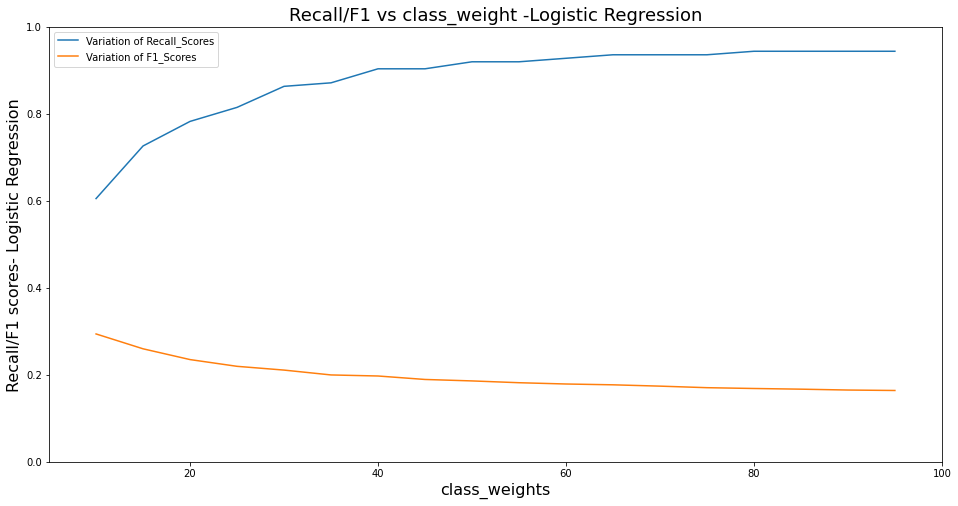

In [52]:
# Variation of Recall and F1 scores on the basis of class_weight

results_LR = pd.DataFrame(results_LR,columns=["weights","Recall","F1"])

plt.figure(figsize=(16,8))
plt.title('Recall/F1 vs class_weight -Logistic Regression', fontsize=18)
plt.plot(results_LR['weights'], results_LR['Recall'], label='Variation of Recall_Scores')
plt.plot(results_LR['weights'], results_LR['F1'], label='Variation of F1_Scores')  
plt.axis([5, 100, 0, 1])
plt.xlabel('class_weights', fontsize=16)
plt.ylabel('Recall/F1 scores- Logistic Regression', fontsize=16)
plt.legend()
plt.show()


$\color{red}{\textit{Logistic Regression recall improves drastically by increasing the weight of the class, this will} \\ \textit{introduce bias in our model. This can been seen by F1 score which going down as recall is increasing.}}$

In [57]:
# Checking the recall and F1 score on the basis of class_weight, since our data is quite imbalance improving the class_weight 
# should have some impact on scoring

from sklearn.metrics import f1_score
results_SVC = []
for weight in range(10,100,5):
    svc = SVC(C=0.5 , class_weight={0:1,1:weight}, kernel='rbf')
    svc.fit(X_train, y_train)
    recall = recall_score(y_test,svc.predict(X_test))
    f1 = f1_score(y_test,svc.predict(X_test))
    results_SVC.append([weight,recall,f1])
    
pd.DataFrame(results_SVC,columns=["weights","Recall","F1"])

,weights,Recall,F1
0,10,0.403226,0.401606
1,15,0.435484,0.338558
2,20,0.532258,0.252874
3,25,0.653226,0.207692
4,30,0.830645,0.154887
5,35,1.000000,0.117703
6,40,1.000000,0.117369
7,45,1.000000,0.117036
8,50,1.000000,0.116981
9,55,1.000000,0.116981


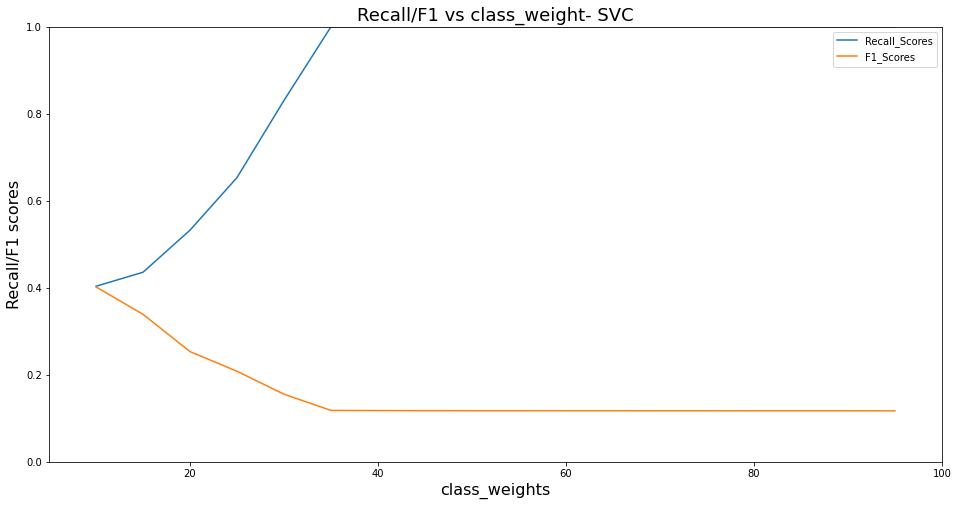

In [58]:
# Variation of Recall and F1 scores on the basis of class_weight

results_SVC = pd.DataFrame(results_SVC,columns=["weights","Recall","F1"])

plt.figure(figsize=(16,8))
plt.title('Recall/F1 vs class_weight- SVC', fontsize=18)
plt.plot(results_SVC['weights'], results_SVC['Recall'], label='Recall_Scores')
plt.plot(results_SVC['weights'], results_SVC['F1'], label='F1_Scores')  
plt.axis([5, 100, 0, 1])
plt.xlabel('class_weights', fontsize=16)
plt.ylabel('Recall/F1 scores', fontsize=16)
plt.legend()
plt.show()



$\color{red}{\textit{Support Vector Classifiers recall improves drastically by increasing the weight of the class, this will} \\ \textit{introduce biased in our model. This can been seen by F1 score which going down as recall is increasing.}}$

### $\color{green}{\text{RandomForestClassifier: GridSearchCV to find the best Hyperparameters and we use stratifiedKfold = 5} \\ \text{for cross validation:}}$

In [77]:


from sklearn.model_selection import GridSearchCV

# RandomForestClassifier
forest_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(5,40,5)),'n_estimators':list(range(50,200,50)),
                 'class_weight':[{0:1,1:10},{0:1,1:15},{0:1,1:20},{0:1,1:25}]}
grid_forest = GridSearchCV(RandomForestClassifier(), forest_params,cv=skf)
grid_forest.fit(X_train, y_train)

# tree best estimator
forest_clf = grid_forest.best_estimator_

In [78]:
grid_forest.best_params_,grid_forest.best_score_

({'class_weight': {0: 1, 1: 20},
  'criterion': 'entropy',
  'max_depth': 10,
  'n_estimators': 50},
 0.9961916847957457)

In [79]:
recall = recall_score(y_test,forest_clf.predict(X_test))
f1     = f1_score(y_test,forest_clf.predict(X_test))
print('RandomForest Classifier Recall Score', round(recall * 100, 2).astype(str) + '%')

print('RandomForest Classifier F1 Score', round(f1 * 100, 2).astype(str) + '%')

RandomForest Classifier Recall Score 96.77%
RandomForest Classifier F1 Score 97.96%


$\color{red}{\textit{On the test set RandomForestClassifier with parameters :{'class_weight': {0: 1, 1: 20},'criterion': 'entropy','max_depth':10,
 'n_estimators': 50}} \\ \textit{is giving best result. Next we will plot confusion matrix to validate our finding.}}$

[[2501    1]
 [   4  120]]


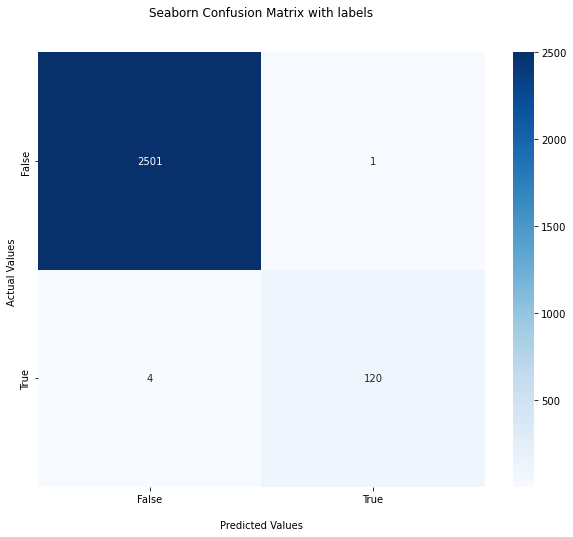

In [80]:
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, forest_clf.predict(X_test))

print(cf_matrix)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues',fmt=".0f")

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()



## ROC and Precision/Recall Curve

1. *ROC Curves summarize the trade-off between the true positive rate and false positive rate for a predictive model using    different probability thresholds.*
2. *Precision-Recall curves summarize the trade-off between the true positive rate and the positive predicted value for a predictive model using different probability thresholds.*
3. *ROC curves are appropriate when the observations are balanced between each class, whereas precision-recall curves are appropriate for imbalanced datasets.*

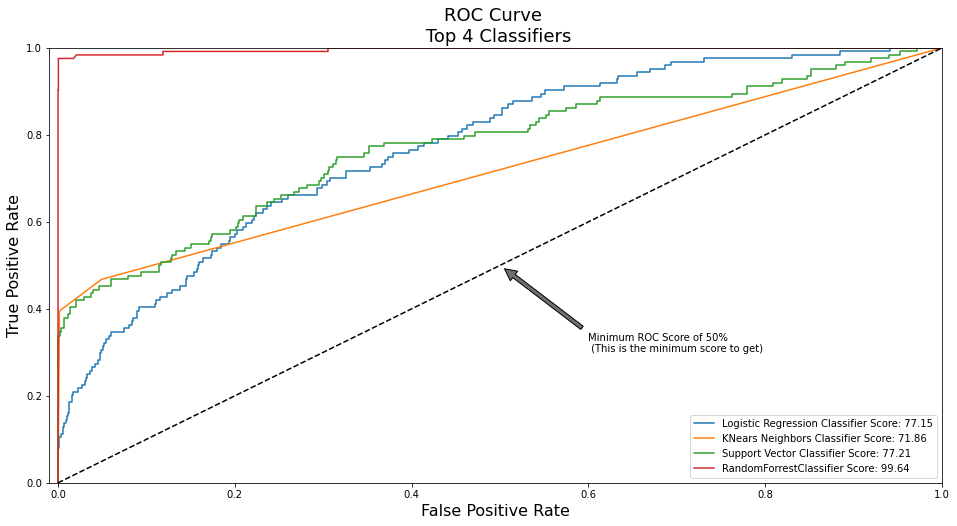

In [109]:
from sklearn.metrics import roc_curve, roc_auc_score

# calculate the fpr and tpr for all thresholds of the classification
# LogisticRegression

log_pred = grid_logistic.predict_proba(X_test)[:,1]
knn_pred = grid_KNN.predict_proba(X_test)[:,1]
svc_pred = grid_SVC.predict_proba(X_test)[:,1]
forest_pred = forest_clf.predict_proba(X_test)[:,1]

log_fpr,log_tpr,log_threshold  = roc_curve(y_test,log_pred)
knn_fpr,knn_tpr,knn_threshold  = roc_curve(y_test,knn_pred)
svc_fpr,svc_tpr,svc_threshold  = roc_curve(y_test,svc_pred)
forest_fpr,forest_tpr,forest_threshold  = roc_curve(y_test,forest_pred)

def ROC_curve_multi(log_fpr,log_tpr,knn_fpr,knn_tpr,svc_fpr,svc_tpr,forest_fpr,forest_tpr):
    
    plt.figure(figsize=(16,8))
    plt.title('ROC Curve \n Top 4 Classifiers', fontsize=18)
    plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: {:.2f}'.format(roc_auc_score(y_test, log_pred)*100))
    plt.plot(knn_fpr, knn_tpr, label='KNears Neighbors Classifier Score: {:.2f}'.format(roc_auc_score(y_test, knn_pred)*100))
    plt.plot(svc_fpr, svc_tpr, label='Support Vector Classifier Score: {:.2f}'.format(roc_auc_score(y_test, svc_pred)*100))
    plt.plot(forest_fpr, forest_tpr, label='RandomForrestClassifier Score: {:.2f}'.format(roc_auc_score(y_test, forest_pred)*100))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()


ROC_curve_multi(log_fpr, log_tpr, knn_fpr, knn_tpr, svc_fpr, svc_tpr, forest_fpr, forest_tpr)
plt.show()



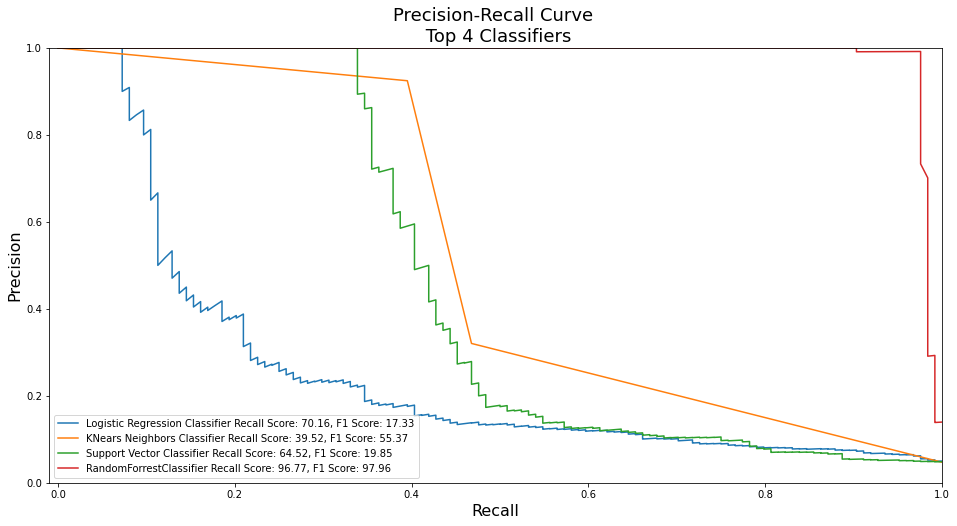

In [110]:
from sklearn.metrics import precision_recall_curve

log_pre,log_rec,log_threshold  = precision_recall_curve(y_test,log_pred)
knn_pre,knn_rec,knn_threshold  = precision_recall_curve(y_test,knn_pred)
svc_pre,svc_rec,svc_threshold  = precision_recall_curve(y_test,svc_pred)
forest_pre,forest_rec,forest_threshold  = precision_recall_curve(y_test,forest_pred)


def Precision_Recall_curve_multi(log_fpr,log_tpr,knn_fpr,knn_tpr,svc_fpr,svc_tpr,forest_fpr,forest_tpr):
    
    plt.figure(figsize=(16,8))
    plt.title('Precision-Recall Curve \n Top 4 Classifiers', fontsize=18)
    plt.plot(log_rec,log_pre, label='Logistic Regression Classifier Recall Score: {:.2f}, F1 Score: {:.2f}'
             .format(recall_score(y_test,grid_logistic.predict(X_test))*100,f1_score(y_test,grid_logistic.predict(X_test))*100))
    plt.plot(knn_rec, knn_pre, label='KNears Neighbors Classifier Recall Score: {:.2f}, F1 Score: {:.2f}'
             .format(recall_score(y_test,grid_KNN.predict(X_test))*100,f1_score(y_test,grid_KNN.predict(X_test))*100))
    plt.plot(svc_rec, svc_pre, label='Support Vector Classifier Recall Score: {:.2f}, F1 Score: {:.2f}'
             .format(recall_score(y_test,grid_SVC.predict(X_test))*100,f1_score(y_test,grid_SVC.predict(X_test))*100))
    plt.plot(forest_rec, forest_pre, label='RandomForrestClassifier Recall Score: {:.2f}, F1 Score: {:.2f}'
             .format(recall_score(y_test,forest_clf.predict(X_test))*100,f1_score(y_test,forest_clf.predict(X_test))*100))
    
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('Recall', fontsize=16)
    plt.ylabel('Precision', fontsize=16)
    plt.legend()


Precision_Recall_curve_multi(log_pre,log_rec,knn_pre,knn_rec,svc_pre,svc_rec,forest_pre,forest_rec)
plt.show()

$\color{green}{\text{Next we will train our RandomForestClassifier on the whole dataset:}}$

In [61]:
df_model = Bdata[features_10].copy(deep=True)

y_all = df_model["class"]
x_all = df_model.loc[:,df_model.columns != "class"]

In [63]:
#RandomForestClassifier with parameters :
#{'class_weight': {0: 1, 1: 20},'criterion': 'entropy','max_depth':10, 'n_estimators': 50}
final_model_production = RandomForestClassifier(n_estimators = 50, max_depth = 10, criterion='entropy', class_weight={0: 1, 1: 20}, random_state = 42)
final_model_production.fit(x_all,y_all)

RandomForestClassifier(class_weight={0: 1, 1: 20}, criterion='entropy',
                       max_depth=10, n_estimators=50, random_state=42)